# 건강검진 데이터로 가설검정
* 가설 1: 음주 여부에 따라 건강검진 수치 차이가 있을까?
* 가설 2: 신장과 허리둘레의 크기는 체중과 상관관계가 있을까?

## 1. Settings

In [3]:
import pandas as pd
import numpy as np                 # 수치계산
import seaborn as sns              # 시각화
import matplotlib.pyplot as plt
import os

%matplotlib inline

## 2. 한글폰트 설정

In [66]:
# os 검색
os.name

# windows 용 폰트 설정
plt.rc("font", family="Malgun Gothic")

# 마이너스 폰트 깨짐 해결
plt.rc("axes", unicode_minus=False)

# 선명한 글씨: retina
%config InlineBackend.figure_format = "retina"

In [67]:
# 코랩 한글깨짐
# !apt-get update -qq
# !apt-get install -qq fonts-nanum

# 설치된 폰트를 확인합니다.
# !fc-list :lang=ko

## 3. 데이터 불러오기
* 건강검진정보(2017년) 다운로드
* https://www.data.go.kr/data/15007122/fileData.do#layer_data_infomation

In [7]:
# 데이터 읽어오기
# euckr, cp949
df = pd.read_csv("data/NHIS_OPEN_GJ_2017_v1.1.csv", encoding="cp949")
df.shape

(1000000, 34)

## 5. 데이터 미리보기

In [71]:
df.head()

기준년도  가입자일련번호  성별코드  연령대코드(5세단위)  시도코드  신장(5Cm단위)  체중(5Kg단위)  허리둘레  시력(좌)  \
0  2017        1     1            8    43        170         75  90.0    1.0   
1  2017        2     1            7    11        180         80  89.0    0.9   
2  2017        3     1            9    41        165         75  91.0    1.2   
3  2017        4     1           11    48        175         80  91.0    1.5   
4  2017        5     1           11    30        165         60  80.0    1.0   

   시력(우)  ...  감마지티피  흡연상태  음주여부  구강검진수검여부  치아우식증유무  결손치유무  치아마모증유무  \
0    1.0  ...   40.0   1.0     Y         Y      NaN    NaN      NaN   
1    1.2  ...   27.0   3.0     N         Y      NaN    NaN      NaN   
2    1.5  ...   68.0   1.0     N         N      NaN    NaN      NaN   
3    1.2  ...   18.0   1.0     N         Y      NaN    NaN      NaN   
4    1.2  ...   25.0   1.0     N         Y      NaN    NaN      NaN   

   제3대구치(사랑니)이상   치석     데이터공개일자  
0           NaN    Y  2018-11-26  
1           NaN  NaN  2018-11-26  
2           NaN  NaN  2018-11-26  
3           NaN    N  2018-11-26  
4           NaN    N  2018-11-26  

[5 rows x 34 columns]

In [72]:
df.tail(5)

기준년도  가입자일련번호  성별코드  연령대코드(5세단위)  시도코드  신장(5Cm단위)  체중(5Kg단위)  허리둘레  \
999995  2017   999996     1           10    48        175         80  92.1   
999996  2017   999997     1            8    41        170         75  86.0   
999997  2017   999998     2            9    26        155         50  68.0   
999998  2017   999999     1            6    29        175         60  72.0   
999999  2017  1000000     1           11    41        160         70  90.5   

        시력(좌)  시력(우)  ...  감마지티피  흡연상태  음주여부  구강검진수검여부  치아우식증유무  결손치유무  \
999995    1.5    1.5  ...   27.0   1.0     N         N      NaN    NaN   
999996    1.0    1.5  ...   15.0   1.0     N         N      NaN    NaN   
999997    1.0    0.7  ...   17.0   3.0     Y         N      NaN    NaN   
999998    1.5    1.0  ...   17.0   1.0     N         N      NaN    NaN   
999999    1.0    1.5  ...   36.0   3.0     Y         N      NaN    NaN   

        치아마모증유무  제3대구치(사랑니)이상   치석     데이터공개일자  
999995      NaN           NaN  NaN  2018-11-26  
999996      NaN           NaN  NaN  2018-11-26  
999997      NaN           NaN  NaN  2018-11-26  
999998      NaN           NaN  NaN  2018-11-26  
999999      NaN           NaN  NaN  2018-11-26  

[5 rows x 34 columns]

In [73]:
df.sample()

기준년도  가입자일련번호  성별코드  연령대코드(5세단위)  시도코드  신장(5Cm단위)  체중(5Kg단위)  허리둘레  \
782606  2017   782607     2            6    11        155         60  74.0   

        시력(좌)  시력(우)  ...  감마지티피  흡연상태  음주여부  구강검진수검여부  치아우식증유무  결손치유무  \
782606    1.5    1.0  ...   45.0   1.0     Y         N      NaN    NaN   

        치아마모증유무  제3대구치(사랑니)이상   치석     데이터공개일자  
782606      NaN           NaN  NaN  2018-11-26  

[1 rows x 34 columns]

## 6. 기본 정보 보기

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 34 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   기준년도          1000000 non-null  int64  
 1   가입자일련번호       1000000 non-null  int64  
 2   성별코드          1000000 non-null  int64  
 3   연령대코드(5세단위)   1000000 non-null  int64  
 4   시도코드          1000000 non-null  int64  
 5   신장(5Cm단위)     1000000 non-null  int64  
 6   체중(5Kg단위)     1000000 non-null  int64  
 7   허리둘레          999734 non-null   float64
 8   시력(좌)         999817 non-null   float64
 9   시력(우)         999811 non-null   float64
 10  청력(좌)         999842 non-null   float64
 11  청력(우)         999844 non-null   float64
 12  수축기혈압         999981 non-null   float64
 13  이완기혈압         999982 non-null   float64
 14  식전혈당(공복혈당)    999958 non-null   float64
 15  총콜레스테롤        999957 non-null   float64
 16  트리글리세라이드      999955 non-null   float64
 17  HDL콜레스테롤      999956 non-nul

In [76]:
# 컬럼만 출력
df.columns

Index(['기준년도', '가입자일련번호', '성별코드', '연령대코드(5세단위)', '시도코드', '신장(5Cm단위)',
       '체중(5Kg단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압',
       '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태',
       '음주여부', '구강검진수검여부', '치아우식증유무', '결손치유무', '치아마모증유무', '제3대구치(사랑니)이상', '치석',
       '데이터공개일자'],
      dtype='object')

In [77]:
# 데이터 형식 출력
df.dtypes

기준년도              int64
가입자일련번호           int64
성별코드              int64
연령대코드(5세단위)       int64
시도코드              int64
신장(5Cm단위)         int64
체중(5Kg단위)         int64
허리둘레            float64
시력(좌)           float64
시력(우)           float64
청력(좌)           float64
청력(우)           float64
수축기혈압           float64
이완기혈압           float64
식전혈당(공복혈당)      float64
총콜레스테롤          float64
트리글리세라이드        float64
HDL콜레스테롤        float64
LDL콜레스테롤        float64
혈색소             float64
요단백             float64
혈청크레아티닌         float64
(혈청지오티)AST      float64
(혈청지오티)ALT      float64
감마지티피           float64
흡연상태            float64
음주여부             object
구강검진수검여부         object
치아우식증유무         float64
결손치유무           float64
치아마모증유무         float64
제3대구치(사랑니)이상    float64
치석               object
데이터공개일자          object
dtype: object

## 7. 결측치 보기

In [79]:
True == 1

True

In [80]:
df.isnull()
# df.isna()

기준년도  가입자일련번호   성별코드  연령대코드(5세단위)   시도코드  신장(5Cm단위)  체중(5Kg단위)  \
0       False    False  False        False  False      False      False   
1       False    False  False        False  False      False      False   
2       False    False  False        False  False      False      False   
3       False    False  False        False  False      False      False   
4       False    False  False        False  False      False      False   
...       ...      ...    ...          ...    ...        ...        ...   
999995  False    False  False        False  False      False      False   
999996  False    False  False        False  False      False      False   
999997  False    False  False        False  False      False      False   
999998  False    False  False        False  False      False      False   
999999  False    False  False        False  False      False      False   

         허리둘레  시력(좌)  시력(우)  ...  감마지티피   흡연상태   음주여부  구강검진수검여부  치아우식증유무  \
0       False  False  False  ...  False  False  False     False     True   
1       False  False  False  ...  False  False  False     False     True   
2       False  False  False  ...  False  False  False     False     True   
3       False  False  False  ...  False  False  False     False     True   
4       False  False  False  ...  False  False  False     False     True   
...       ...    ...    ...  ...    ...    ...    ...       ...      ...   
999995  False  False  False  ...  False  False  False     False     True   
999996  False  False  False  ...  False  False  False     False     True   
999997  False  False  False  ...  False  False  False     False     True   
999998  False  False  False  ...  False  False  False     False     True   
999999  False  False  False  ...  False  False  False     False     True   

        결손치유무  치아마모증유무  제3대구치(사랑니)이상     치석  데이터공개일자  
0        True     True          True  False    False  
1        True     True          True   True    False  
2        True     True          True   True    False  
3        True     True          True  False    False  
4        True     True          True  False    False  
...       ...      ...           ...    ...      ...  
999995   True     True          True   True    False  
999996   True     True          True   True    False  
999997   True     True          True   True    False  
999998   True     True          True   True    False  
999999   True     True          True   True    False  

[1000000 rows x 34 columns]

In [81]:
df.isnull().sum()

기준년도                  0
가입자일련번호               0
성별코드                  0
연령대코드(5세단위)           0
시도코드                  0
신장(5Cm단위)             0
체중(5Kg단위)             0
허리둘레                266
시력(좌)               183
시력(우)               189
청력(좌)               158
청력(우)               156
수축기혈압                19
이완기혈압                18
식전혈당(공복혈당)           42
총콜레스테롤               43
트리글리세라이드             45
HDL콜레스테롤             44
LDL콜레스테롤           2912
혈색소                  52
요단백                4592
혈청크레아티닌              43
(혈청지오티)AST           41
(혈청지오티)ALT           42
감마지티피                42
흡연상태                144
음주여부                536
구강검진수검여부              0
치아우식증유무         1000000
결손치유무           1000000
치아마모증유무         1000000
제3대구치(사랑니)이상    1000000
치석               621422
데이터공개일자               0
dtype: int64

<Axes: >

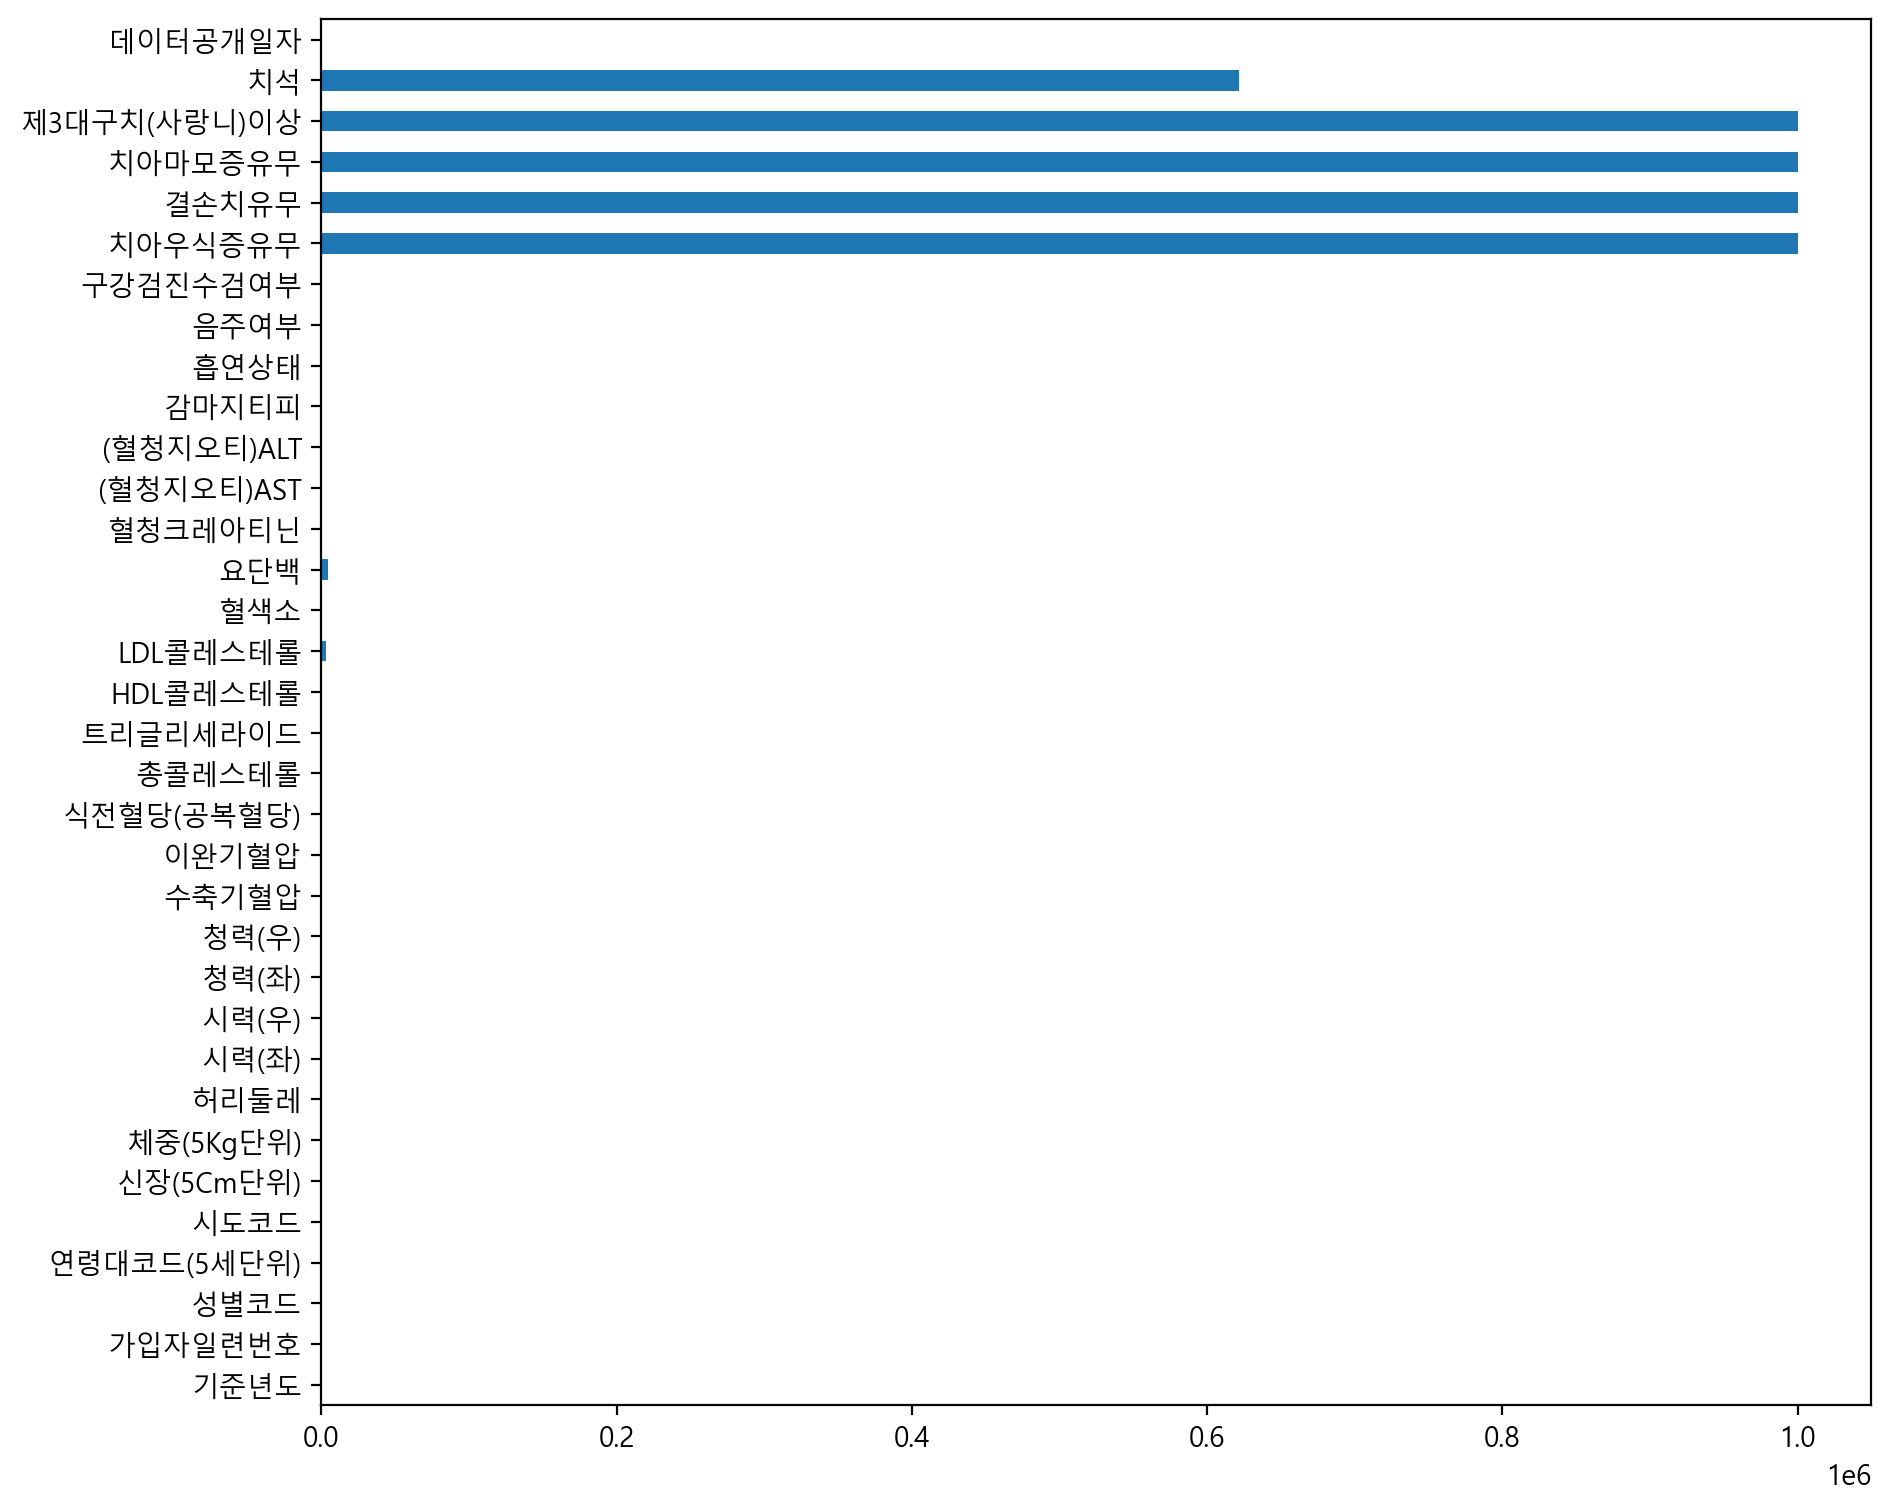

In [82]:
df.isnull().sum().plot.barh(figsize=(10, 9))

## 8. 일부 데이터 요약하기

In [84]:
df.columns

Index(['기준년도', '가입자일련번호', '성별코드', '연령대코드(5세단위)', '시도코드', '신장(5Cm단위)',
       '체중(5Kg단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압',
       '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태',
       '음주여부', '구강검진수검여부', '치아우식증유무', '결손치유무', '치아마모증유무', '제3대구치(사랑니)이상', '치석',
       '데이터공개일자'],
      dtype='object')

In [85]:
# 하나의 컬럼 가져오기 - Series
df["(혈청지오티)ALT"]

0         35.0
1         36.0
2         32.0
3         34.0
4         12.0
          ... 
999995    36.0
999996    17.0
999997    27.0
999998    14.0
999999    43.0
Name: (혈청지오티)ALT, Length: 1000000, dtype: float64

In [86]:
# 여러 컬럼 가져오기 - list 자료구조
df[["(혈청지오티)ALT", "(혈청지오티)AST"]].head()

(혈청지오티)ALT  (혈청지오티)AST
0        35.0        21.0
1        36.0        20.0
2        32.0        47.0
3        34.0        29.0
4        12.0        19.0

In [87]:
# 요악
df[["(혈청지오티)ALT", "(혈청지오티)AST"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   (혈청지오티)ALT  999958 non-null  float64
 1   (혈청지오티)AST  999959 non-null  float64
dtypes: float64(2)
memory usage: 15.3 MB


In [88]:
df[["(혈청지오티)ALT", "(혈청지오티)AST"]].describe()

(혈청지오티)ALT     (혈청지오티)AST
count  999958.000000  999959.000000
mean       25.749509      25.994671
std        26.294770      23.587469
min         1.000000       1.000000
25%        15.000000      19.000000
50%        20.000000      23.000000
75%        29.000000      28.000000
max      7210.000000    9999.000000

# 9. value_counts로 값 집계하기

In [90]:
df["성별코드"].value_counts()

성별코드
1    530410
2    469590
Name: count, dtype: int64

In [91]:
df["흡연상태"].value_counts()

흡연상태
1.0    607942
3.0    215702
2.0    176212
Name: count, dtype: int64

# 10. groupby와 pivot_table 사용하기

## 10.1 groupby

In [94]:
# "성별코드" 별 "가입자일련번호"의 수(count)
df.groupby(["성별코드"])["가입자일련번호"].count()

# 1: 남, 2: 여

성별코드
1    530410
2    469590
Name: 가입자일련번호, dtype: int64

In [95]:
# "성별코드"와 "음주여부"로 그룹화
df.groupby(["성별코드", "음주여부"])["가입자일련번호"].count()

# N/0: X, Y/1: O

성별코드  음주여부
1     N       173612
      Y       356587
2     N       326827
      Y       142438
Name: 가입자일련번호, dtype: int64

In [96]:
# "성별코드"와 "음주여부"별 감마지티피 평균
df.groupby(["성별코드", "음주여부"])["감마지티피"].mean()

성별코드  음주여부
1     N       34.739868
      Y       56.610981
2     N       22.612408
      Y       25.001018
Name: 감마지티피, dtype: float64

In [97]:
# "성별코드"와 "음주여부"별 감마지티피 요약수치
df.groupby(["성별코드", "음주여부"])["감마지티피"].describe()

count       mean        std  min   25%   50%   75%    max
성별코드 음주여부                                                              
1    N     173604.0  34.739868  37.606197  1.0  18.0  25.0  38.0  999.0
     Y     356576.0  56.610981  68.851128  1.0  24.0  37.0  63.0  999.0
2    N     326813.0  22.612408  25.203579  1.0  13.0  17.0  24.0  999.0
     Y     142429.0  25.001018  36.725100  1.0  13.0  17.0  25.0  999.0

In [98]:
 # agg: 여러 수치 구하기 (갯수, 평균값, 중앙값)
 df.groupby(["성별코드", "음주여부"])["감마지티피"].agg(["count", "mean", "median"])

count       mean  median
성별코드 음주여부                           
1    N     173604  34.739868    25.0
     Y     356576  56.610981    37.0
2    N     326813  22.612408    17.0
     Y     142429  25.001018    17.0

## 10.2 pivot_table
* https://pandas.pydata.org/docs/reference/api/pandas.pivot_table.html

In [100]:
# "성별코드" 별 "가입자일련번호"의 "수(count)"
df.pivot_table(index="성별코드", values="가입자일련번호", aggfunc="count") # (DataFrame)

# df.groupby(["성별코드"])["가입자일련번호"].count()와 같은 값을 출력 (Series)

가입자일련번호
성별코드         
1      530410
2      469590

In [101]:
# "df"에서 "음주여부"에 따른 "감마지티피"의 "평균" - aggfunc 기본값:mean
pd.pivot_table(df, index="음주여부", values="감마지티피")

감마지티피
음주여부           
N     26.819650
Y     47.588675

In [102]:
# aggfunc 여러 개 지정
pd.pivot_table(df, index="음주여부", values="감마지티피", aggfunc=["mean", "median"])

mean median
          감마지티피  감마지티피
음주여부                  
N     26.819650   19.0
Y     47.588675   30.0

In [103]:
# 통계 요약 값 - describe
pd.pivot_table(df, index="음주여부", values="감마지티피", aggfunc="describe")

25%   50%   75%     count    max       mean  min        std
음주여부                                                              
N     14.0  19.0  29.0  500417.0  999.0  26.819650  1.0  30.639714
Y     18.0  30.0  52.0  499005.0  999.0  47.588675  1.0  63.056912

In [104]:
# 여러 개의 index 값
pd.pivot_table(df, index=["성별코드","음주여부"], values="감마지티피", aggfunc="describe")

25%   50%   75%     count    max       mean  min        std
성별코드 음주여부                                                              
1    N     18.0  25.0  38.0  173604.0  999.0  34.739868  1.0  37.606197
     Y     24.0  37.0  63.0  356576.0  999.0  56.610981  1.0  68.851128
2    N     13.0  17.0  24.0  326813.0  999.0  22.612408  1.0  25.203579
     Y     13.0  17.0  25.0  142429.0  999.0  25.001018  1.0  36.725100

# 11. 전체 데이터 시각화 하기
* 100만개 이상 데이터 시각화 : groupby, pivot_table 권장
* seaborn과 같은 고급 통계 연산 그래프는 느릴 수 있음

## 11.1 히스토그램
* pandas의 info()를 통해 대부분의 df가 수치 데이터(int, float)로 이루어진 것을 확인
* 수치데이터를 bin 갯수만큼 그룹화해서 도수분포표를 만들고, 그 결과를 시각화함
* hist 사용

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 34 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   기준년도          1000000 non-null  int64  
 1   가입자일련번호       1000000 non-null  int64  
 2   성별코드          1000000 non-null  int64  
 3   연령대코드(5세단위)   1000000 non-null  int64  
 4   시도코드          1000000 non-null  int64  
 5   신장(5Cm단위)     1000000 non-null  int64  
 6   체중(5Kg단위)     1000000 non-null  int64  
 7   허리둘레          999734 non-null   float64
 8   시력(좌)         999817 non-null   float64
 9   시력(우)         999811 non-null   float64
 10  청력(좌)         999842 non-null   float64
 11  청력(우)         999844 non-null   float64
 12  수축기혈압         999981 non-null   float64
 13  이완기혈압         999982 non-null   float64
 14  식전혈당(공복혈당)    999958 non-null   float64
 15  총콜레스테롤        999957 non-null   float64
 16  트리글리세라이드      999955 non-null   float64
 17  HDL콜레스테롤      999956 non-nul

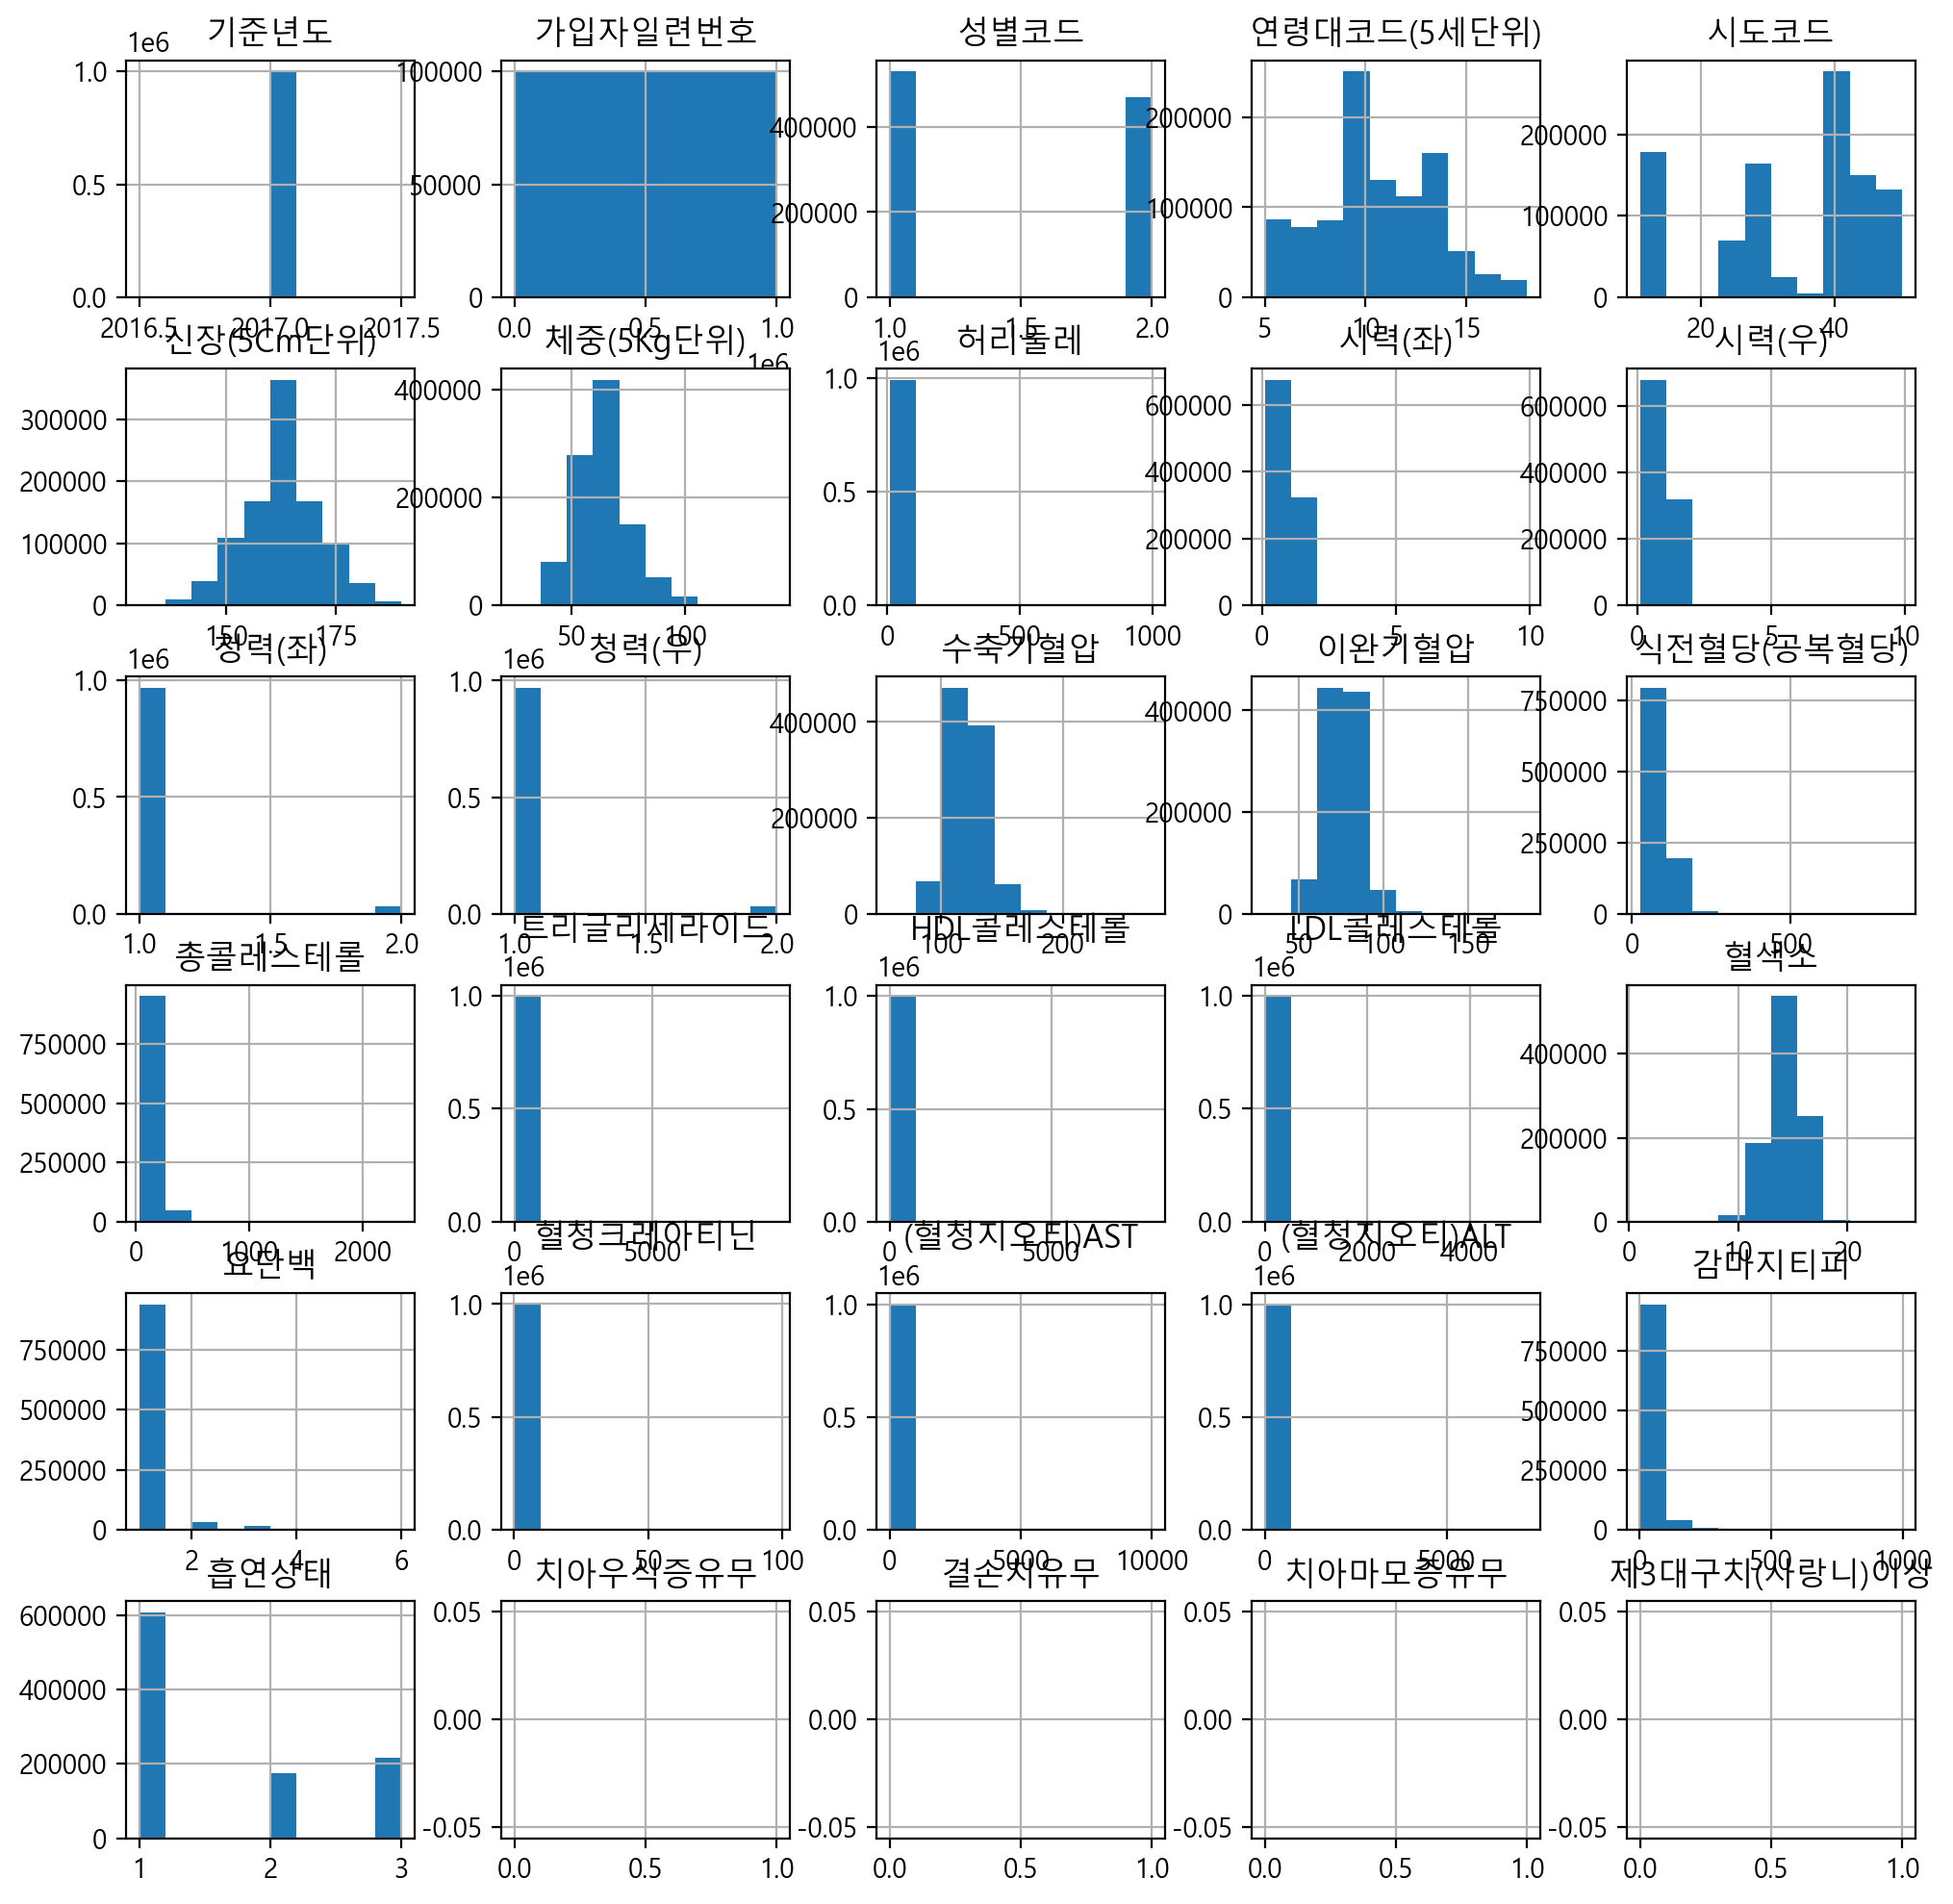

In [108]:
# 히스토그램 출력
h = df.hist(figsize=(12, 12))

## 11.2 슬라이싱을 사용해 히스토그램 그리기
* iloc를 활용하여 인덱스 순서대로 슬라이싱
* iloc[행, 열], iloc[:, :], [시작index: 끝index+1]

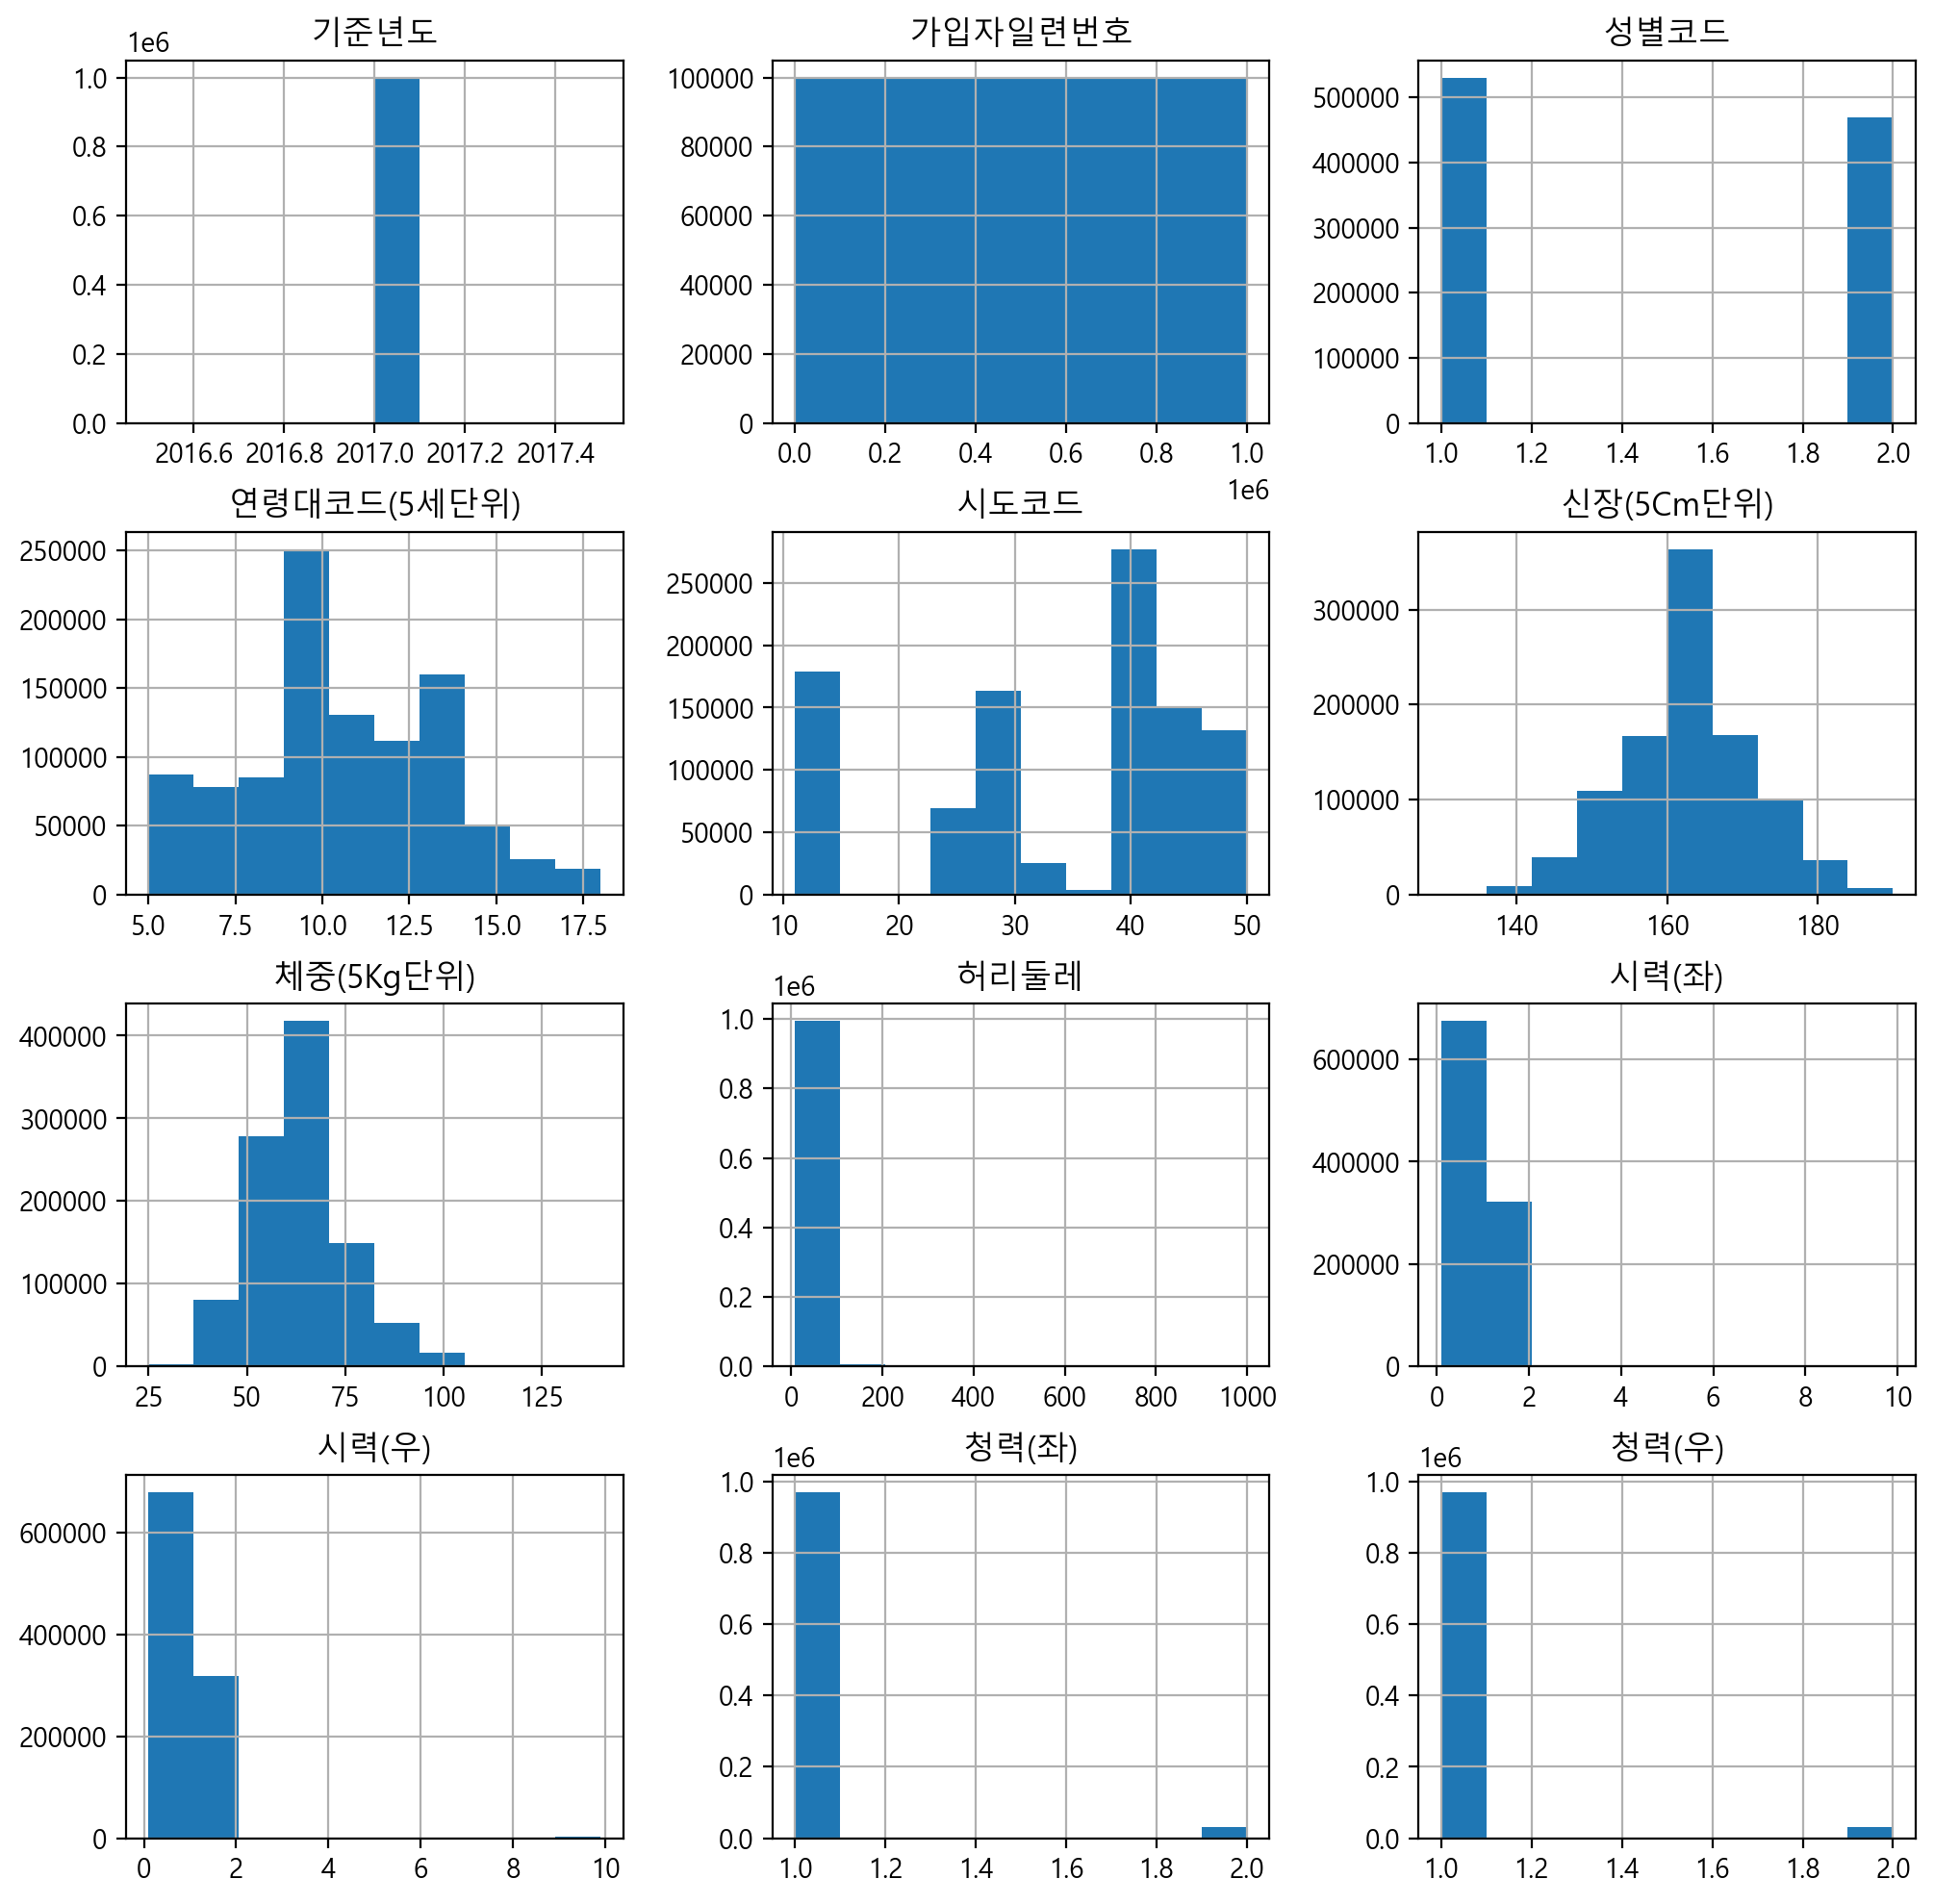

In [110]:
# 슬라이싱을 사용해 앞에서 12개 컬럼 데이터로 히스토그램 그리기
h = df.iloc[:, :12].hist(figsize=(12, 12))

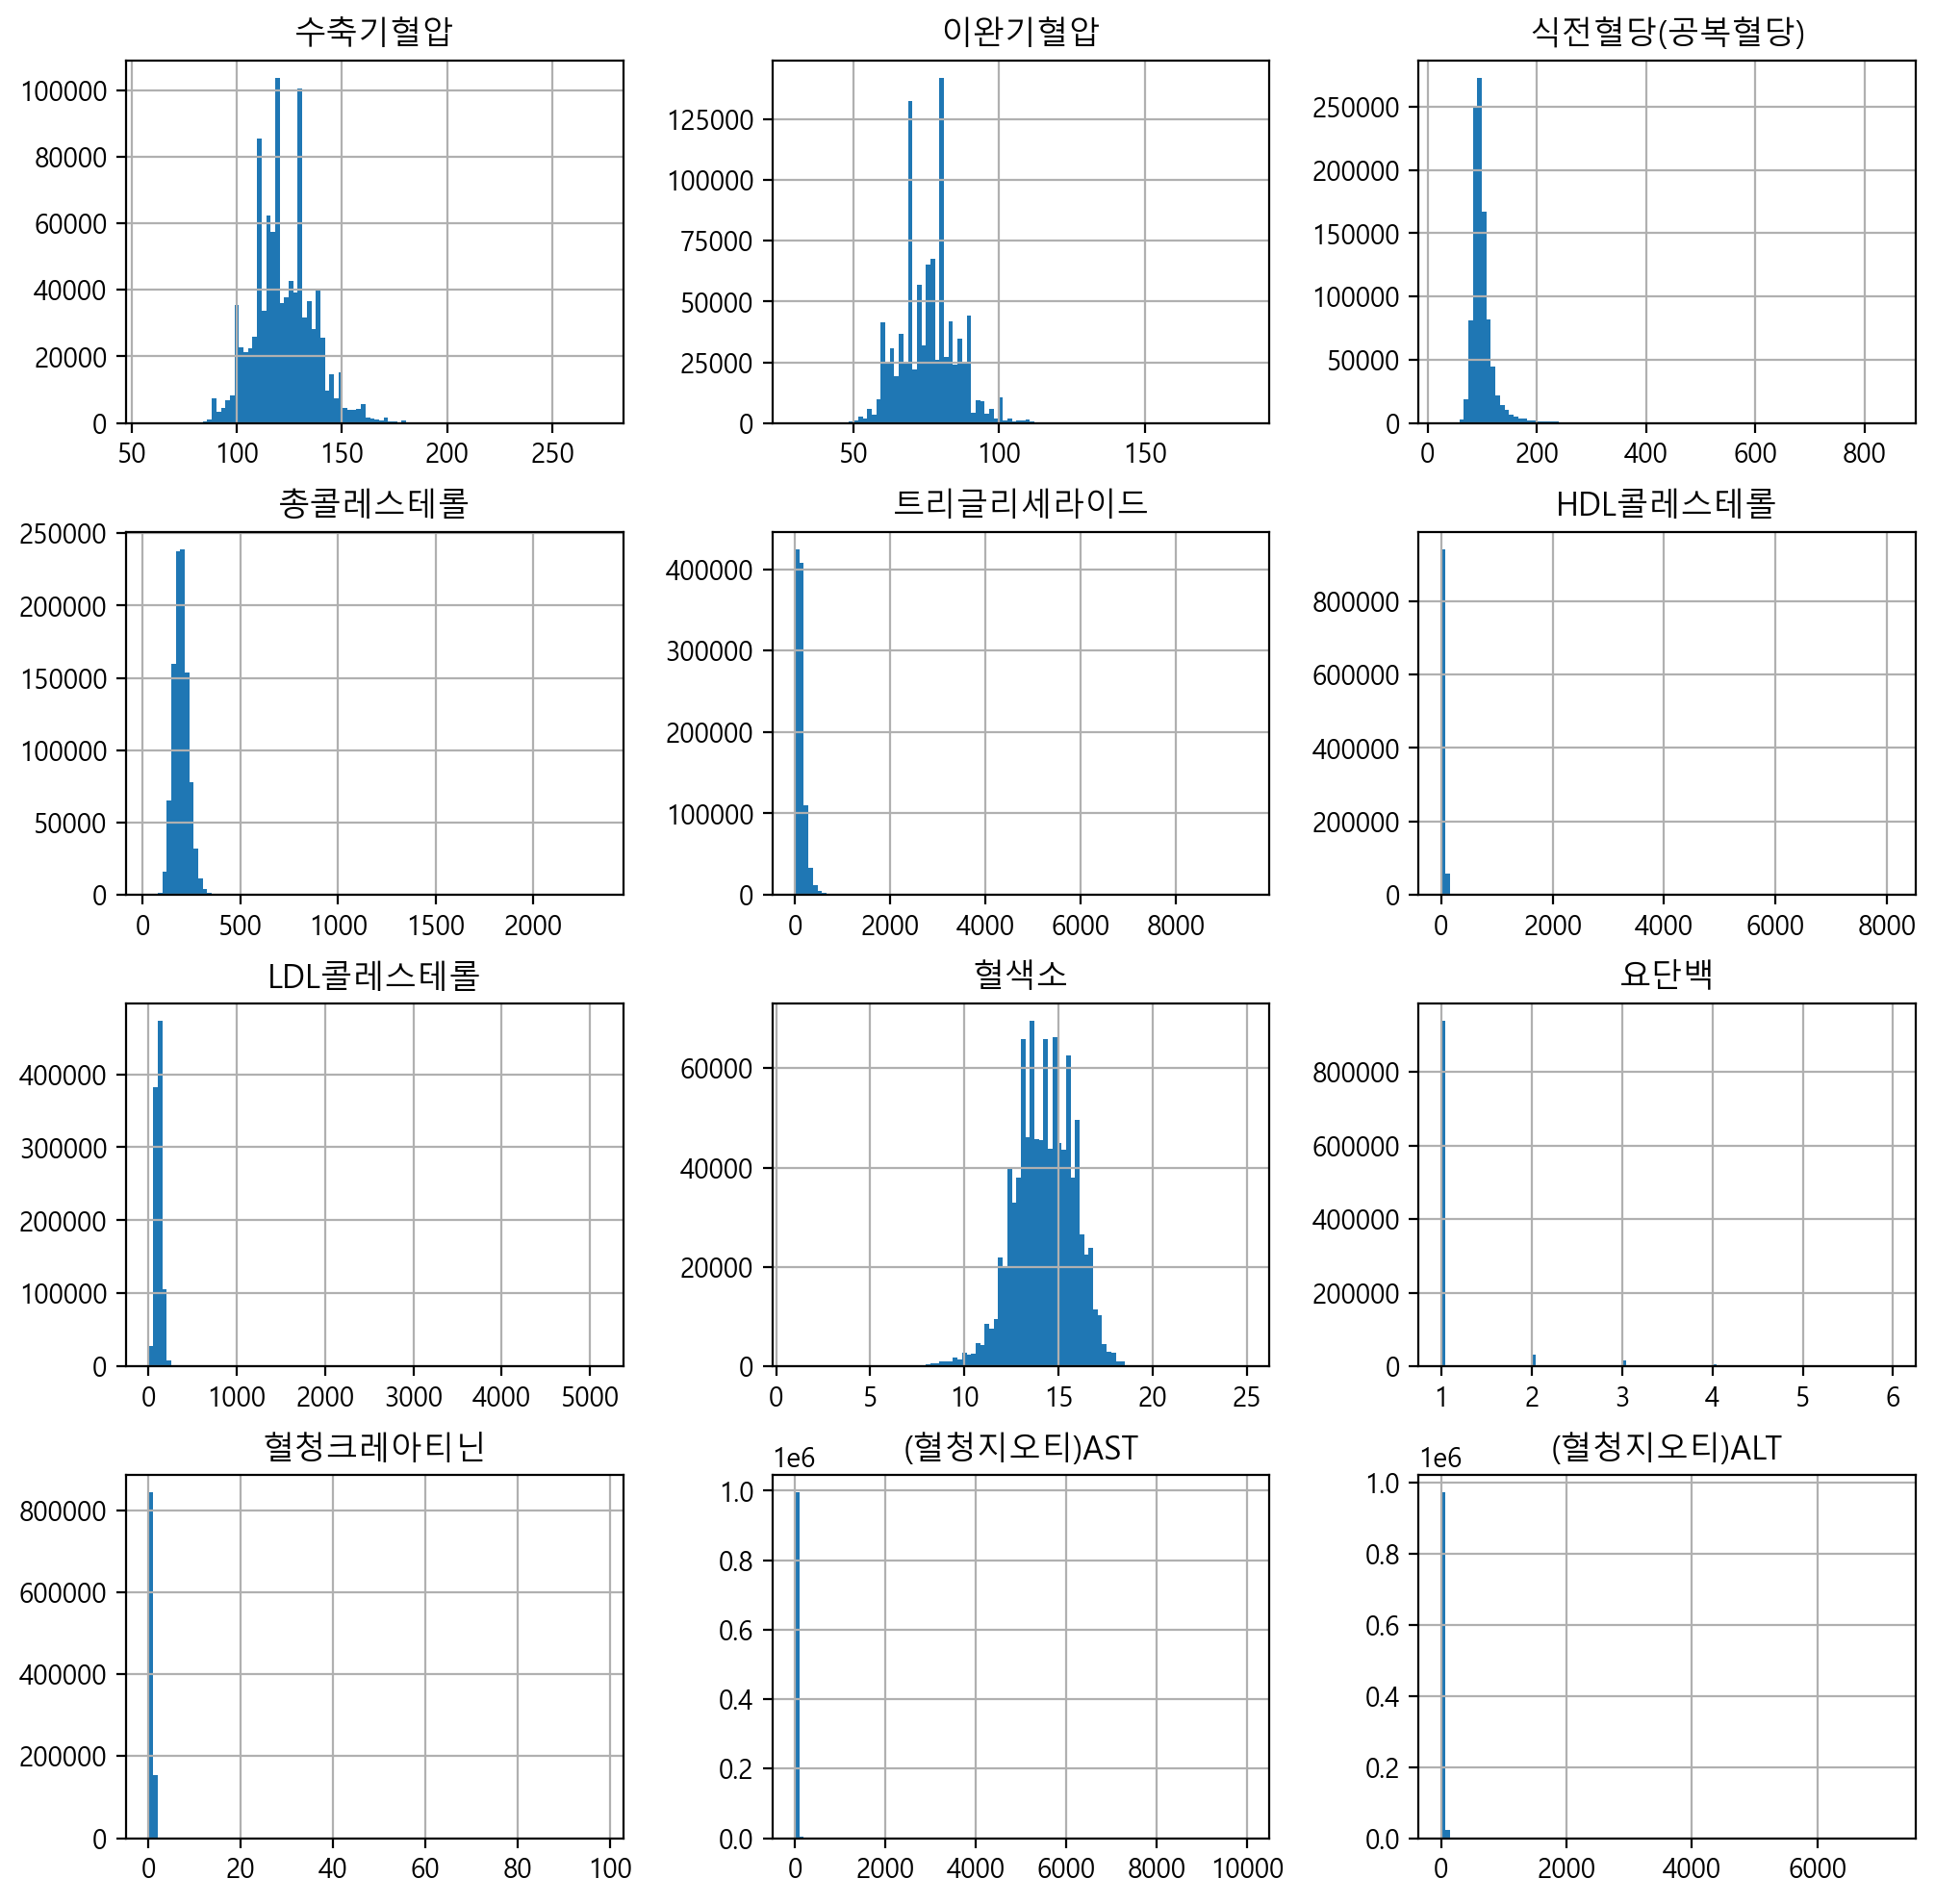

In [111]:
# 12-23번까지 컬럼
# bins: 막대 갯수 지정
h = df.iloc[:, 12:24].hist(figsize=(12, 12), bins=100)

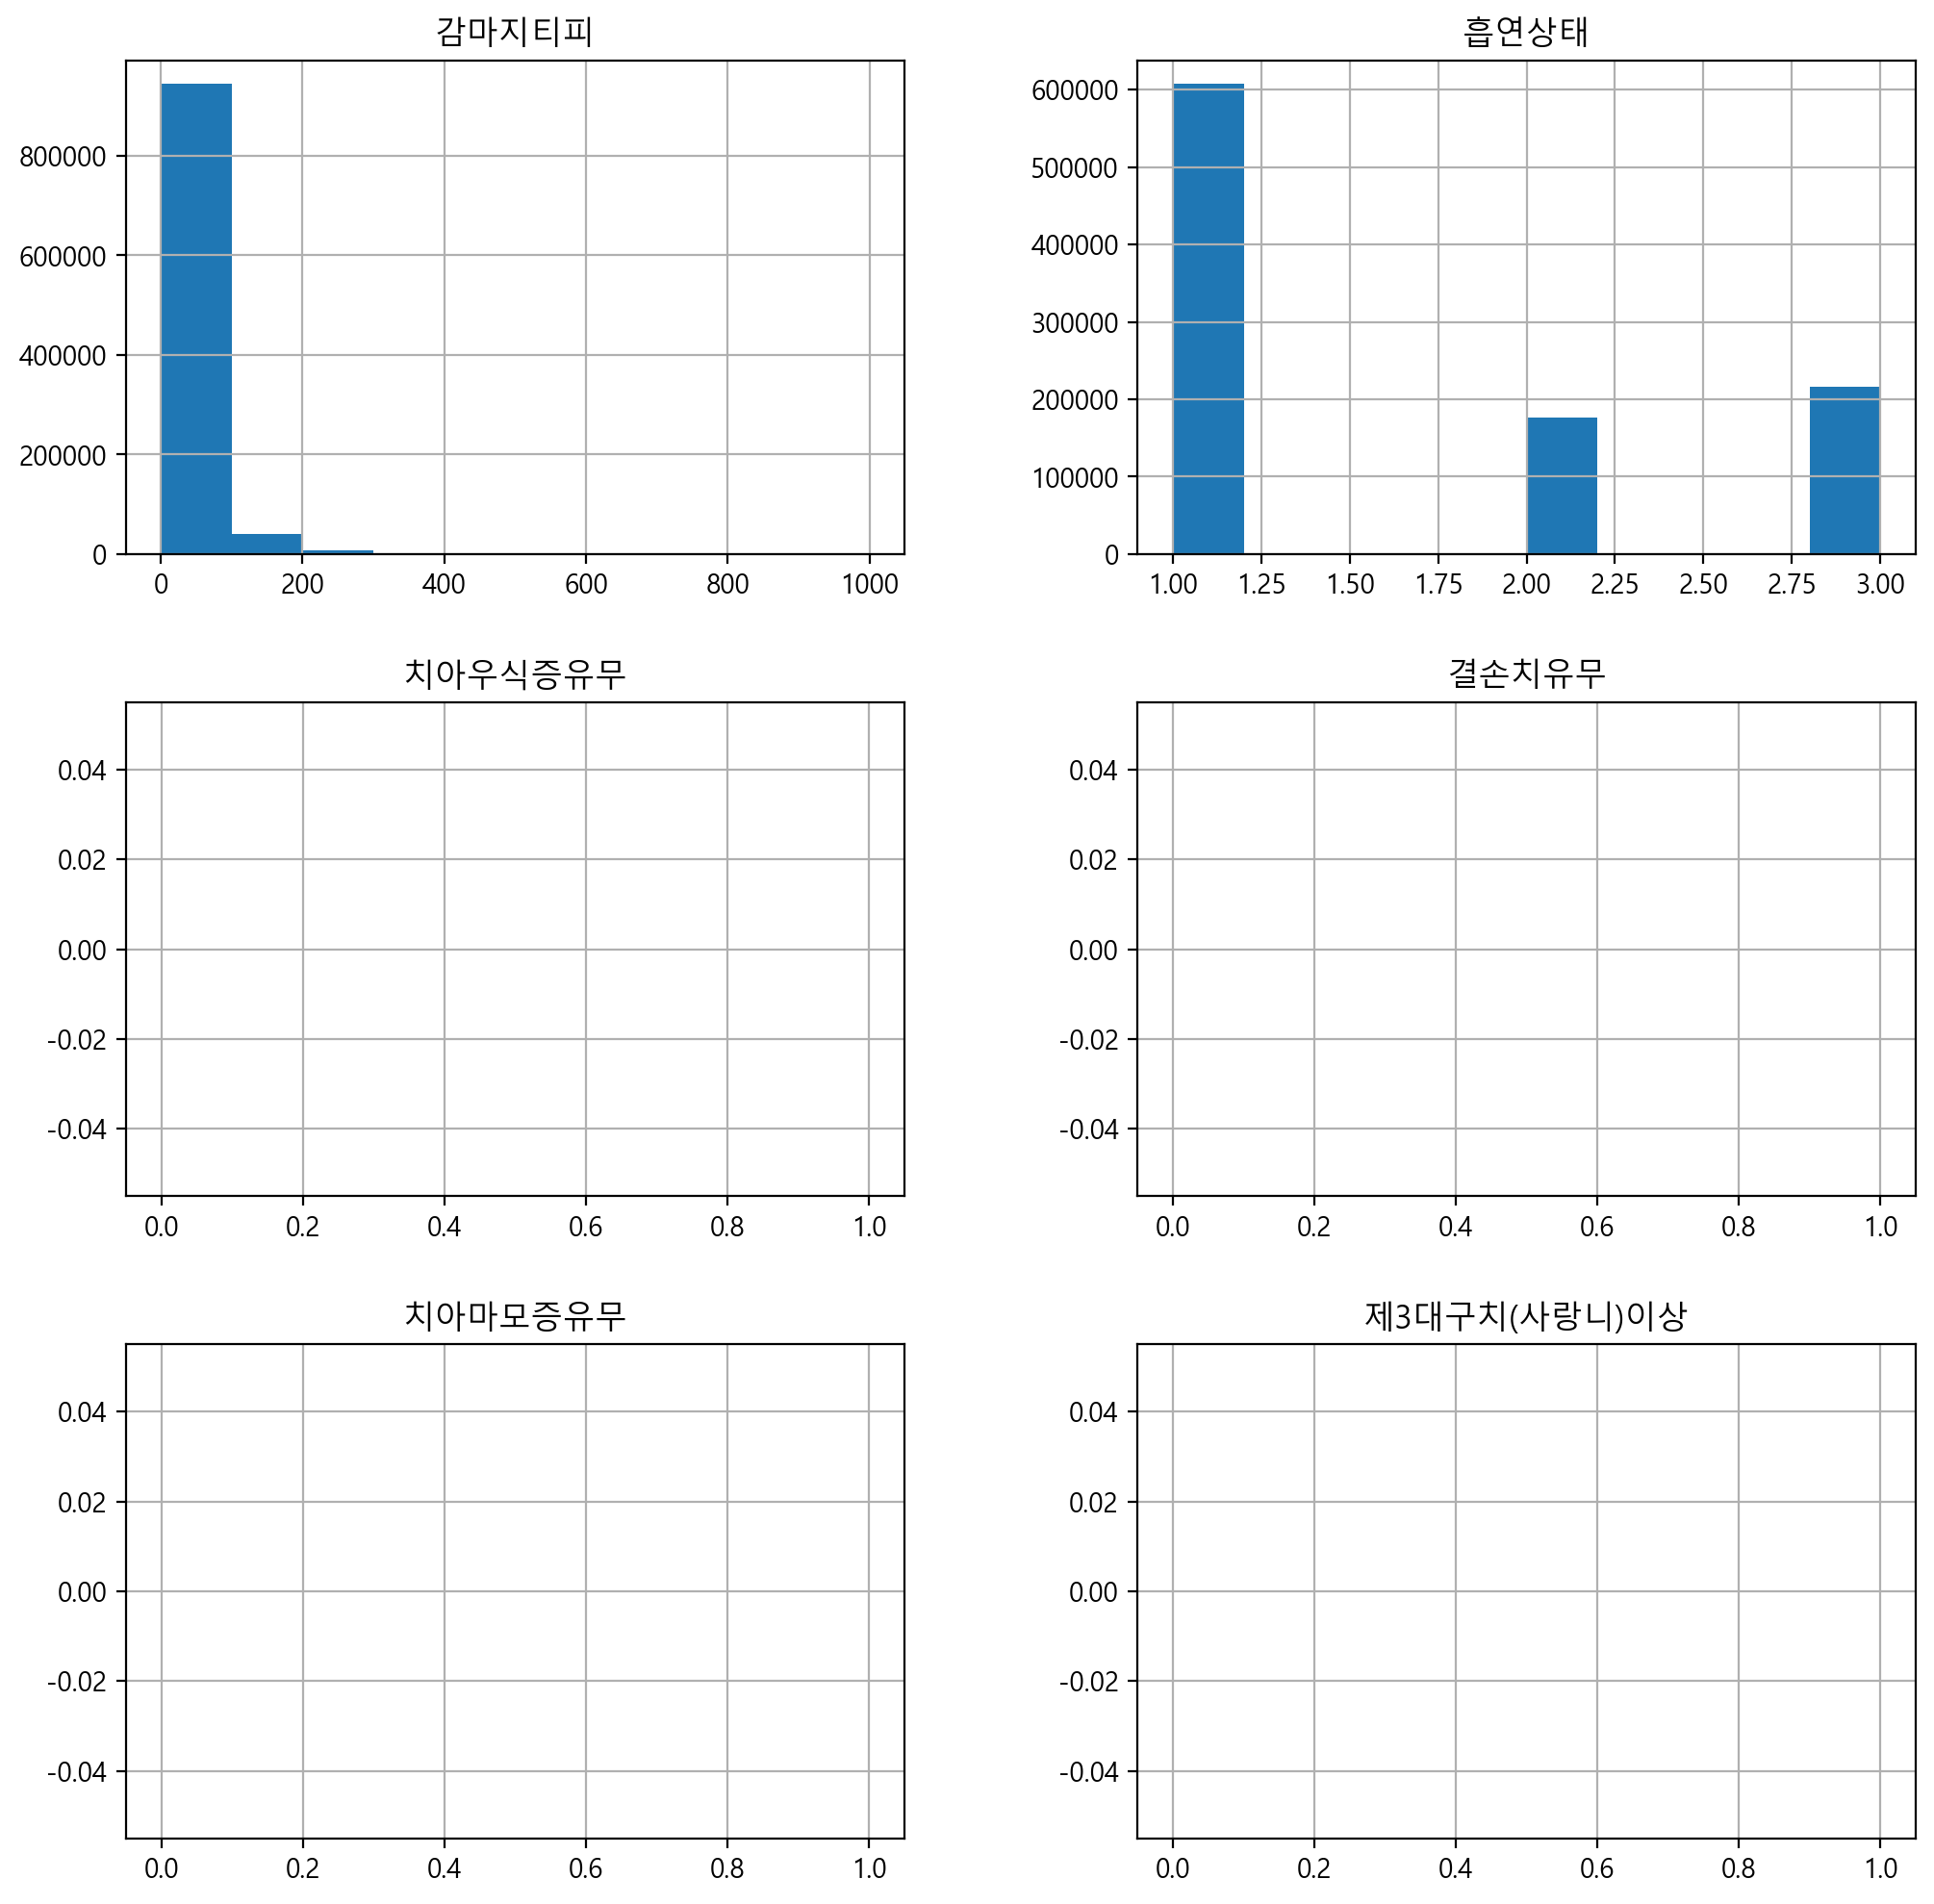

In [112]:
# 24-끝 까지
h = df.iloc[:, 24:].hist(figsize=(12, 12), bins=10)

# 12. 샘플 데이터 추출하기
* seaborn 그래프는 많은 데이터 추출 시 내부 수학적 연산으로 인해 속도가 오래 걸림
* 따라서, 데이터 샘플링을 통해 사용

In [9]:
# sample: 샘플 데이터 추출
# random_state: 항상 같은 샘플값을 가져옴
df_sample = df.sample(1000, random_state=1)
df_sample.shape

(1000, 34)

# 13. 데이터 시각화 도구 Seaborn 사용
* https://seaborn.pydata.org/
* seaborn은 matplotlib을 사용하기 쉽게 만들어짐

# 14. 범주형(카테고리) 데이터 시각화
* countplot은 범주형 데이터의 수를 더한 값을 그래프로 표현
* value_counts로 구한 값을 시각화한 것

## 14.1 countplot - 음주여부

<Axes: xlabel='음주여부'>

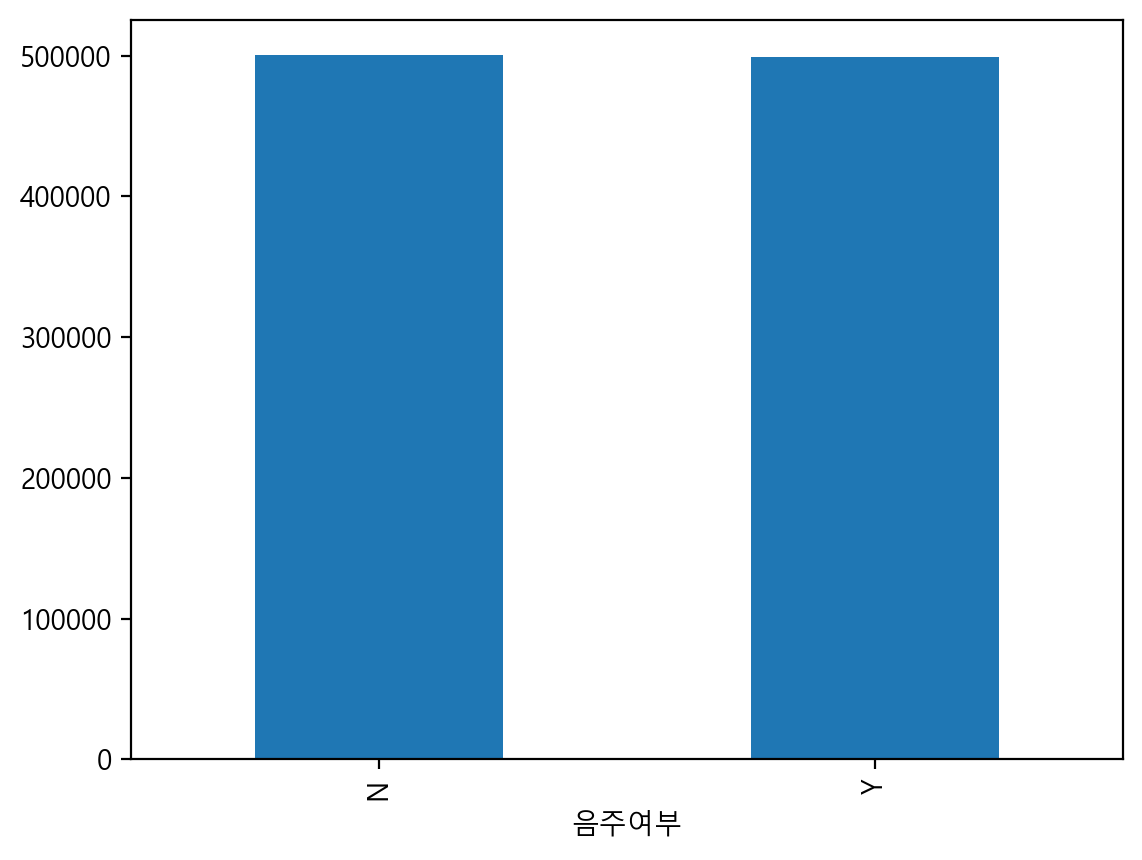

In [118]:
# 음주여부에 따른 countplot 그리기
df["음주여부"].value_counts().plot.bar()

<Axes: xlabel='음주여부', ylabel='count'>

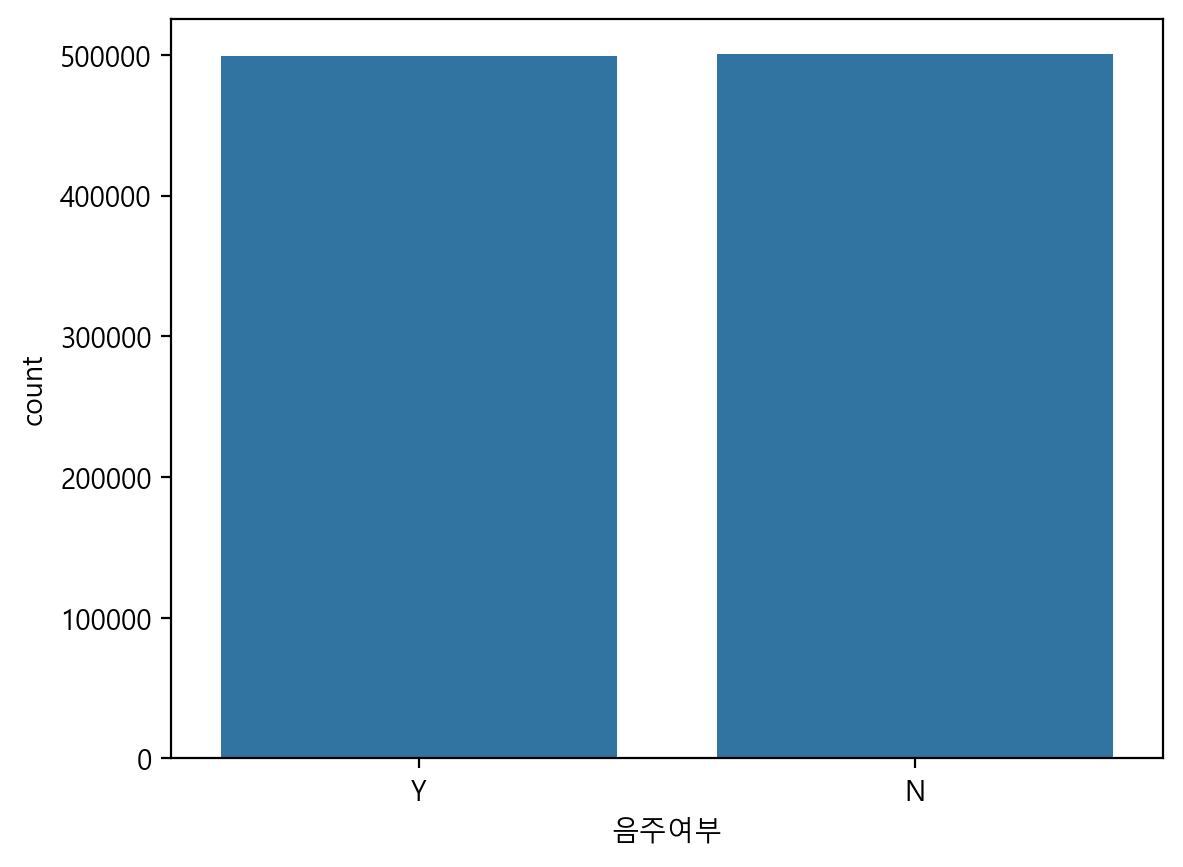

In [119]:
# "음주여부"에 따른 countplot
# x축, data값 지정
sns.countplot(data=df, x="음주여부")

## 14.2 hue 옵션 사용하기
* hue : 색상 설정
* 폰트 설정
* sns.set(font_scale=1.5, font="Malgun Gothic")

<Axes: xlabel='음주여부', ylabel='count'>

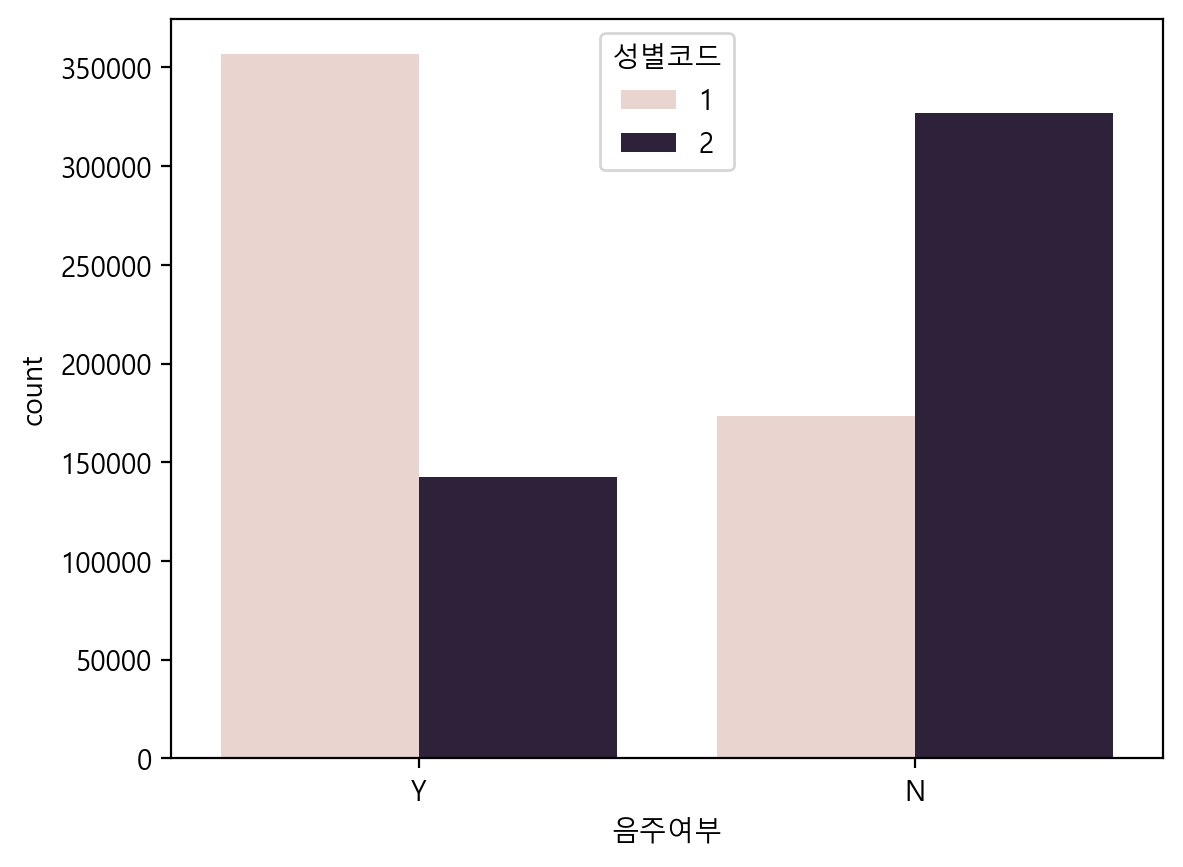

In [121]:
# 0/Y : 음주o
# 1/N : 음주x
sns.countplot(data=df, x="음주여부", hue="성별코드")

<Axes: xlabel='연령대코드(5세단위)', ylabel='count'>

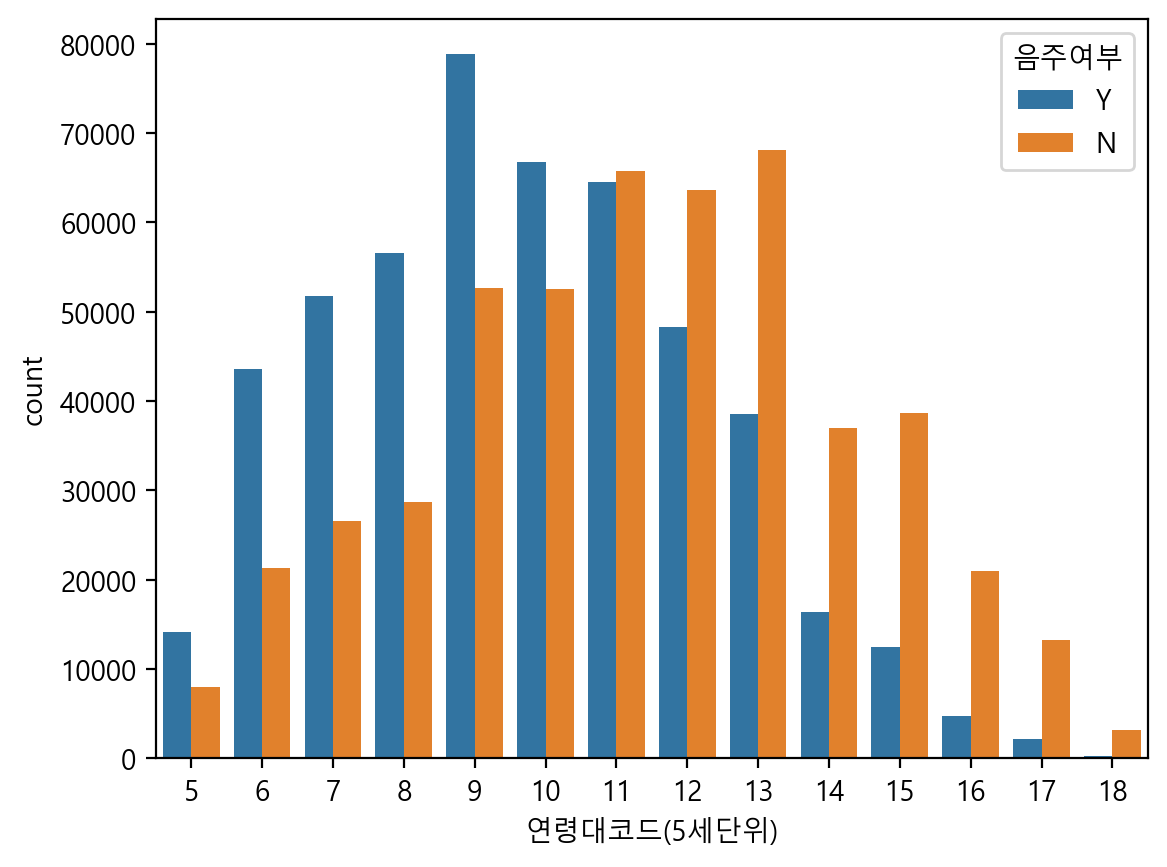

In [122]:
# "연령대코드"별 "음주여부"
sns.countplot(data=df, x="연령대코드(5세단위)", hue="음주여부")

## 14.3 countplot - 키와 몸무게
* 키와 몸무겐느 연속성 데이터라고 볼 수 있음
* 하지만, 키는 5cm, 체중은 5kg 단위로 되어있음
* 이렇게 특정범위로 묶으면 범주형 데이터로 볼 수 있음

<Axes: xlabel='신장(5Cm단위)', ylabel='count'>

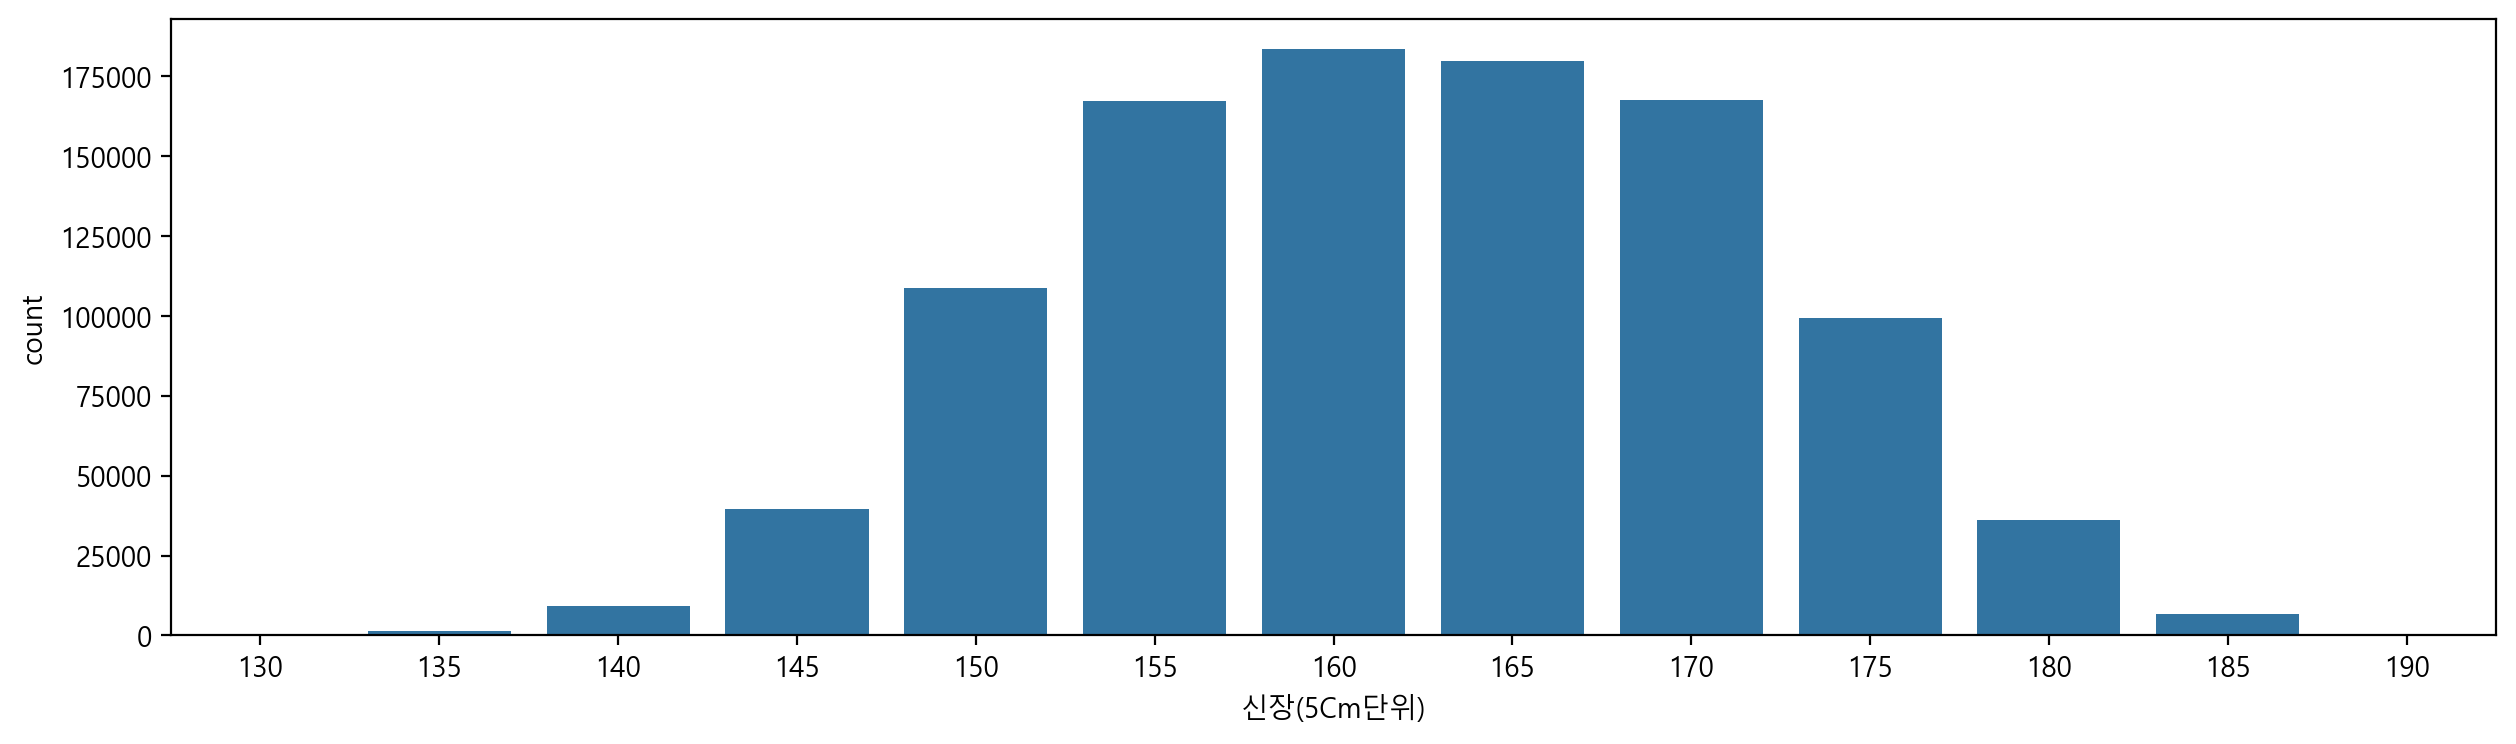

In [124]:
# countplot으로 키 확인
plt.figure(figsize=(15, 4))
sns.countplot(data=df, x="신장(5Cm단위)")

<Axes: xlabel='체중(5Kg단위)', ylabel='count'>

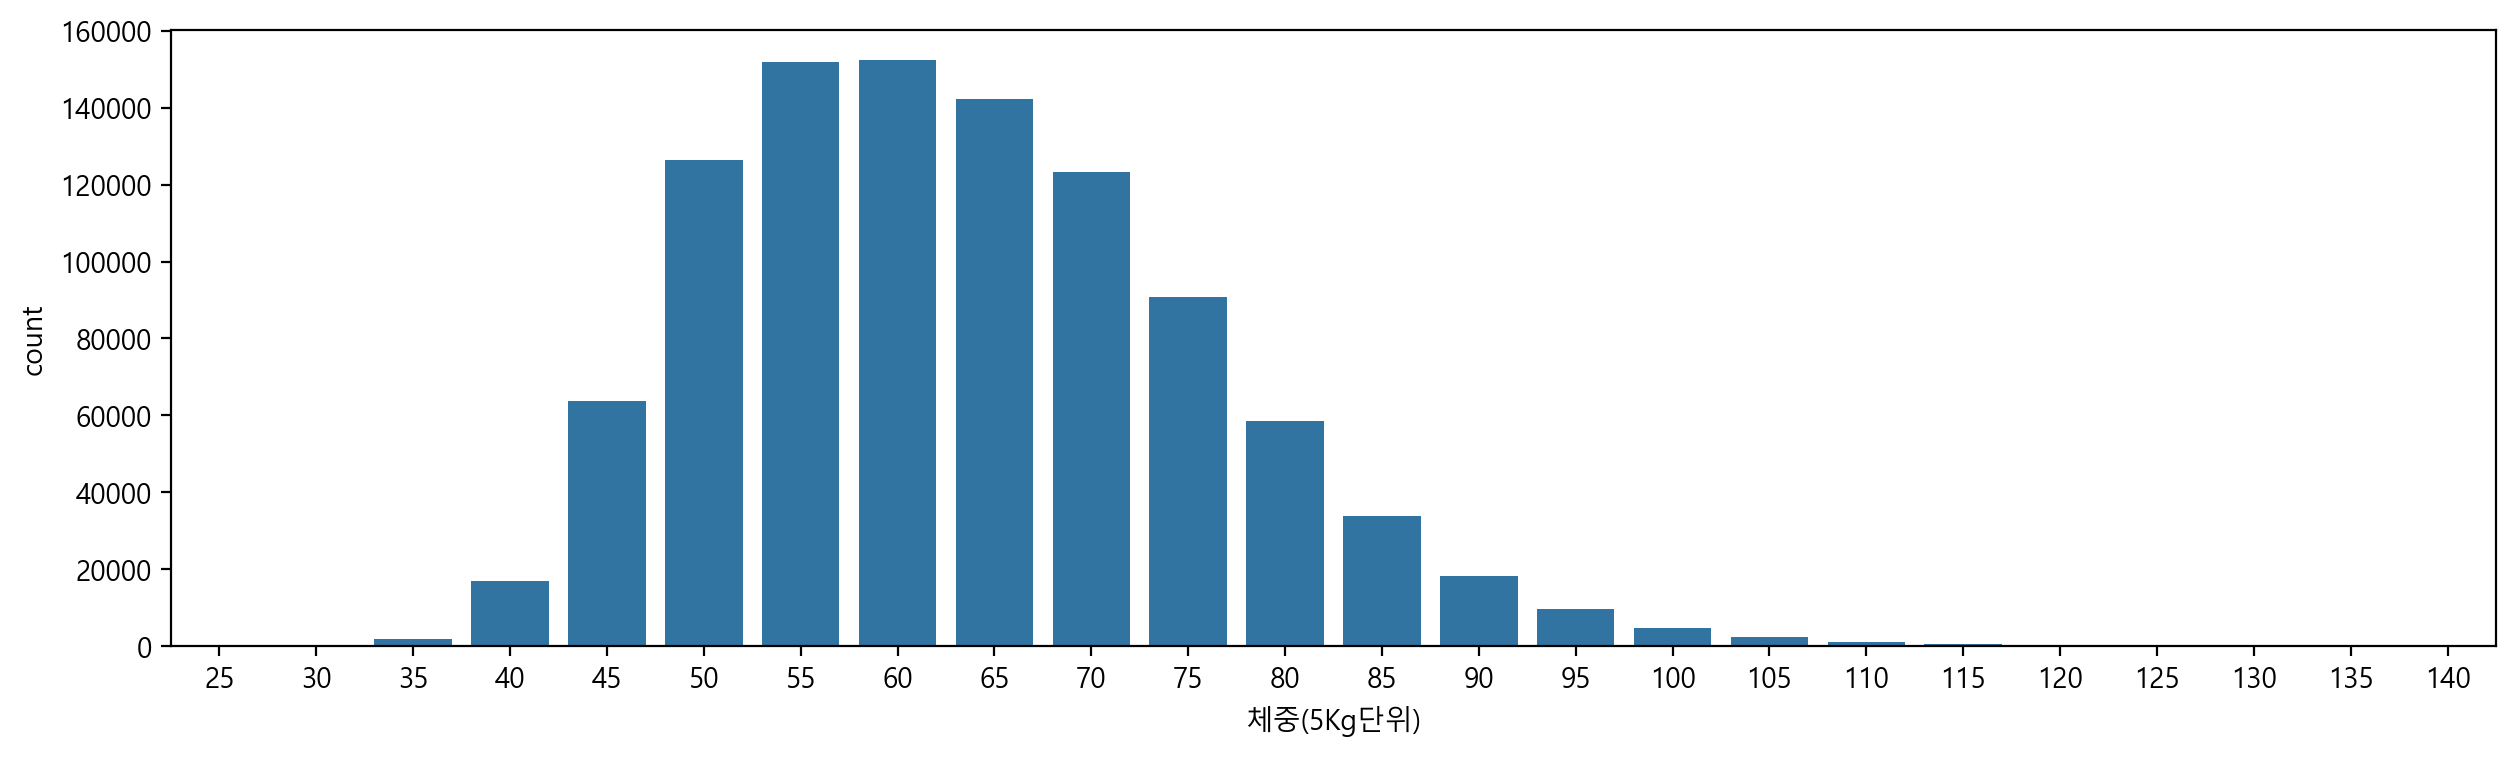

In [125]:
# countplot으로 체중 확인
plt.figure(figsize=(15, 4))
sns.countplot(data=df, x="체중(5Kg단위)")

<Axes: xlabel='신장(5Cm단위)', ylabel='count'>

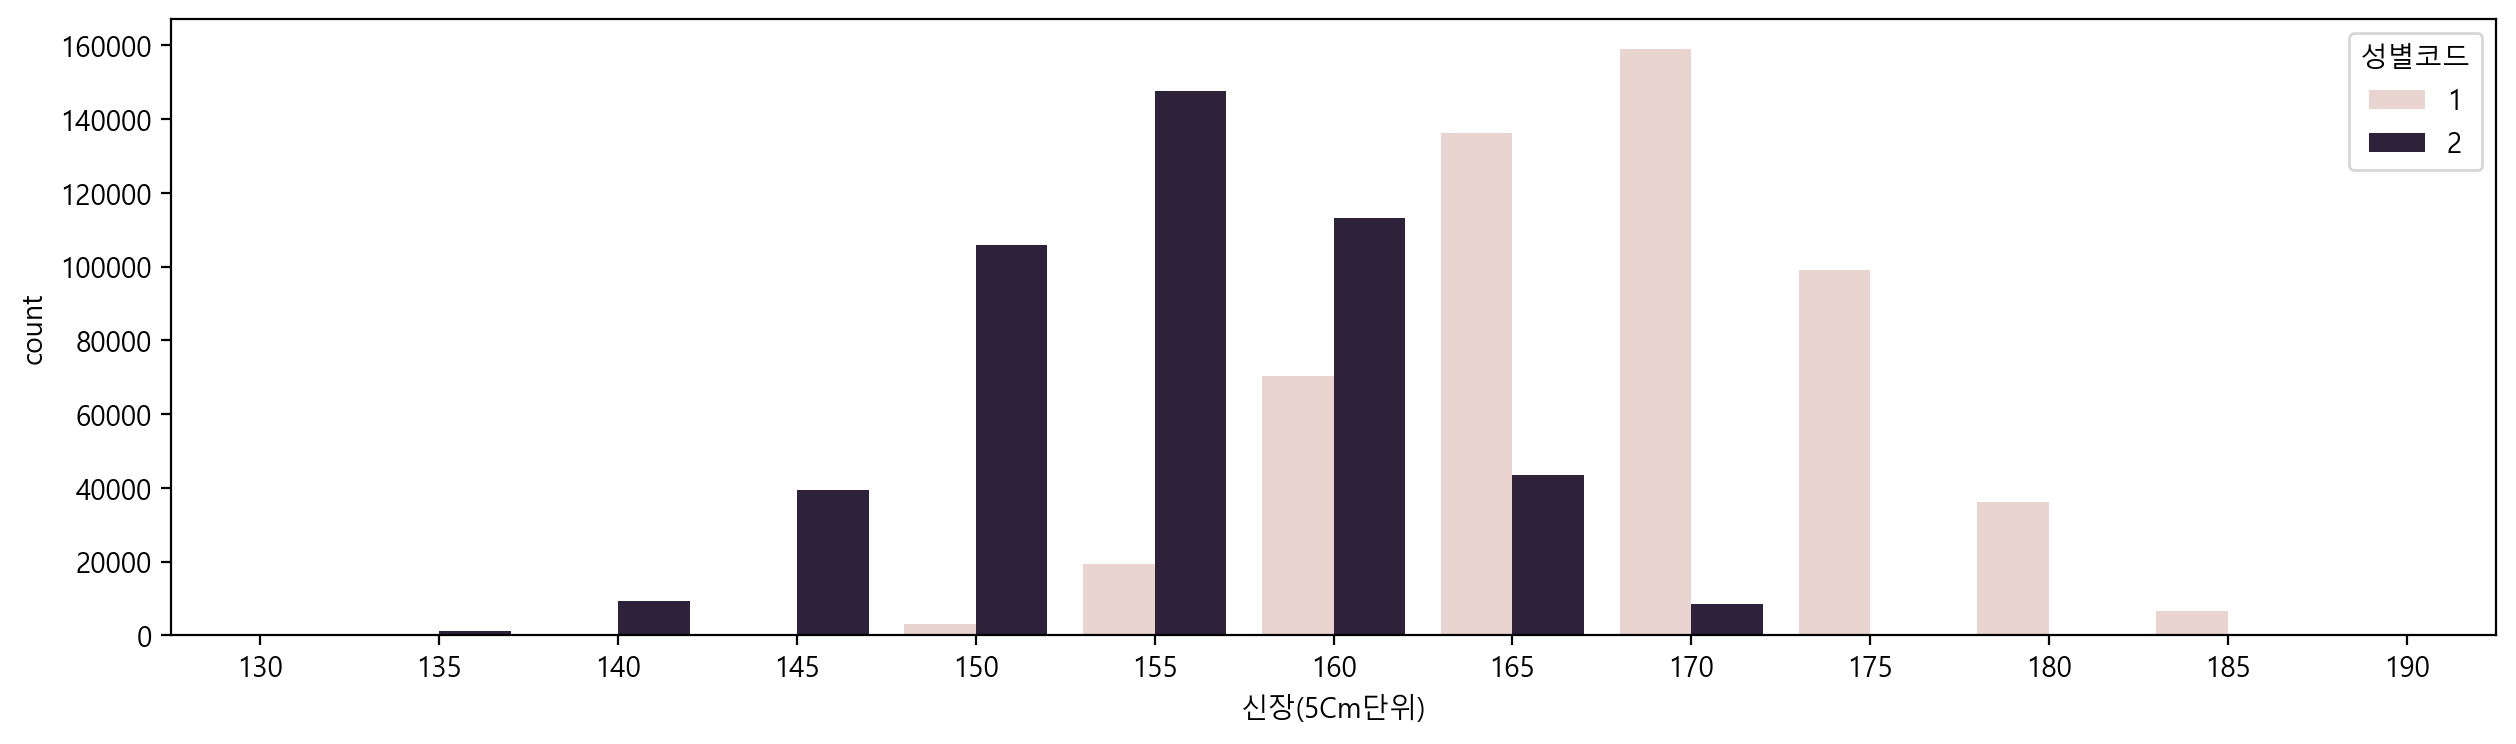

In [126]:
# countplot으로 성별에 따른 신장 차이 확인
plt.figure(figsize=(15, 4))
sns.countplot(data=df, x="신장(5Cm단위)", hue="성별코드")

<Axes: xlabel='체중(5Kg단위)', ylabel='count'>

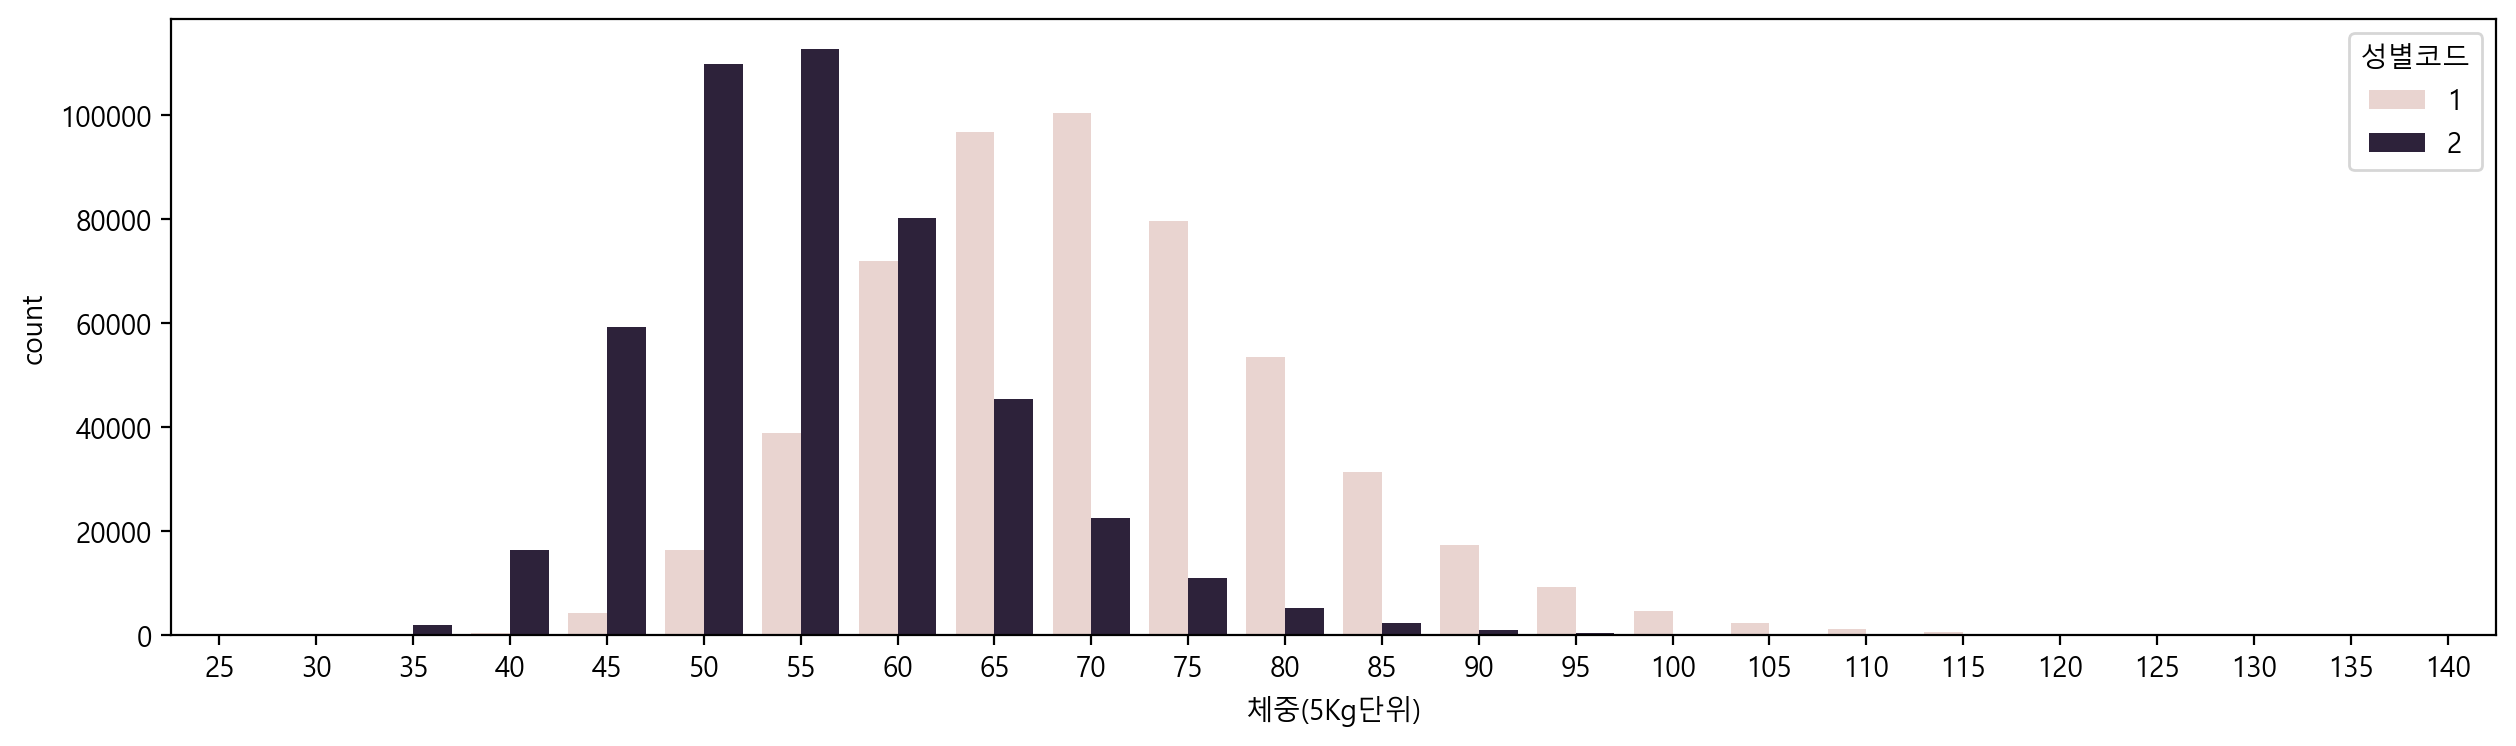

In [127]:
# countplot으로 성별에 따른 체중 차이 확인
plt.figure(figsize=(15, 4))
sns.countplot(data=df, x="체중(5Kg단위)", hue="성별코드")

## 14.4 barplot - 수치형 vs 범주형 데이터 시각화
* 큰 데이터를 사용할 경우 속도가 느림
* 이럴 경우 df에 df_sample로 그려본느 것을 추천

<Axes: xlabel='연령대코드(5세단위)', ylabel='총콜레스테롤'>

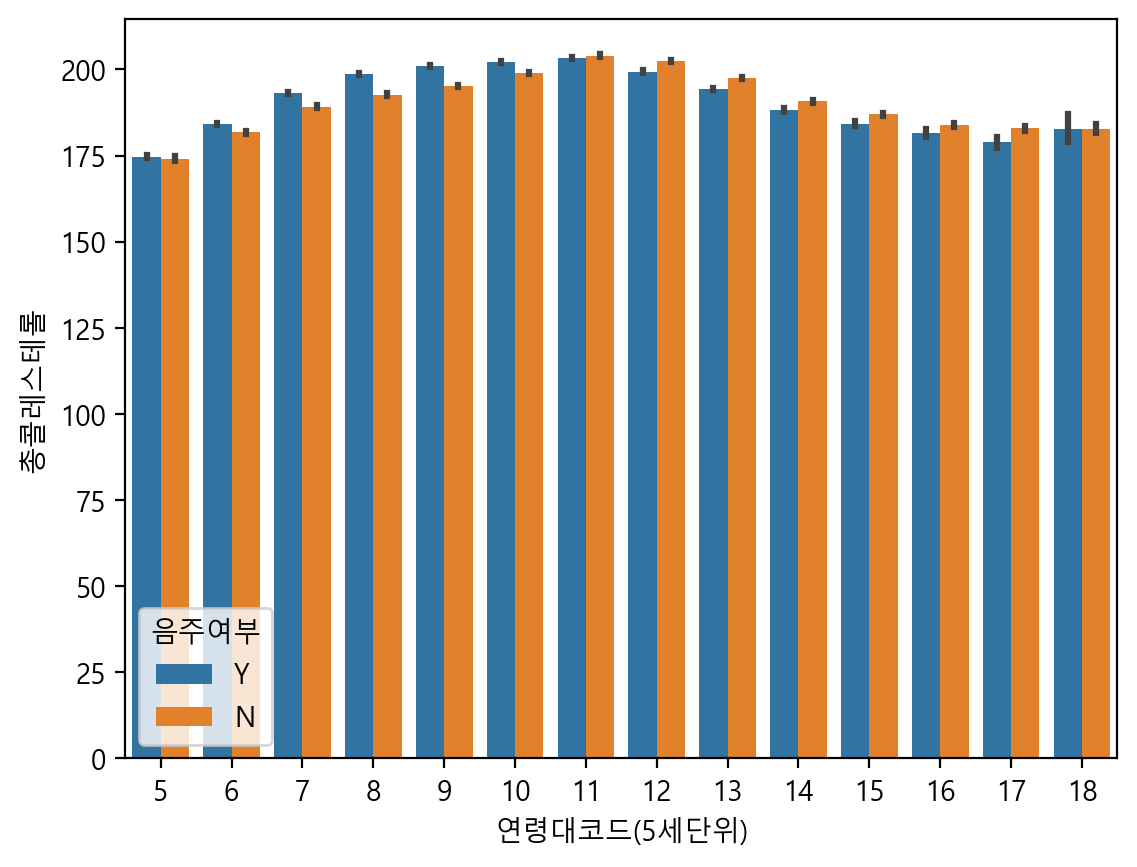

In [129]:
# 연령대x축, 총 콜레스테롤의 평균
# 음주: 1
sns.barplot(data=df, x="연령대코드(5세단위)", y="총콜레스테롤", hue="음주여부")

<Axes: xlabel='연령대코드(5세단위)', ylabel='총콜레스테롤'>

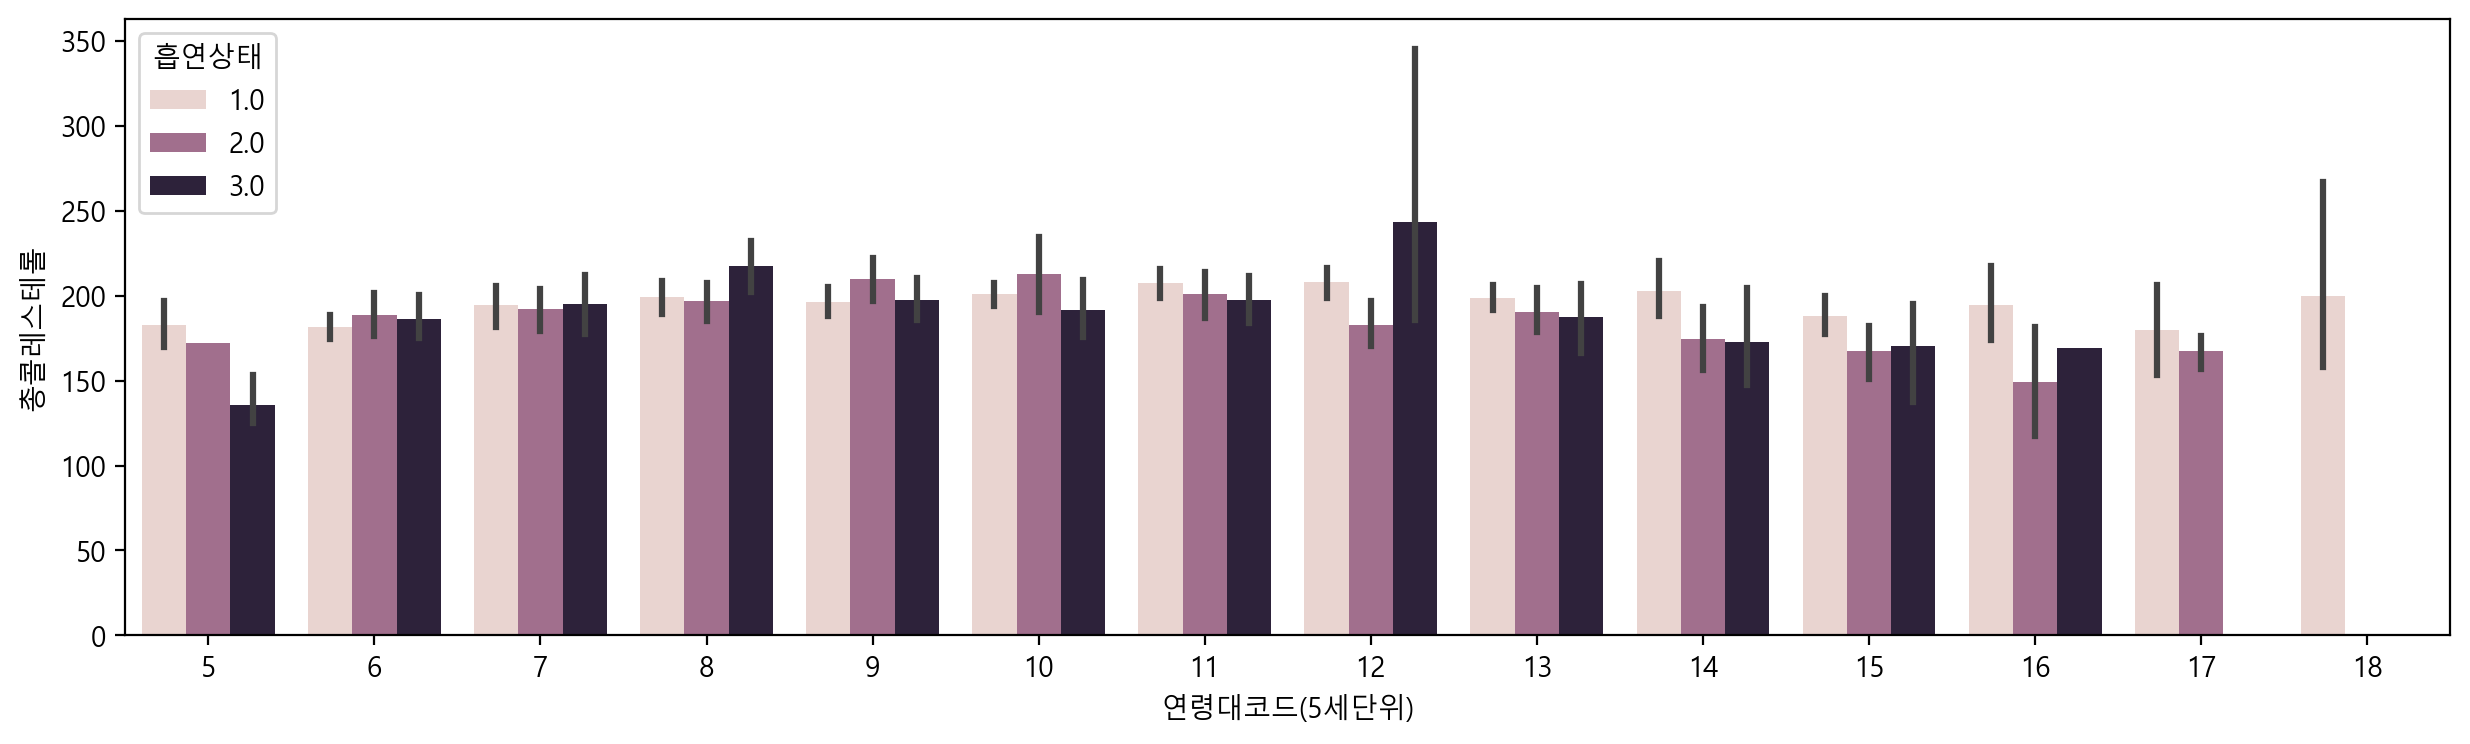

In [130]:
# 연령대x축, 총 콜레스테롤의 평균

plt.figure(figsize=(15, 4))
sns.barplot(data=df_sample, x="연령대코드(5세단위)", y="총콜레스테롤", hue="흡연상태")

<Axes: xlabel='연령대코드(5세단위)', ylabel='트리글리세라이드'>

C:\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from current font.
  func(*args, **kwargs)
C:\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 47161 (\N{HANGUL SYLLABLE RYEONG}) missing from current font.
  func(*args, **kwargs)
C:\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from current font.
  func(*args, **kwargs)
C:\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 53076 (\N{HANGUL SYLLABLE KO}) missing from current font.
  func(*args, **kwargs)
C:\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 46300 (\N{HANGUL SYLLABLE DEU}) missing from current font.
  func(*args, **kwargs)
C:\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 49464 (\N{HANGUL SYLLABLE SE}) missing from current font.
  func(*args, **kwargs)
C:\anaconda3\Lib\site-packages\IPython

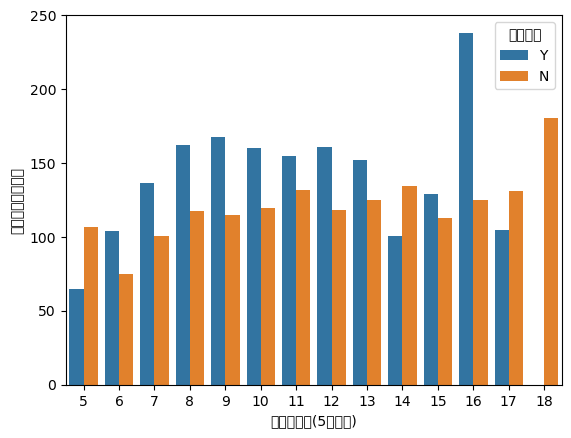

In [13]:
# 트리글리세라이드(중성지방)에 따른 연령을 음주여부에 따라 barplot으로 그리기
# ci: 신뢰구간
# sd: 표준편차

sns.barplot(data=df_sample, x="연령대코드(5세단위)", y="트리글리세라이드", hue="음주여부", errorbar=None)

C:\Users\wongahee\AppData\Local\Temp\ipykernel_243716\788014314.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_sample, x="연령대코드(5세단위)", y="트리글리세라이드", hue="음주여부", ci=None)


<Axes: xlabel='연령대코드(5세단위)', ylabel='트리글리세라이드'>

C:\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from current font.
  func(*args, **kwargs)
C:\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 47161 (\N{HANGUL SYLLABLE RYEONG}) missing from current font.
  func(*args, **kwargs)
C:\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from current font.
  func(*args, **kwargs)
C:\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 53076 (\N{HANGUL SYLLABLE KO}) missing from current font.
  func(*args, **kwargs)
C:\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 46300 (\N{HANGUL SYLLABLE DEU}) missing from current font.
  func(*args, **kwargs)
C:\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 49464 (\N{HANGUL SYLLABLE SE}) missing from current font.
  func(*args, **kwargs)
C:\anaconda3\Lib\site-packages\IPython

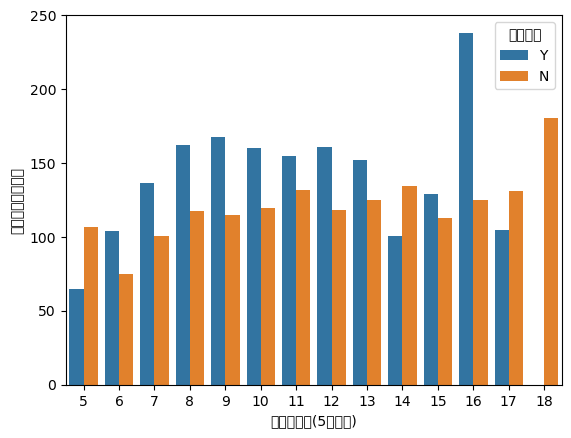

In [17]:
sns.barplot(data=df_sample, x="연령대코드(5세단위)", y="트리글리세라이드", hue="음주여부", ci=None)

C:\Users\wongahee\AppData\Local\Temp\ipykernel_227156\2795607635.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_sample, x="연령대코드(5세단위)", y="체중(5Kg단위)", hue="성별코드", ci=None)


<Axes: xlabel='연령대코드(5세단위)', ylabel='체중(5Kg단위)'>

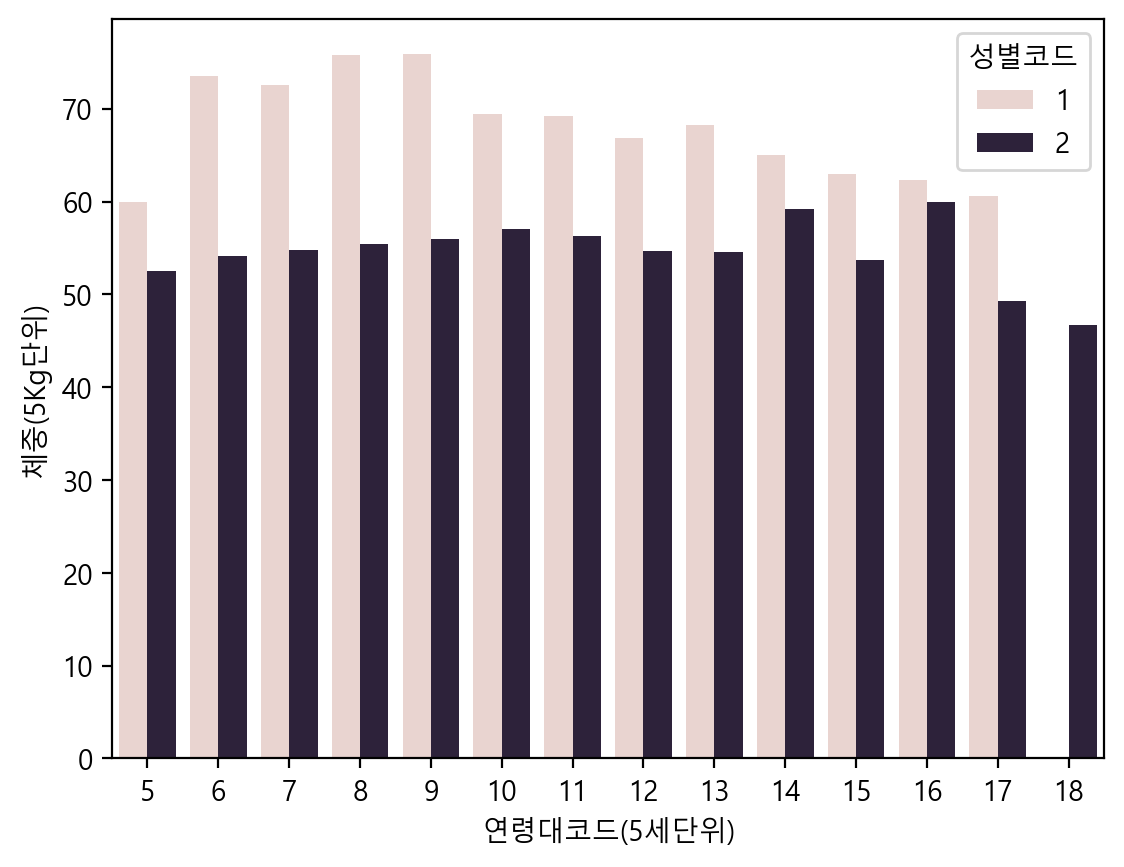

In [133]:
sns.barplot(data=df_sample, x="연령대코드(5세단위)", y="체중(5Kg단위)", hue="성별코드", ci=None)

C:\Users\wongahee\AppData\Local\Temp\ipykernel_227156\912983379.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_sample, x="연령대코드(5세단위)", y="체중(5Kg단위)", hue="음주여부", ci=None)


<Axes: xlabel='연령대코드(5세단위)', ylabel='체중(5Kg단위)'>

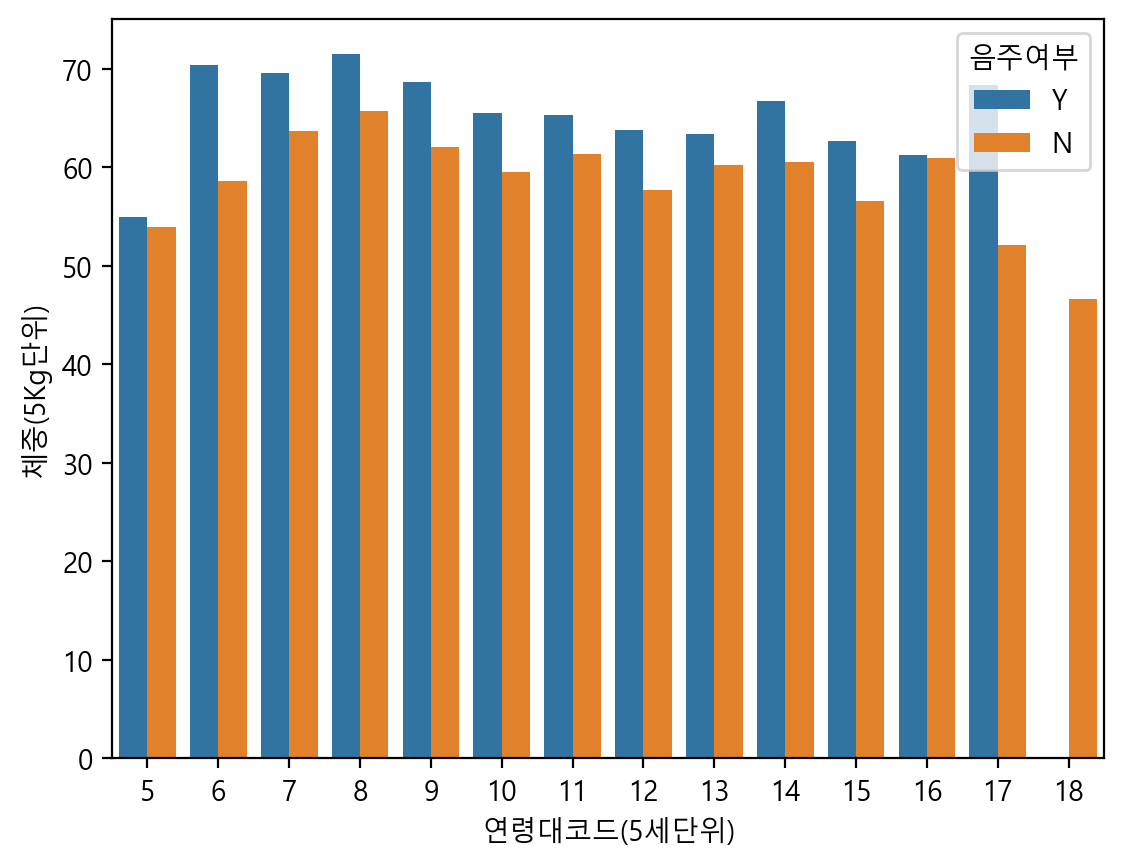

In [134]:
sns.barplot(data=df_sample, x="연령대코드(5세단위)", y="체중(5Kg단위)", hue="음주여부", ci=None)

## 14.5 lineplot and pointplot
* lineplot: 신뢰구간을 그림자로 표현
* pointplot: 신뢰구간을 막대로 표현

C:\Users\wongahee\AppData\Local\Temp\ipykernel_227156\703159506.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(data=df_sample, x="연령대코드(5세단위)", y="체중(5Kg단위)", hue="성별코드", ci="sd")


<Axes: xlabel='연령대코드(5세단위)', ylabel='체중(5Kg단위)'>

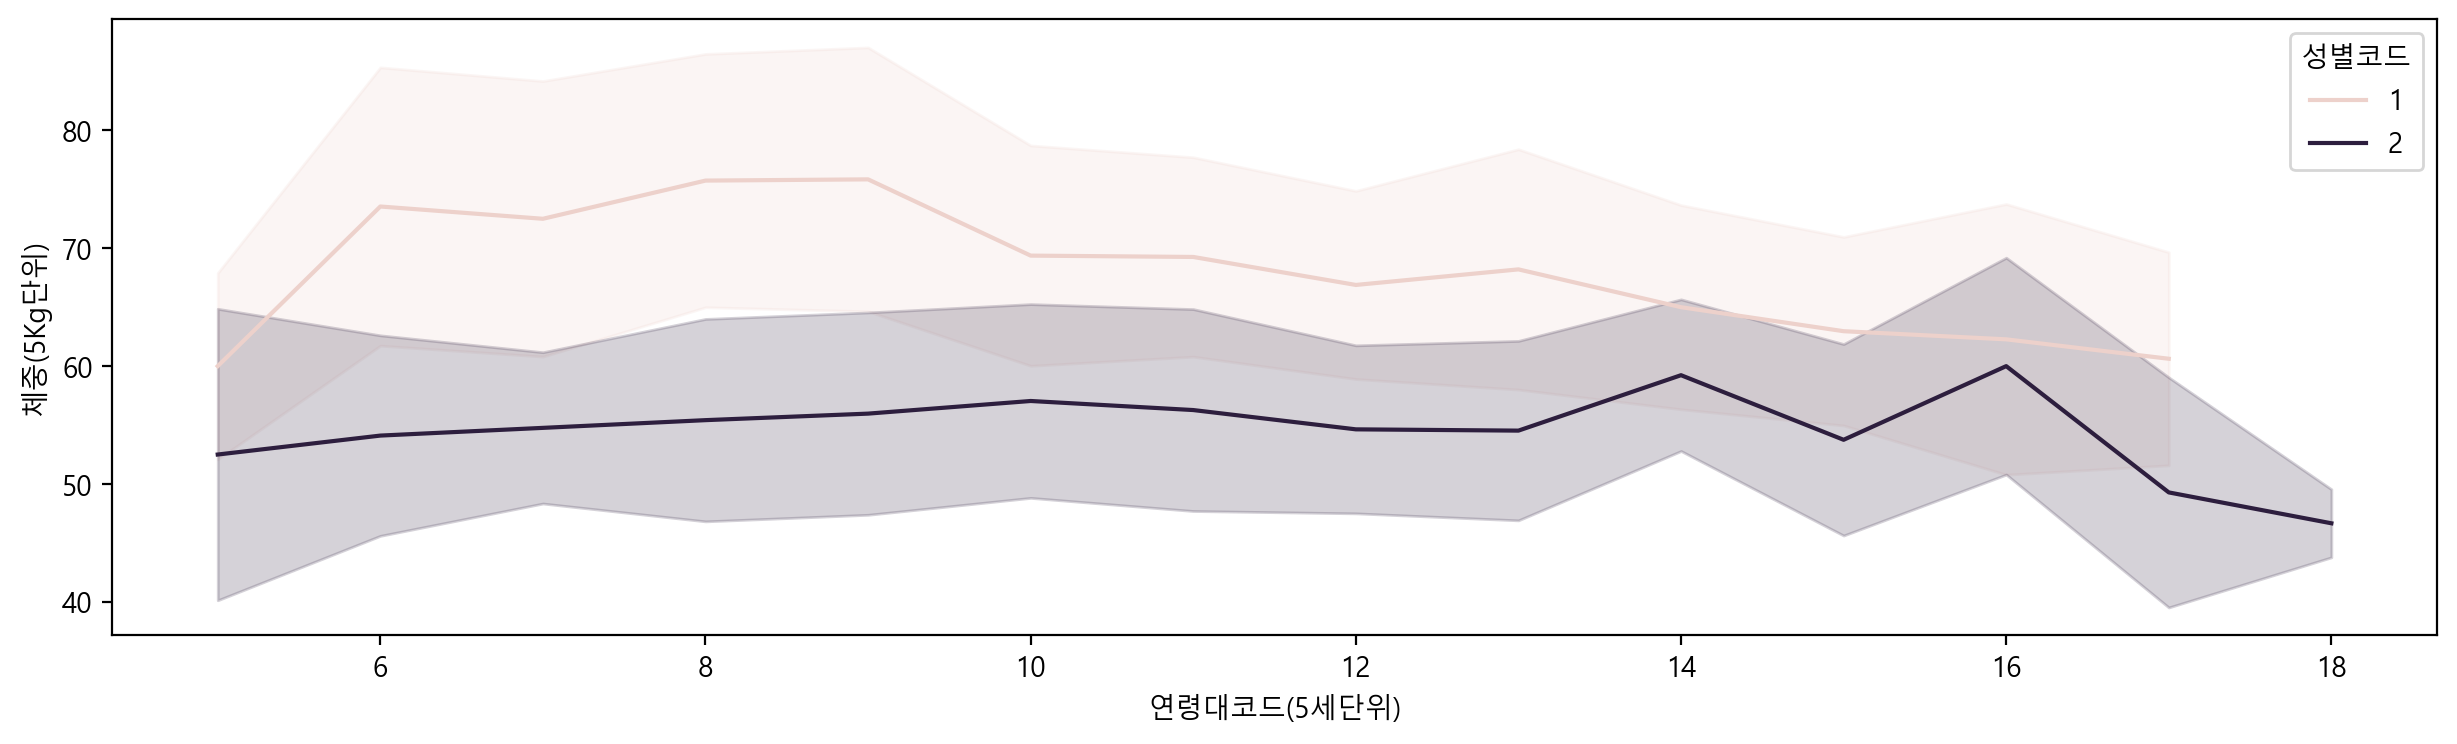

In [136]:
# 그림자 모양 신뢰구간
plt.figure(figsize=(15, 4))
sns.lineplot(data=df_sample, x="연령대코드(5세단위)", y="체중(5Kg단위)", hue="성별코드", ci="sd")

C:\Users\wongahee\AppData\Local\Temp\ipykernel_227156\2517841266.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(data=df_sample, x="연령대코드(5세단위)", y="신장(5Cm단위)", hue="성별코드", ci="sd")


<Axes: xlabel='연령대코드(5세단위)', ylabel='신장(5Cm단위)'>

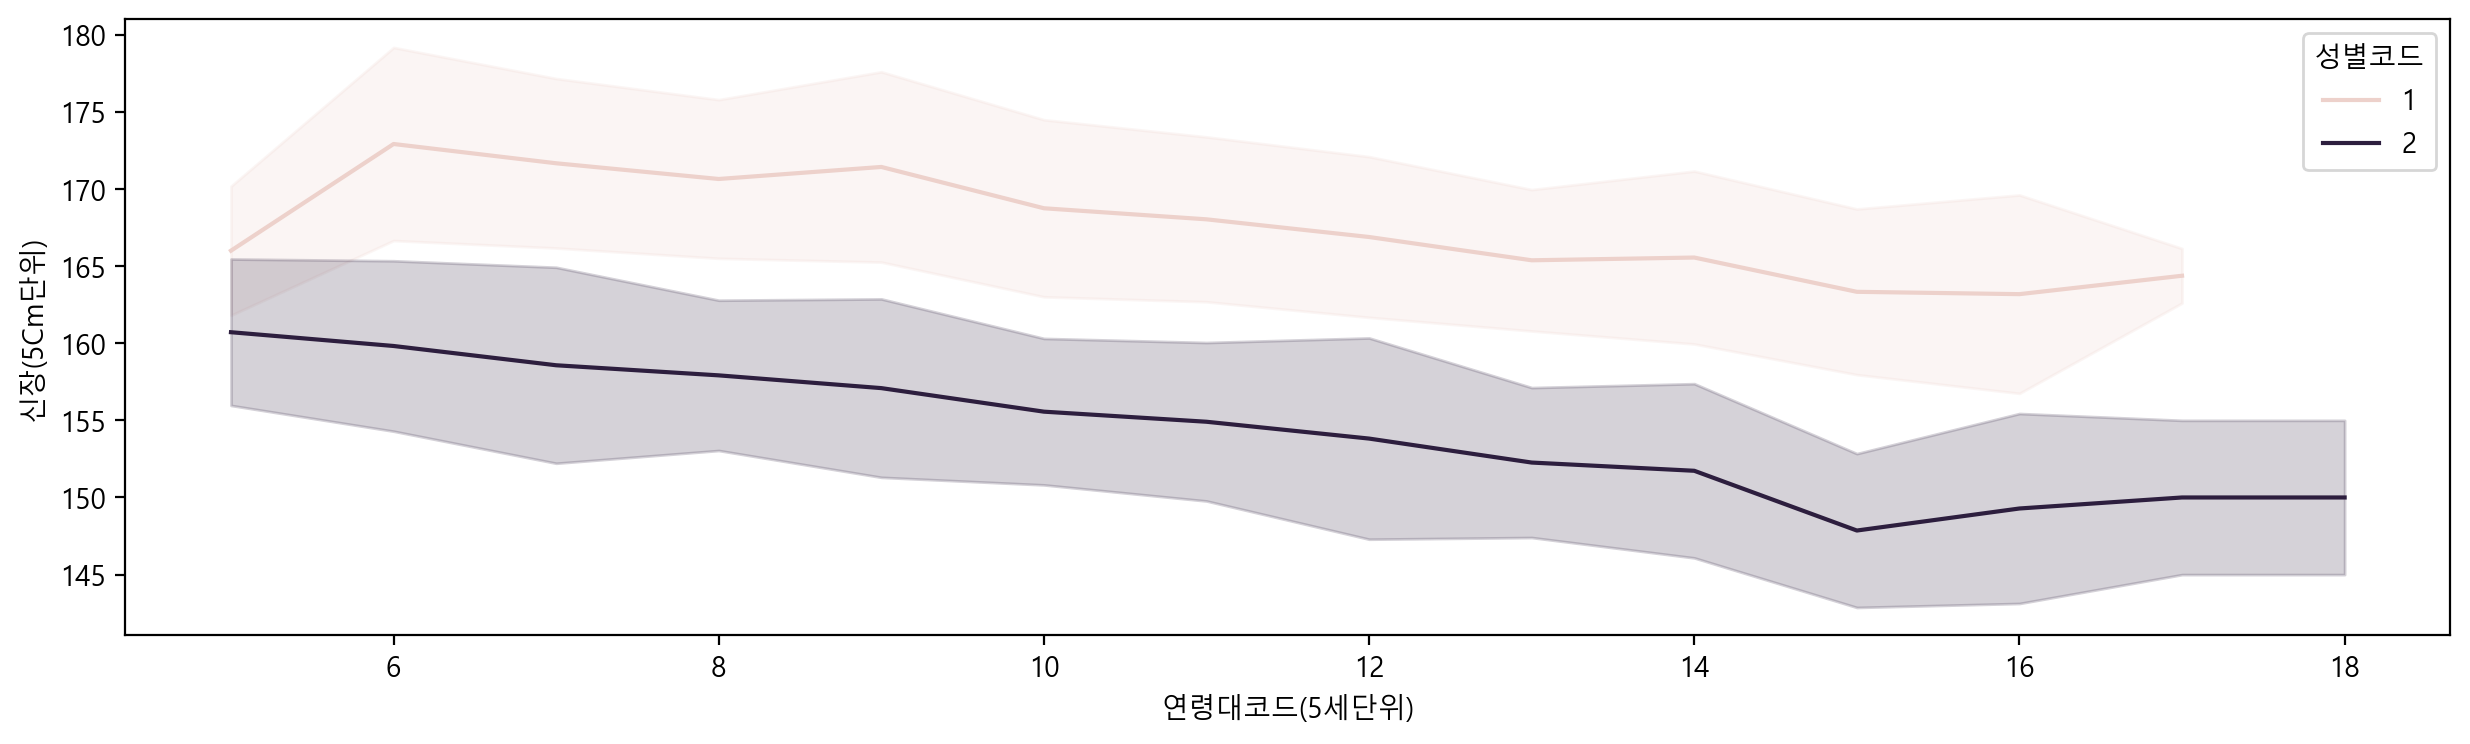

In [137]:
plt.figure(figsize=(15, 4))
sns.lineplot(data=df_sample, x="연령대코드(5세단위)", y="신장(5Cm단위)", hue="성별코드", ci="sd")

C:\Users\wongahee\AppData\Local\Temp\ipykernel_227156\2168986455.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(data=df_sample, x="연령대코드(5세단위)", y="신장(5Cm단위)", hue="음주여부", ci="sd")


<Axes: xlabel='연령대코드(5세단위)', ylabel='신장(5Cm단위)'>

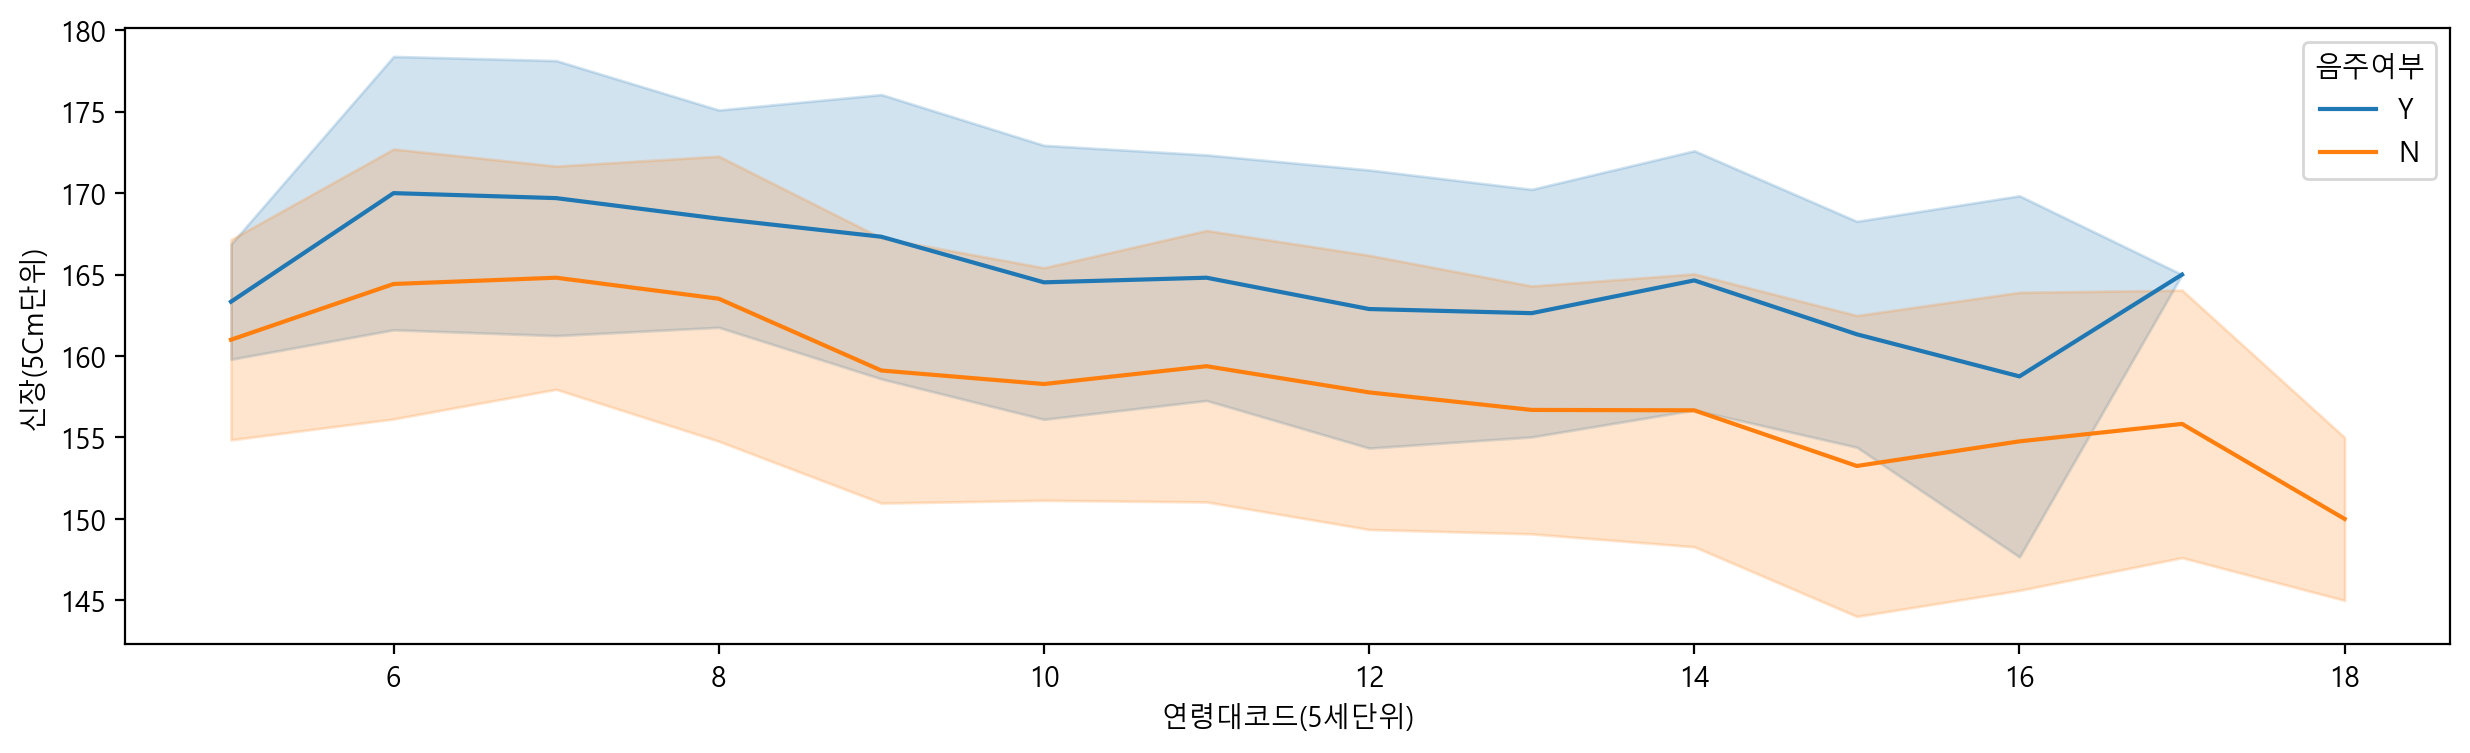

In [138]:
plt.figure(figsize=(15, 4))
sns.lineplot(data=df_sample, x="연령대코드(5세단위)", y="신장(5Cm단위)", hue="음주여부", ci="sd")

C:\Users\wongahee\AppData\Local\Temp\ipykernel_227156\3367495646.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.pointplot(data=df_sample, x="연령대코드(5세단위)", y="신장(5Cm단위)", hue="음주여부", ci="sd")


<Axes: xlabel='연령대코드(5세단위)', ylabel='신장(5Cm단위)'>

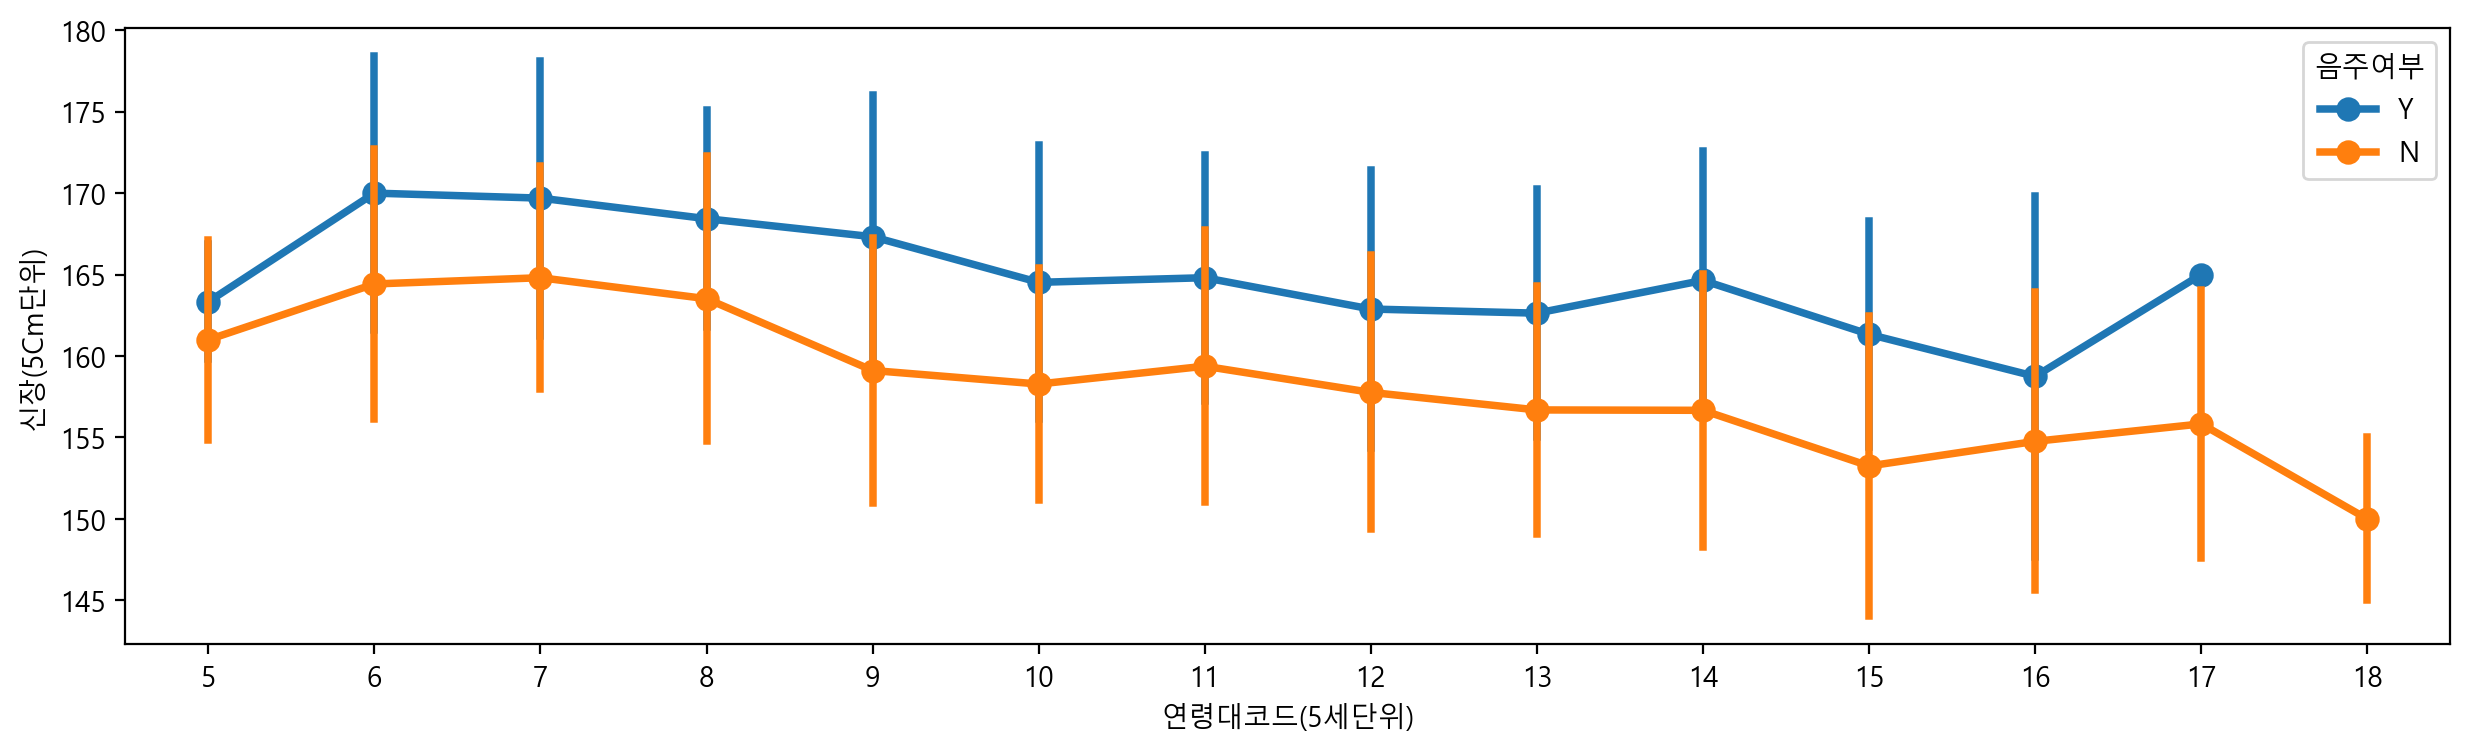

In [139]:
plt.figure(figsize=(15, 4))
sns.pointplot(data=df_sample, x="연령대코드(5세단위)", y="신장(5Cm단위)", hue="음주여부", ci="sd")

C:\Users\wongahee\AppData\Local\Temp\ipykernel_227156\4178520251.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(data=df_sample, x="연령대코드(5세단위)", y="신장(5Cm단위)", hue="음주여부", ci="sd")
C:\Users\wongahee\AppData\Local\Temp\ipykernel_227156\4178520251.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.pointplot(data=df_sample, x="연령대코드(5세단위)", y="신장(5Cm단위)", hue="음주여부", ci="sd")


<Axes: xlabel='연령대코드(5세단위)', ylabel='신장(5Cm단위)'>

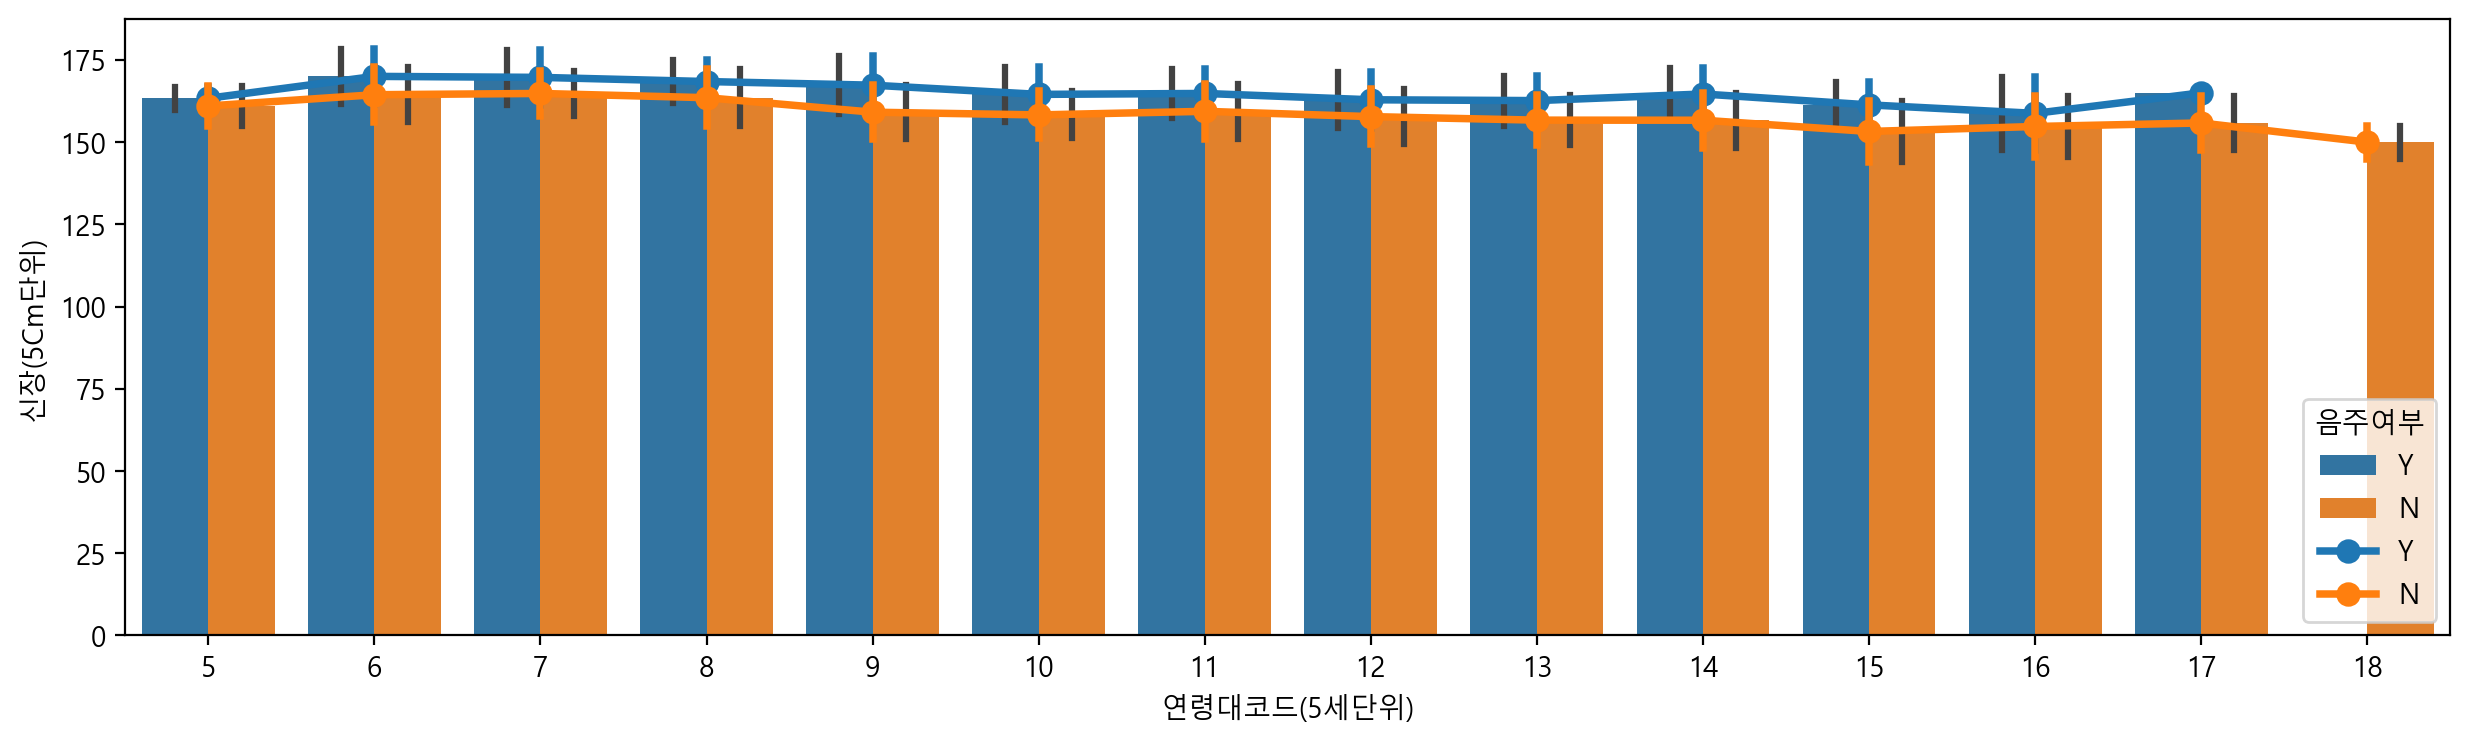

In [140]:
plt.figure(figsize=(15, 4))
sns.barplot(data=df_sample, x="연령대코드(5세단위)", y="신장(5Cm단위)", hue="음주여부", ci="sd")
sns.pointplot(data=df_sample, x="연령대코드(5세단위)", y="신장(5Cm단위)", hue="음주여부", ci="sd")

C:\Users\wongahee\AppData\Local\Temp\ipykernel_227156\1439253839.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.pointplot(data=df_sample, x="연령대코드(5세단위)", y="신장(5Cm단위)", hue="성별코드", ci="sd")


<Axes: xlabel='연령대코드(5세단위)', ylabel='신장(5Cm단위)'>

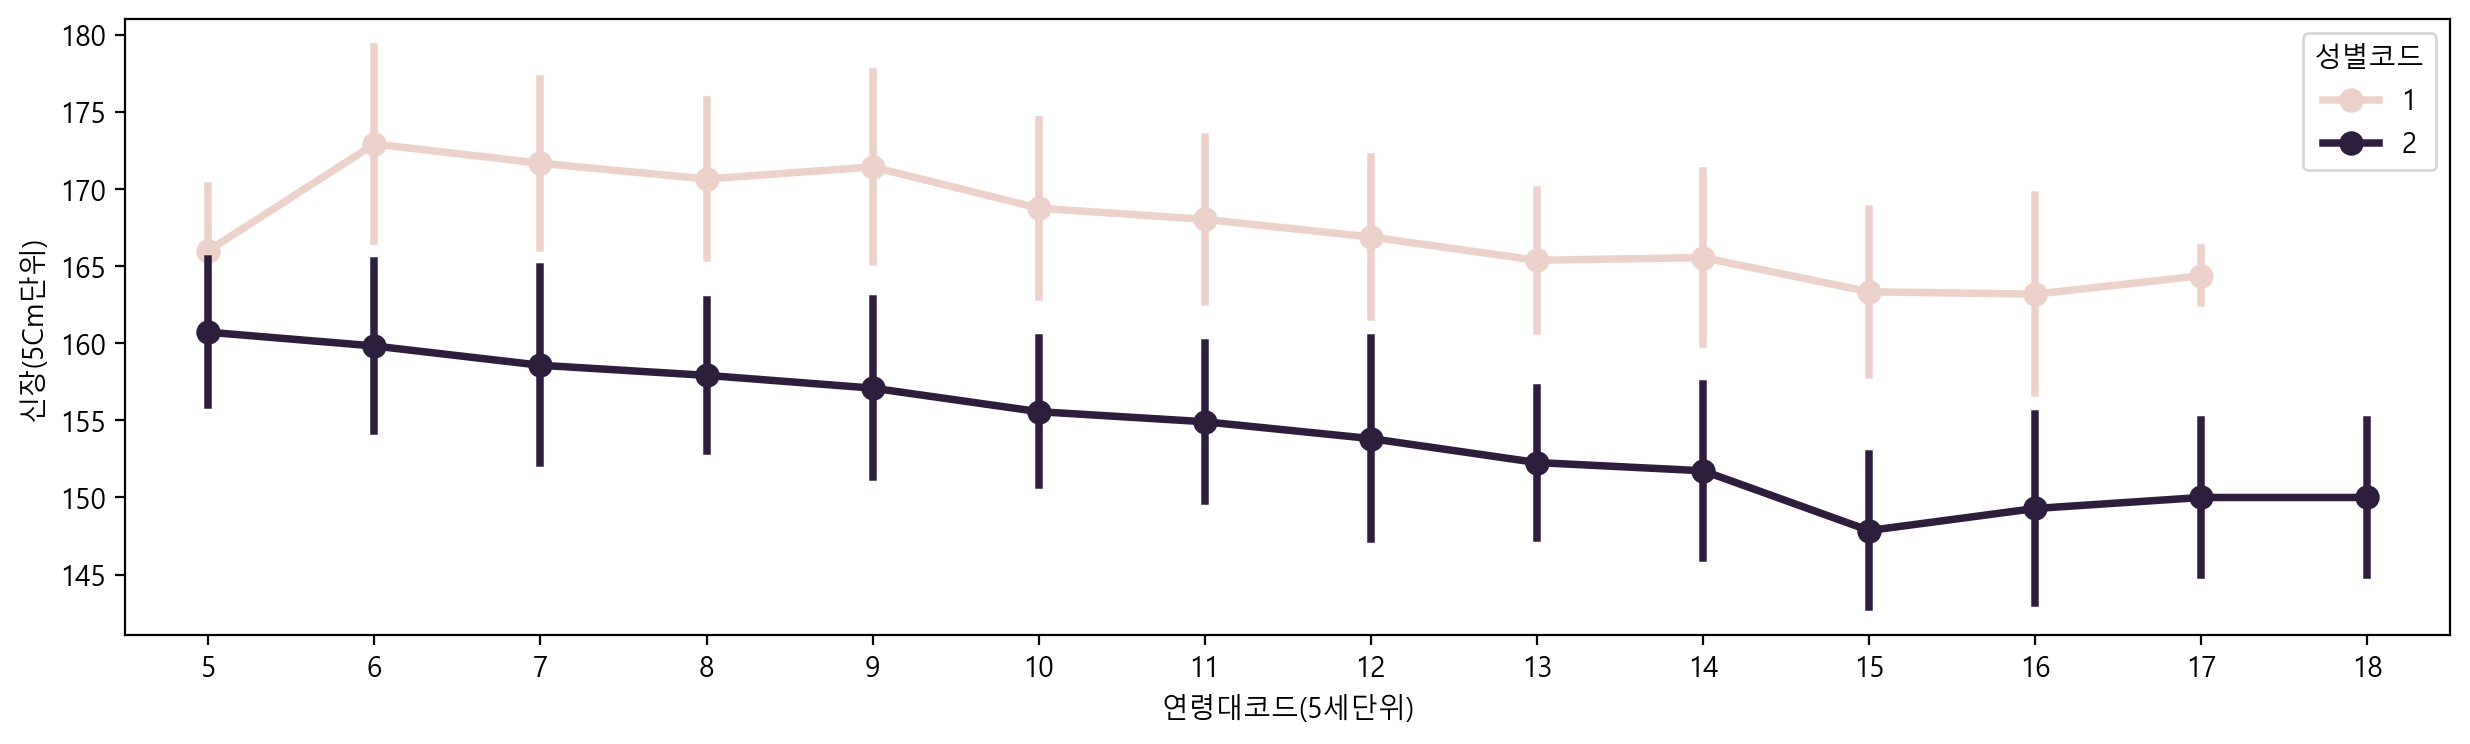

In [141]:
plt.figure(figsize=(15, 4))
sns.pointplot(data=df_sample, x="연령대코드(5세단위)", y="신장(5Cm단위)", hue="성별코드", ci="sd")

C:\Users\wongahee\AppData\Local\Temp\ipykernel_227156\3852130428.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x="연령대코드(5세단위)", y="혈색소", hue="음주여부", ci=None)


<Axes: xlabel='연령대코드(5세단위)', ylabel='혈색소'>

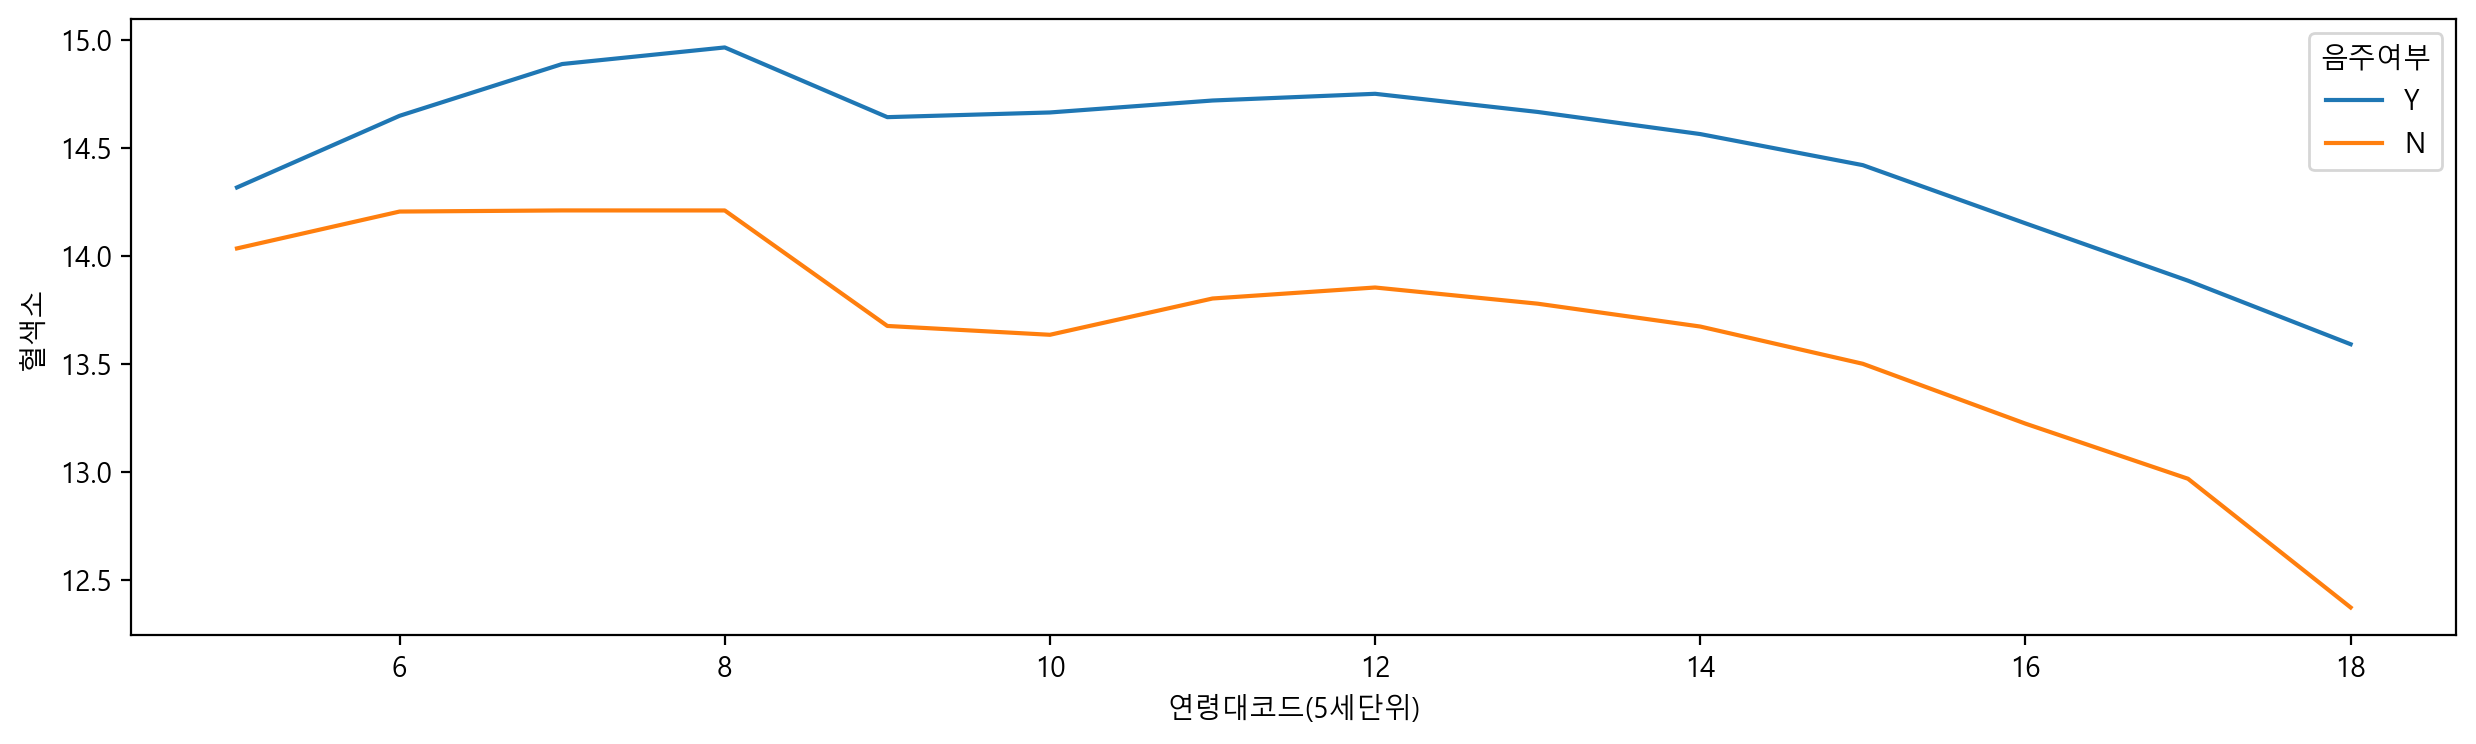

In [142]:
plt.figure(figsize=(15, 4))
sns.lineplot(data=df, x="연령대코드(5세단위)", y="혈색소", hue="음주여부", ci=None)

## 14.6 boxplot
* https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html
* 상자수염그림
* 가공하지 않는 자료 그대로를 이용하여 그린 것이 아니라, 자료로부터 얻어낸 통계량인 5가지 요약 수치로 그림
* 5가지 요약 수치
    * 최솟값, 제 1사분위수, 제 2사분위수(=중앙값), 제 3사분위수, 최댓값
* 상자, 수염 이외 원점모양은 `이상치`를 뜻함

<Axes: xlabel='신장(5Cm단위)', ylabel='체중(5Kg단위)'>

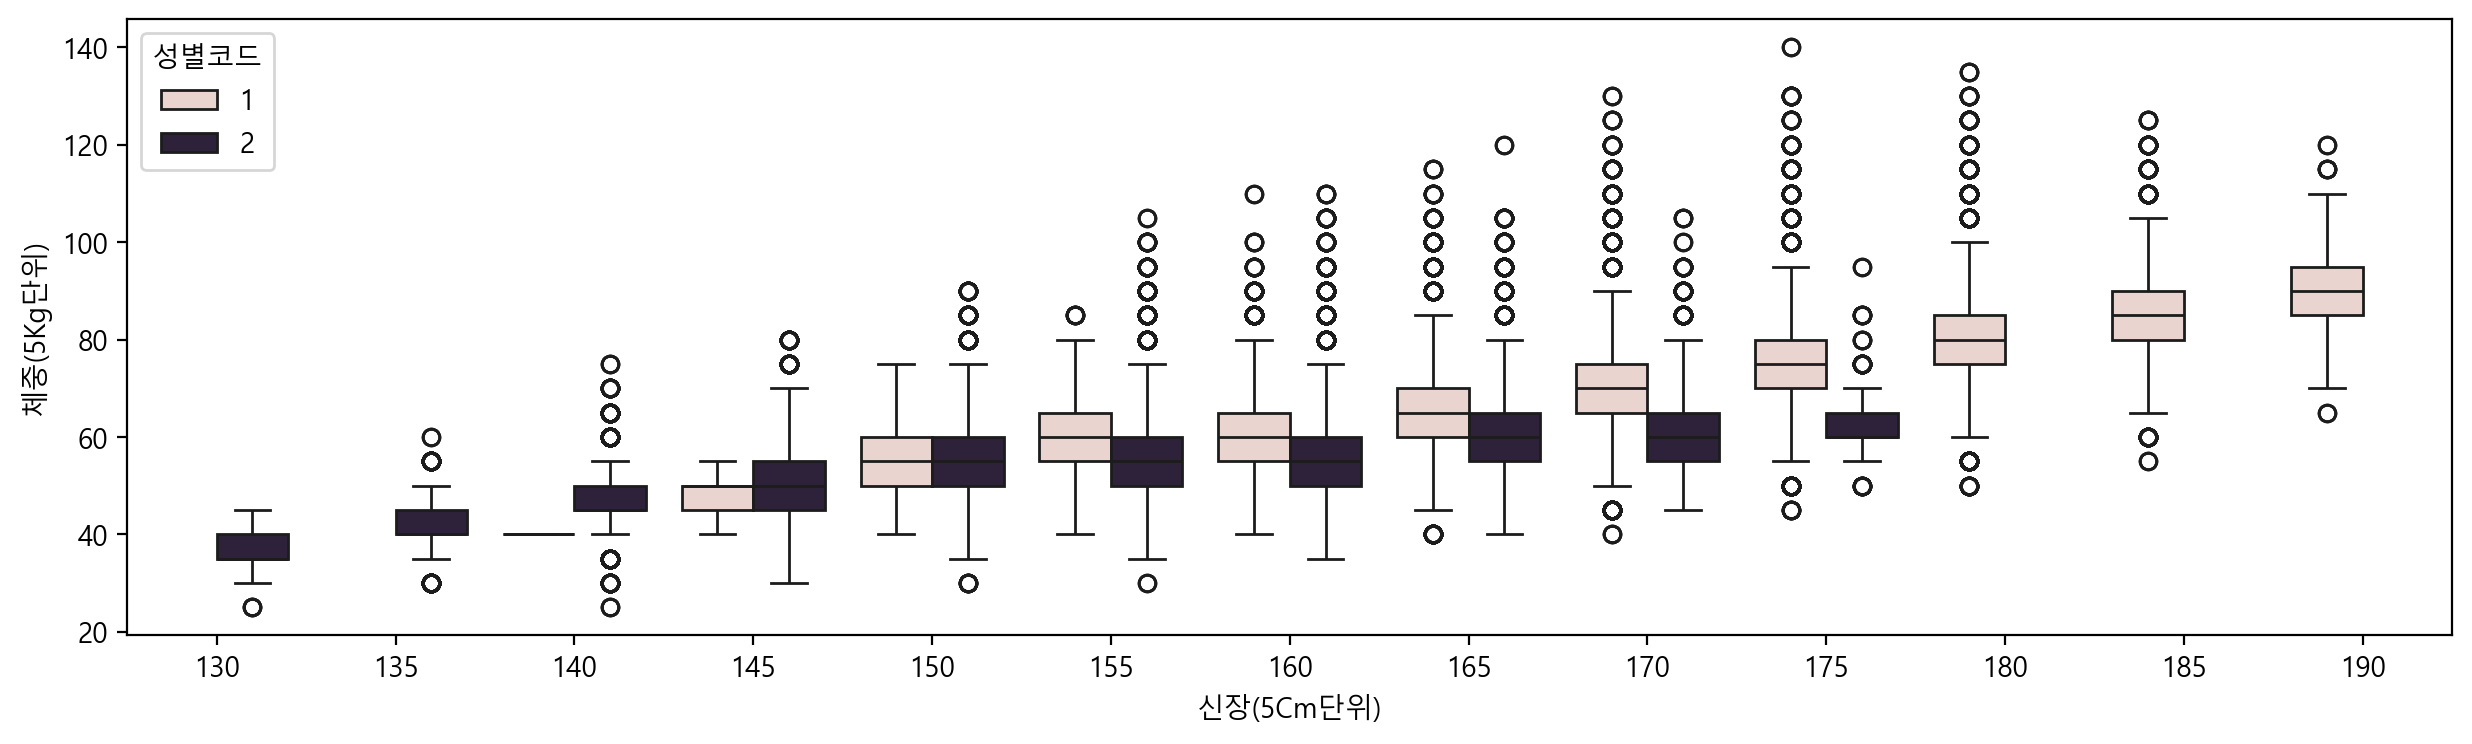

In [144]:
plt.figure(figsize=(15, 4))
sns.boxplot(data=df, x="신장(5Cm단위)", y="체중(5Kg단위)", hue="성별코드")

## 14.7 violinplot
* boxplot의 상자 안 데이터를 보기 어렵다는 단점을 보완해주는 그래프

<Axes: xlabel='신장(5Cm단위)', ylabel='체중(5Kg단위)'>

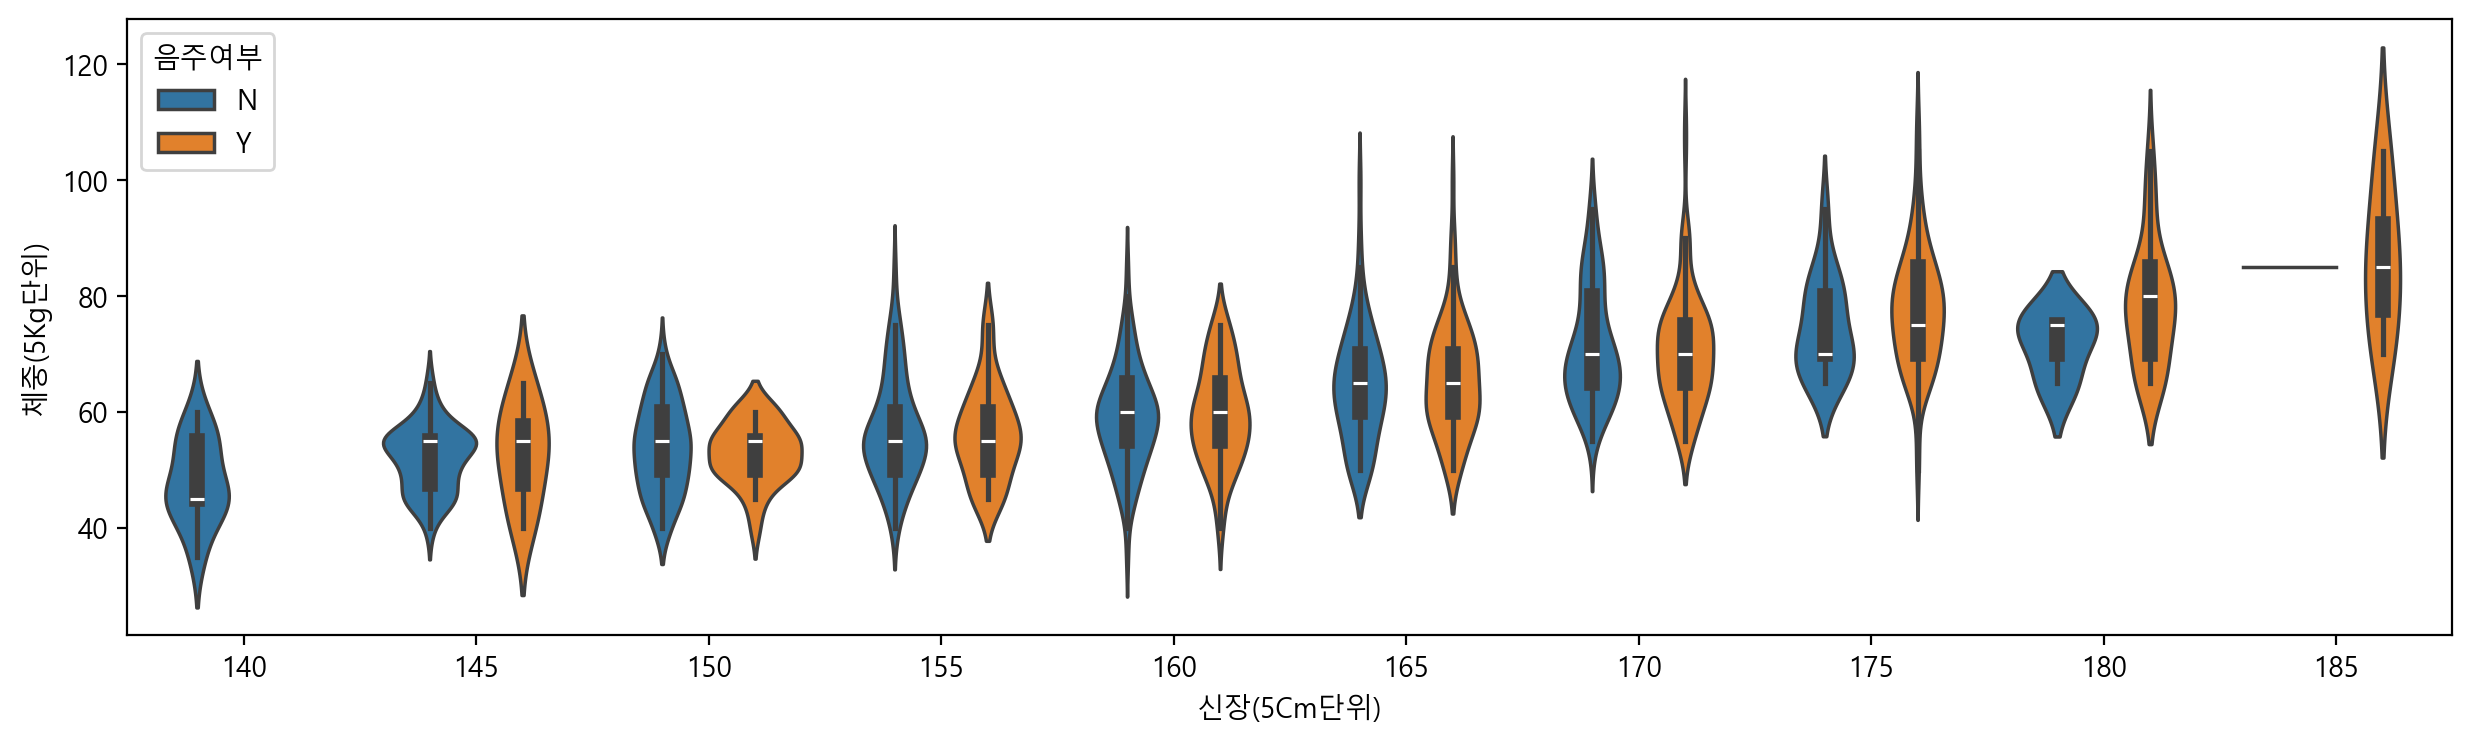

In [146]:
plt.figure(figsize=(15, 4))
sns.violinplot(data=df_sample, x="신장(5Cm단위)", y="체중(5Kg단위)", hue="음주여부")

<Axes: xlabel='신장(5Cm단위)', ylabel='체중(5Kg단위)'>

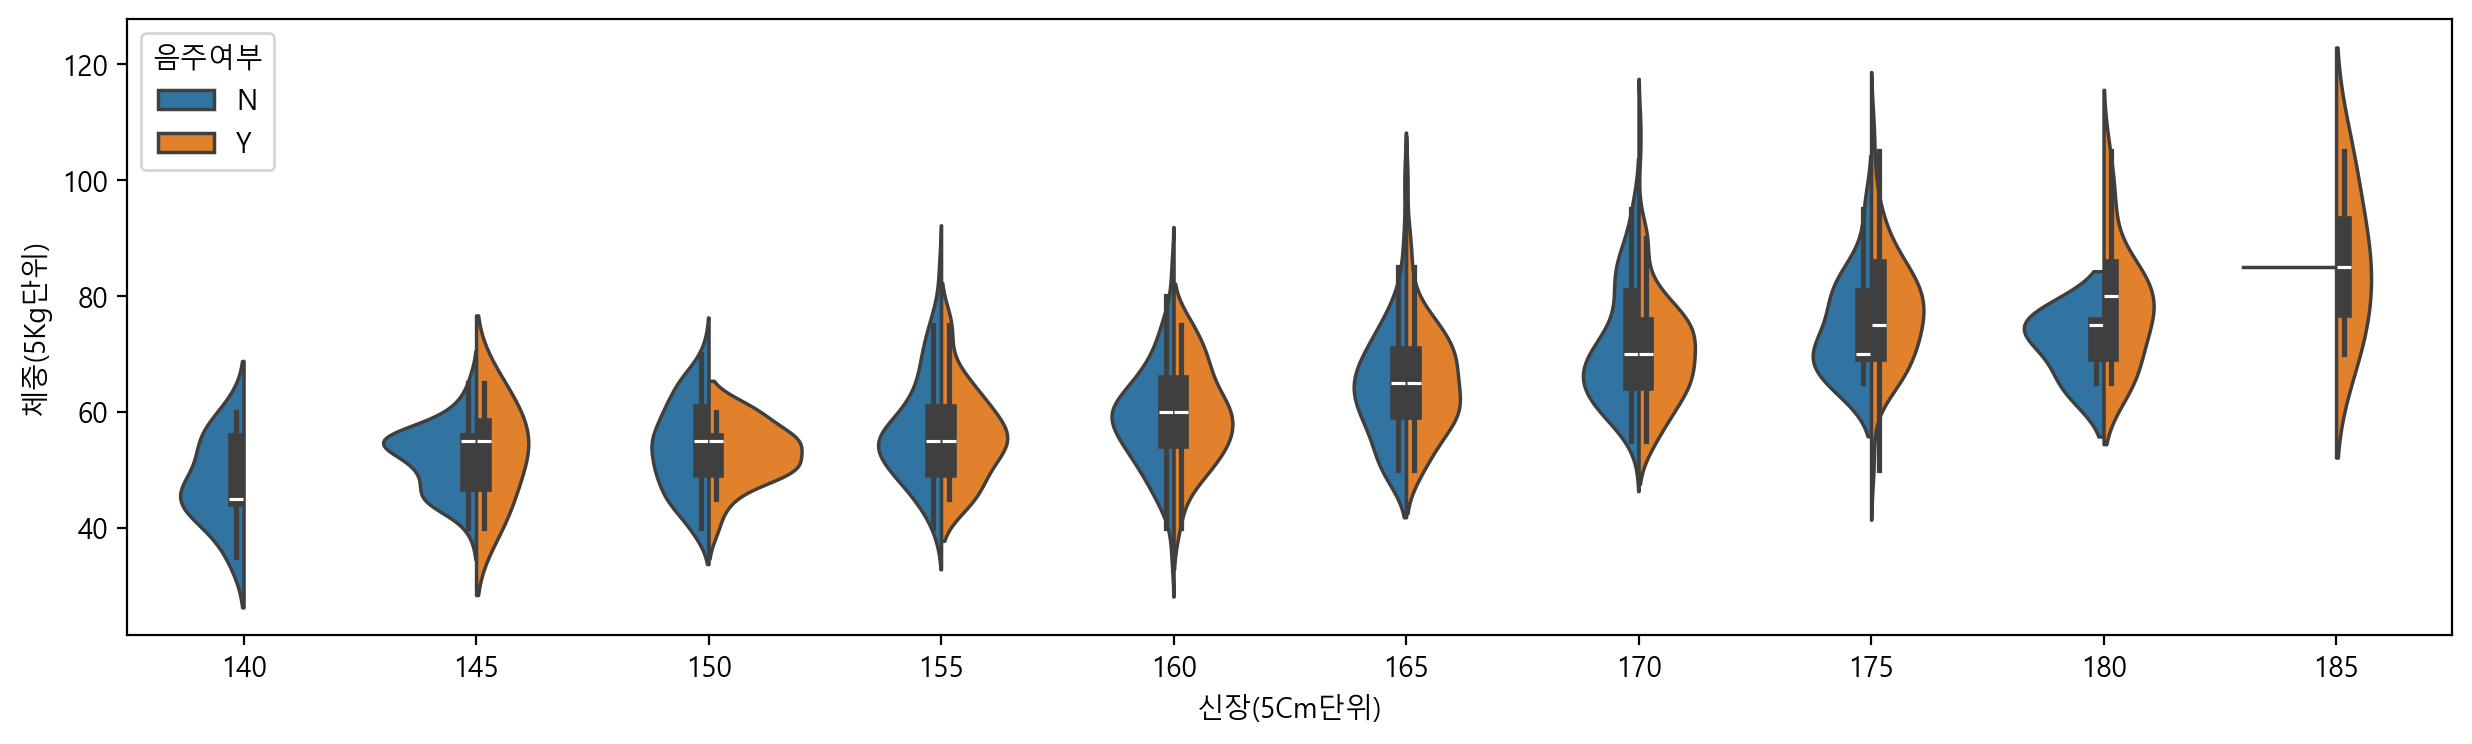

In [147]:
# split=True: 두 데이터를 붙여서 표현
plt.figure(figsize=(15, 4))
sns.violinplot(data=df_sample, x="신장(5Cm단위)", y="체중(5Kg단위)", hue="음주여부", split=True)

<Axes: xlabel='연령대코드(5세단위)', ylabel='혈색소'>

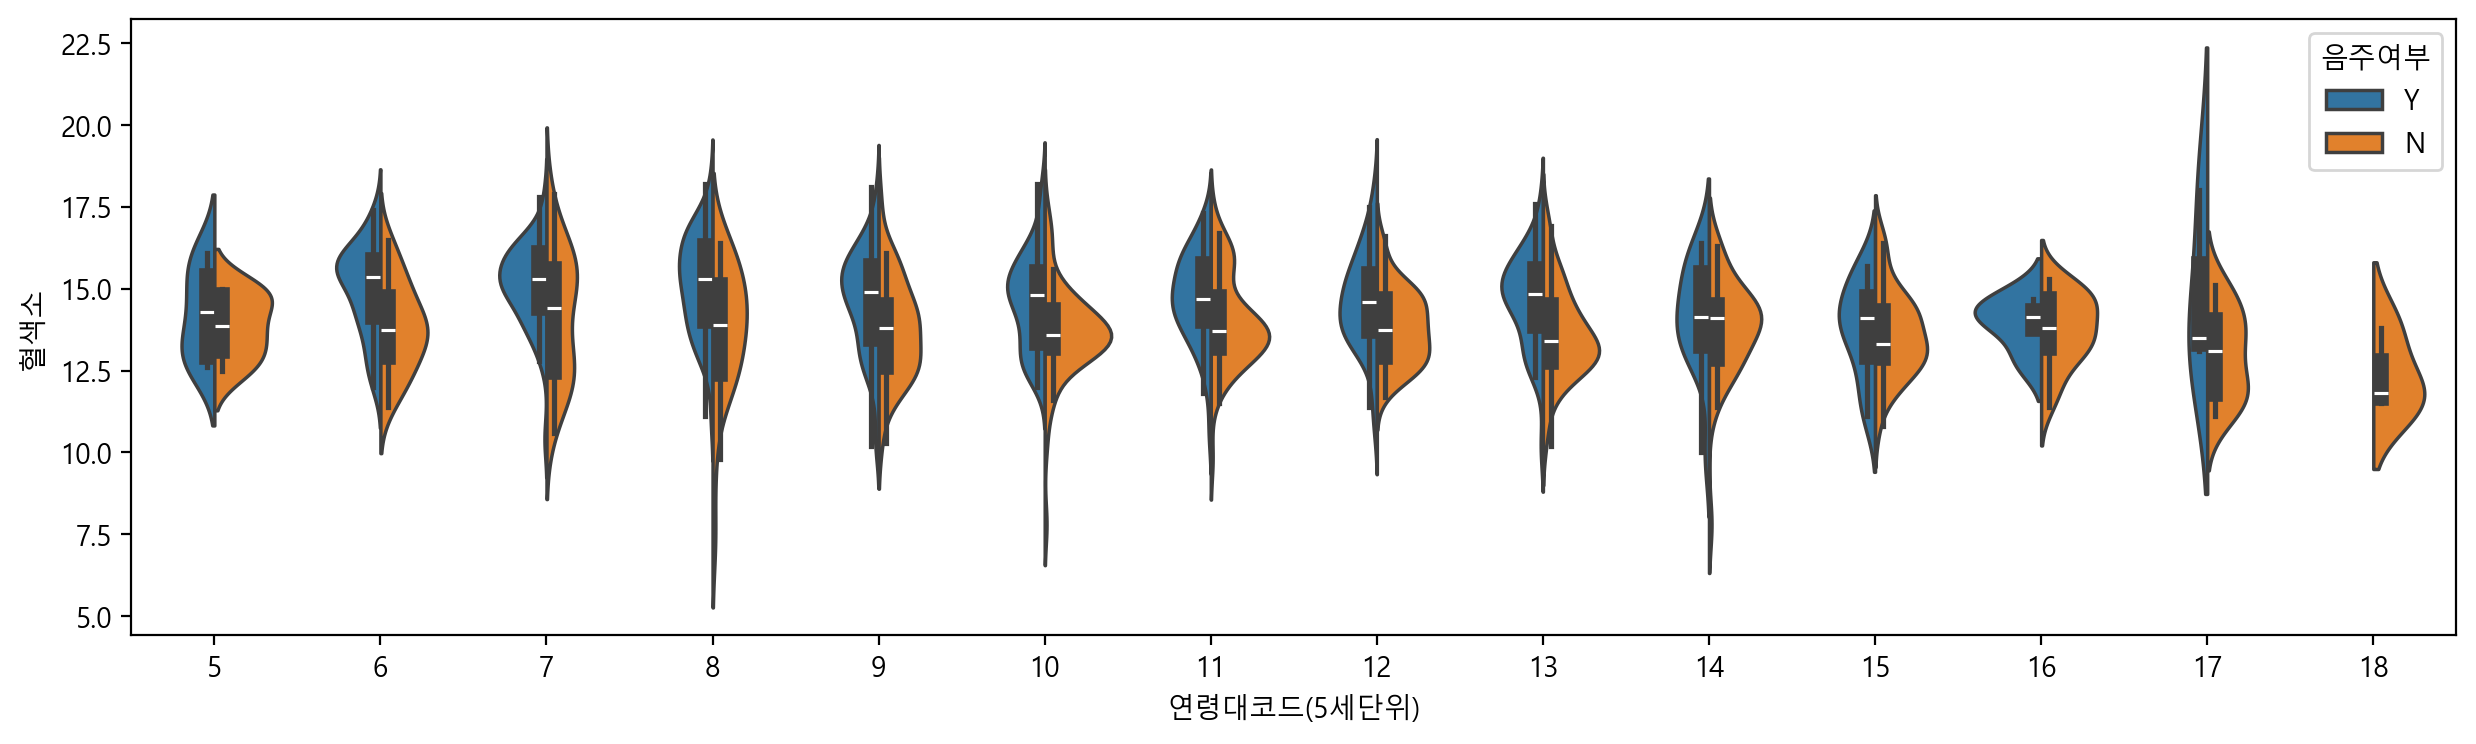

In [148]:
plt.figure(figsize=(15, 4))
sns.violinplot(data=df_sample, x="연령대코드(5세단위)", y="혈색소", hue="음주여부", split=True)

## 14.8 swarm plot
* 범주형 데이터를 산점도로 데이터 시각화 가능

C:\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 9.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 36.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 43.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 48.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 47.2% of the points cannot be placed; you may want to decrease the size of the m

<Axes: xlabel='신장(5Cm단위)', ylabel='체중(5Kg단위)'>

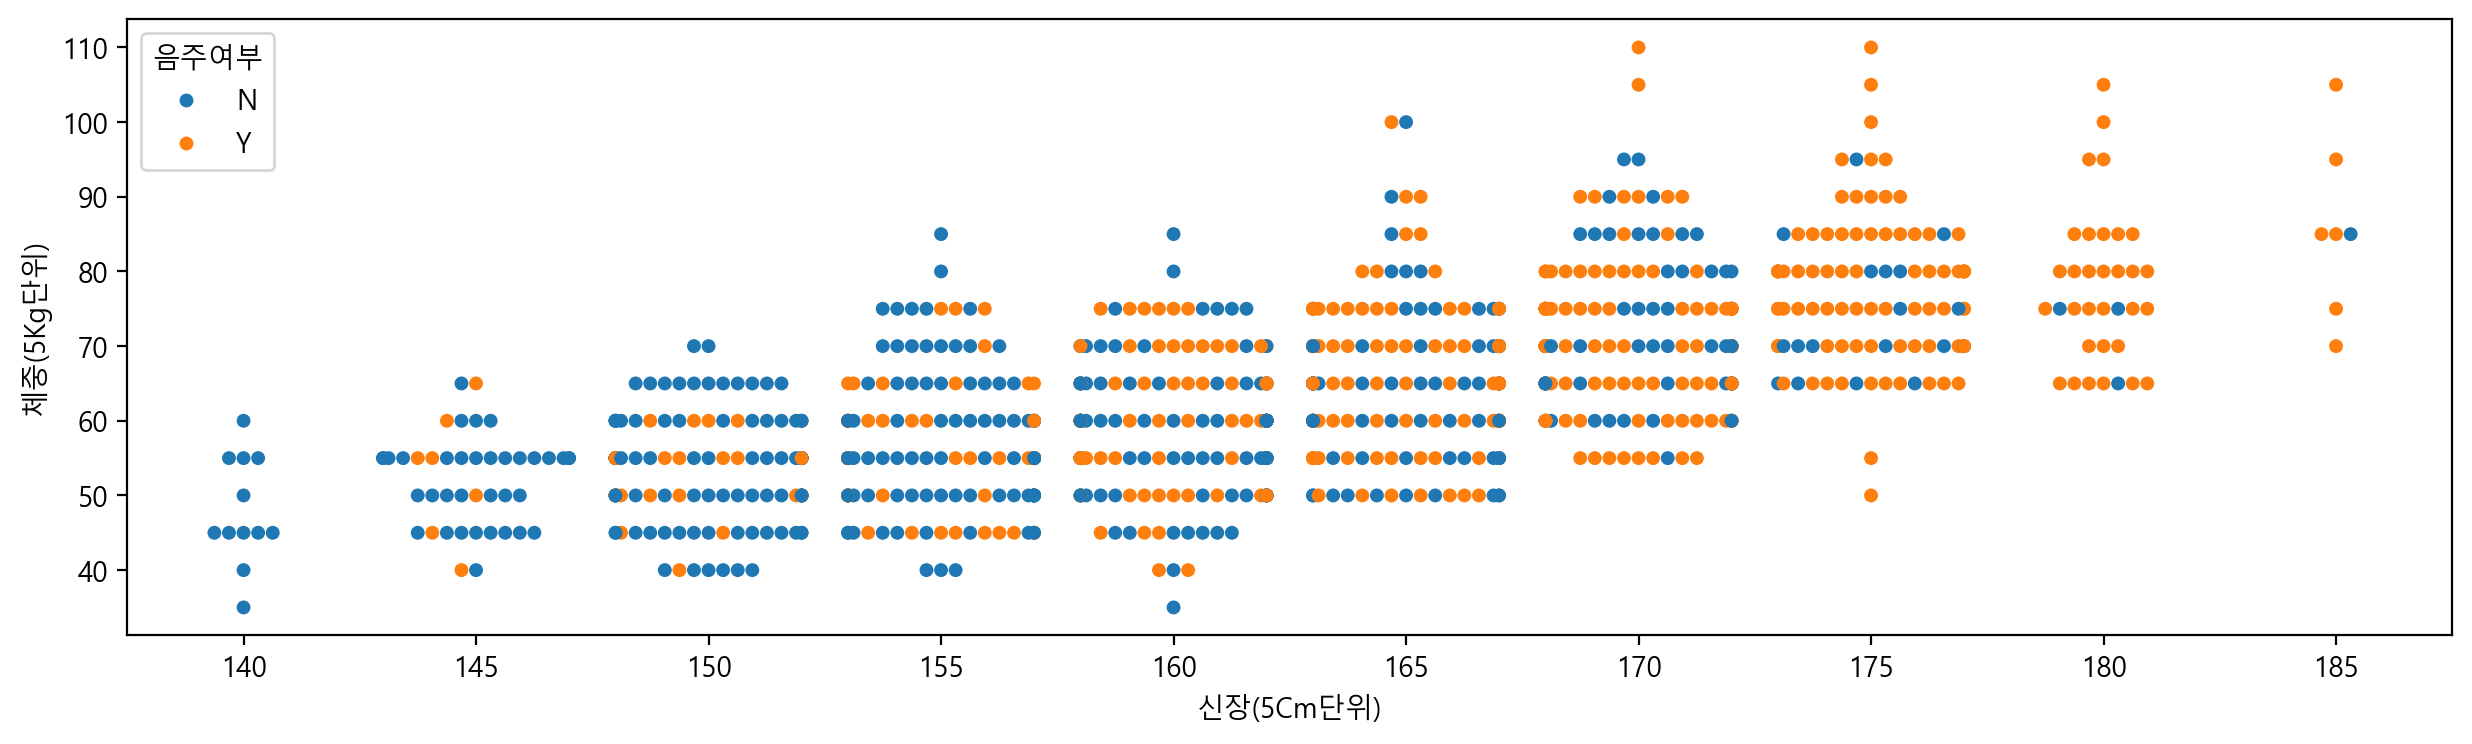

In [150]:
plt.figure(figsize=(15, 4))
sns.swarmplot(data=df_sample, x="신장(5Cm단위)", y="체중(5Kg단위)", hue="음주여부")

C:\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 9.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 36.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 43.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 48.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 47.2% of the points cannot be placed; you may want to decrease the size of the m

<Axes: xlabel='신장(5Cm단위)', ylabel='체중(5Kg단위)'>

C:\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 9.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 36.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 43.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 48.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 47.2% of the points cannot be placed; you may want to decrease the size of the m

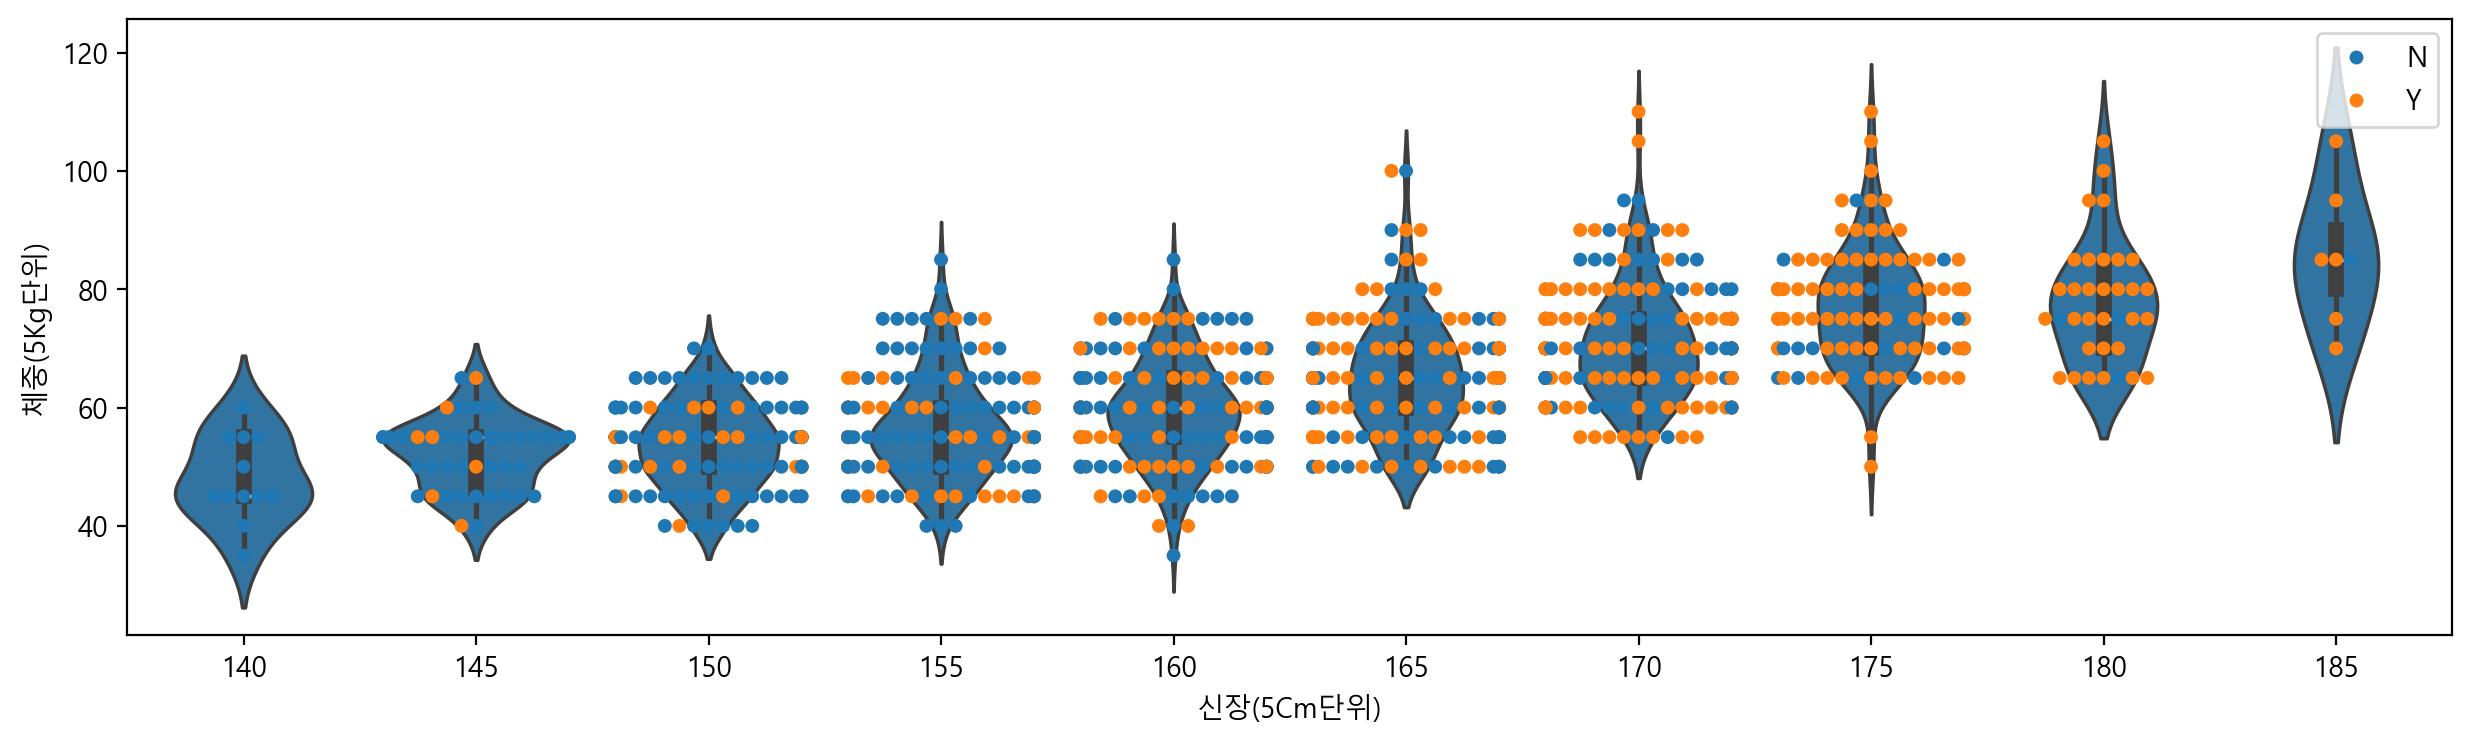

In [151]:
# violinplot와 함께 그리기 가능
plt.figure(figsize=(15, 4))
sns.swarmplot(data=df_sample, x="신장(5Cm단위)", y="체중(5Kg단위)", hue="음주여부")
sns.violinplot(data=df_sample, x="신장(5Cm단위)", y="체중(5Kg단위)")

C:\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 10.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 15.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 8.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 8.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 5.7% of the points cannot be placed; you may want to decrease the size of the mar

<Axes: xlabel='연령대코드(5세단위)', ylabel='혈색소'>

C:\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 13.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 7.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 7.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


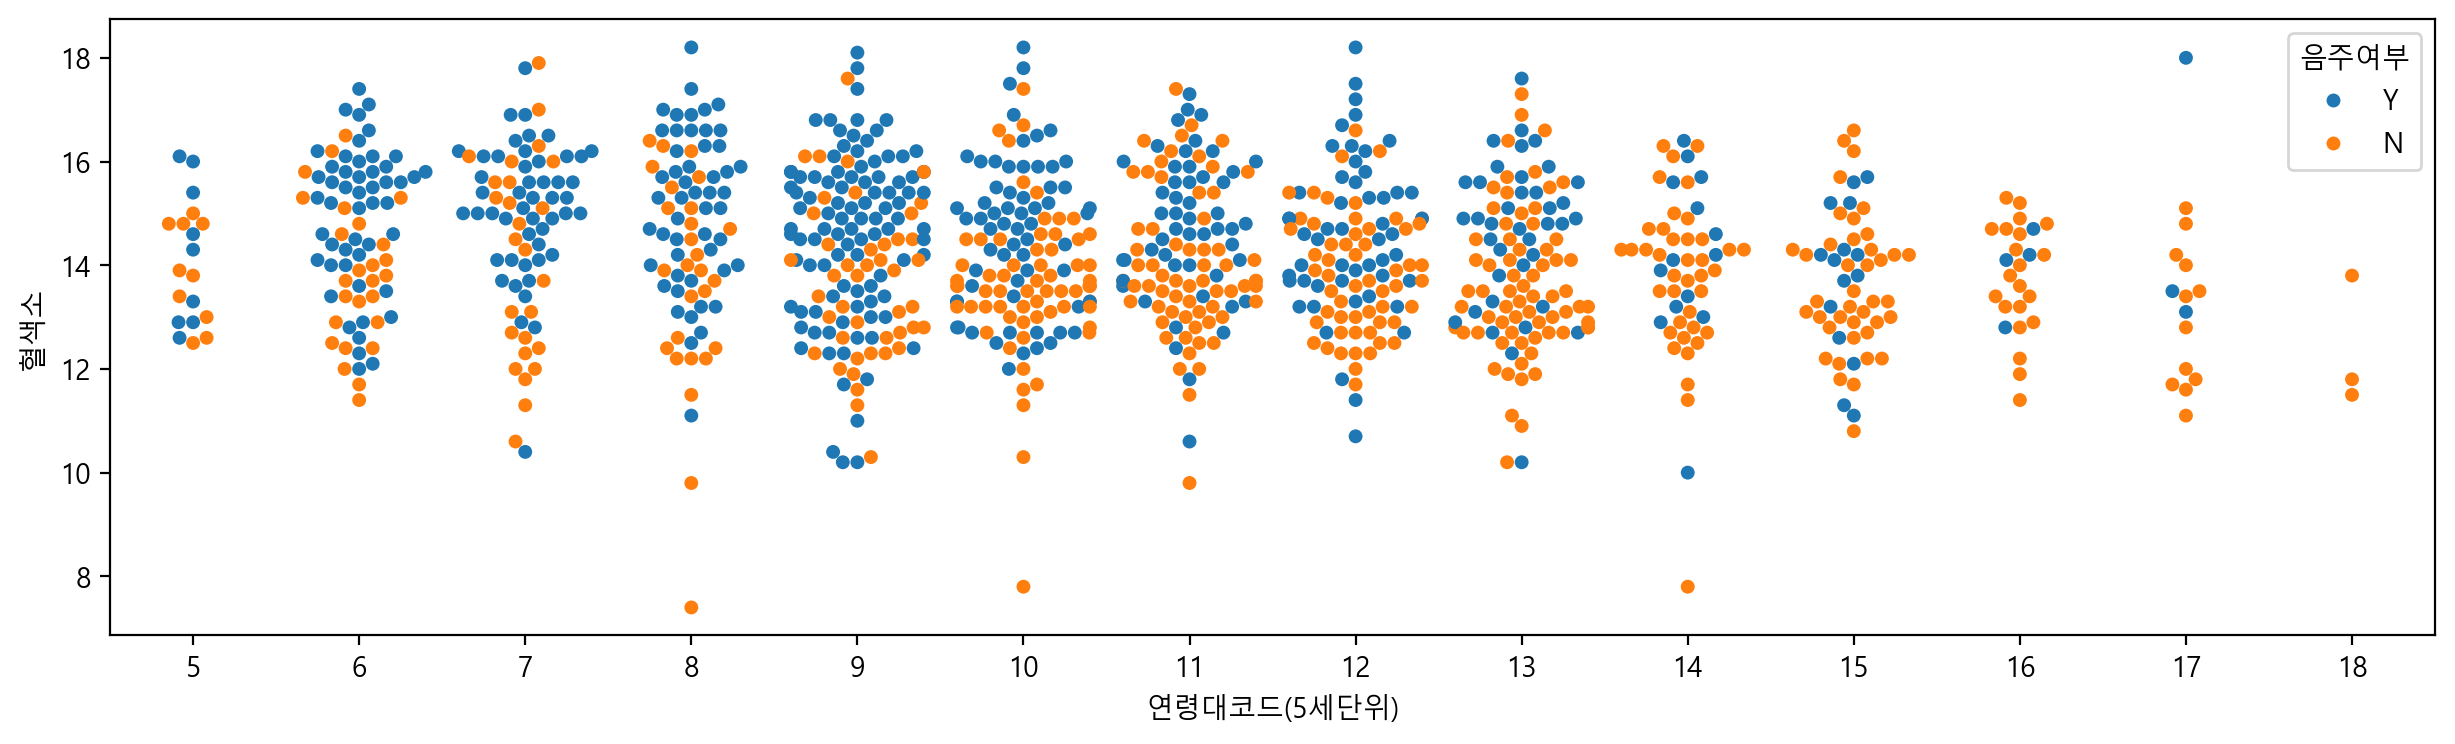

In [152]:
plt.figure(figsize=(15, 4))
sns.swarmplot(data=df_sample, x="연령대코드(5세단위)", y="혈색소", hue="음주여부")

<Figure size 1500x400 with 0 Axes>

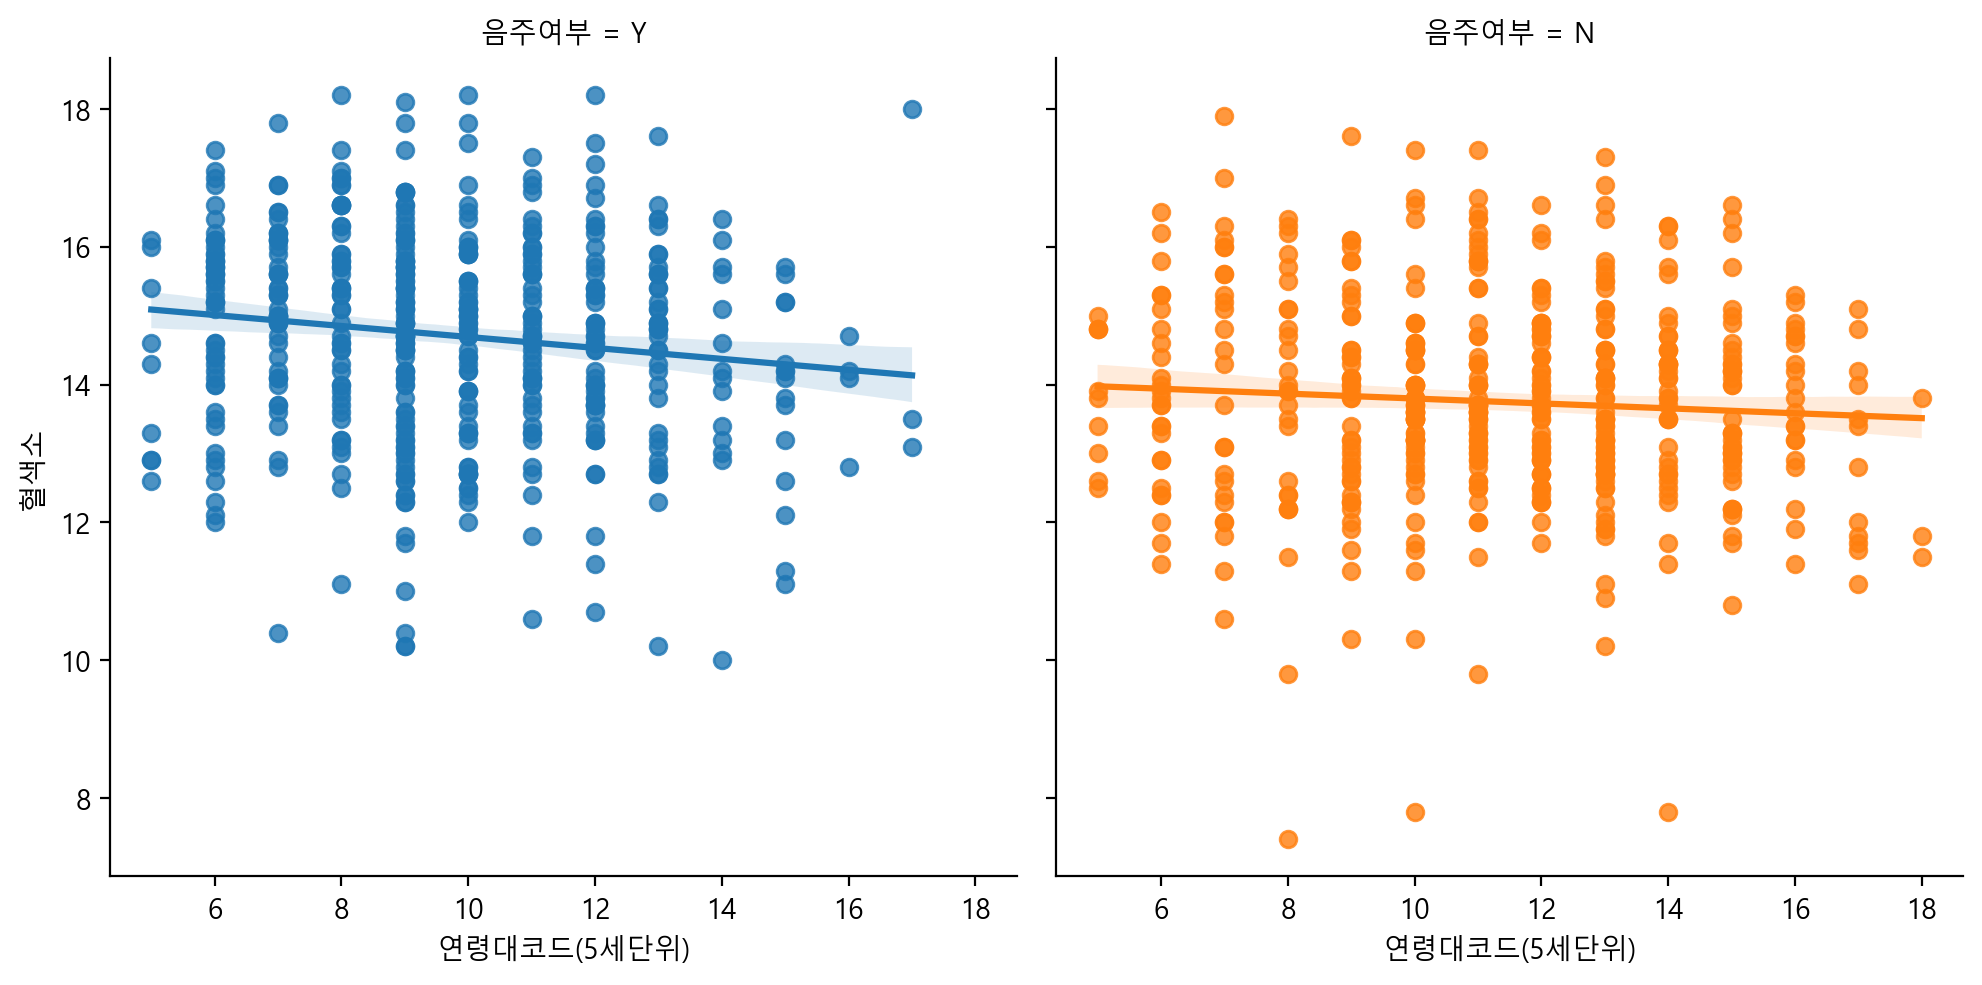

In [153]:
# lmplot으로 그리기
plt.figure(figsize=(15, 4))
sns.lmplot(data=df_sample,  x="연령대코드(5세단위)", y="혈색소", hue="음주여부", col="음주여부")

# 15. 수치형 데이터 시각화

## 15.1 scatterplot - 산점도
* 수치형 vs 수치형 데이터의 상관관계 분석 시 주로 사용
* 점의 크기를 데이터 수치에 따라 다르게 볼 수 있음

<Axes: xlabel='(혈청지오티)AST', ylabel='(혈청지오티)ALT'>

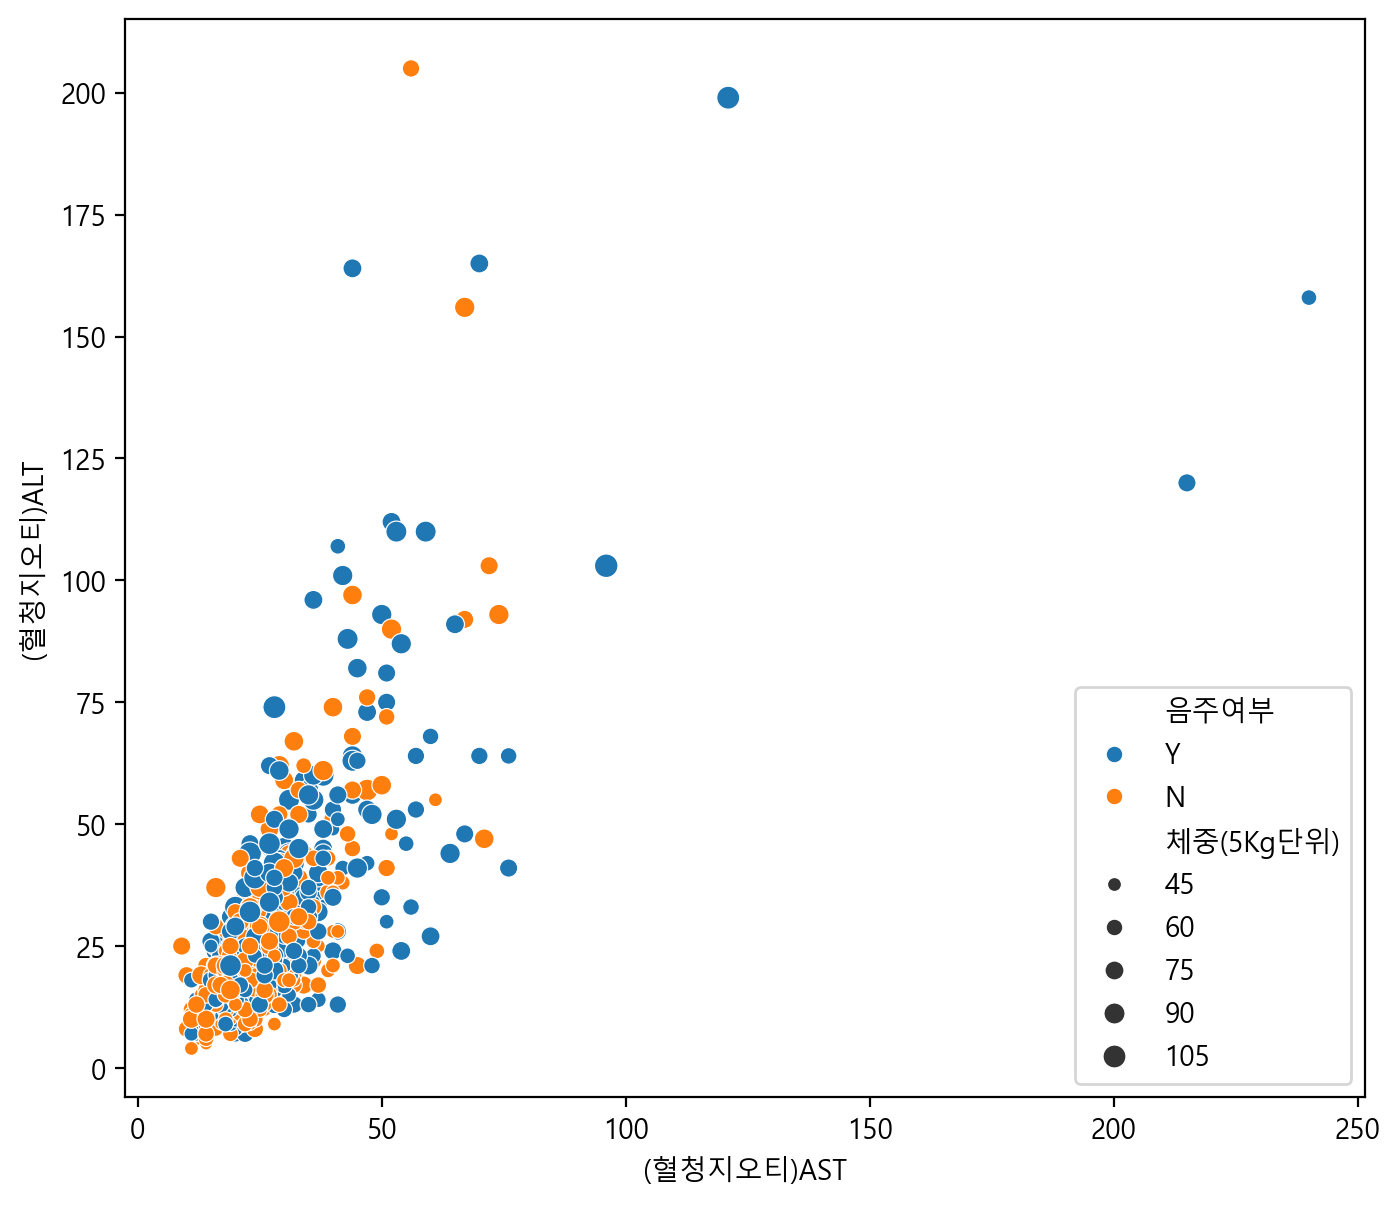

In [156]:
plt.figure(figsize=(8, 7))
sns.scatterplot(data=df_sample, x="(혈청지오티)AST", y="(혈청지오티)ALT", hue="음주여부", size="체중(5Kg단위)")

## 15.2 lmplot - 상관관계 보기

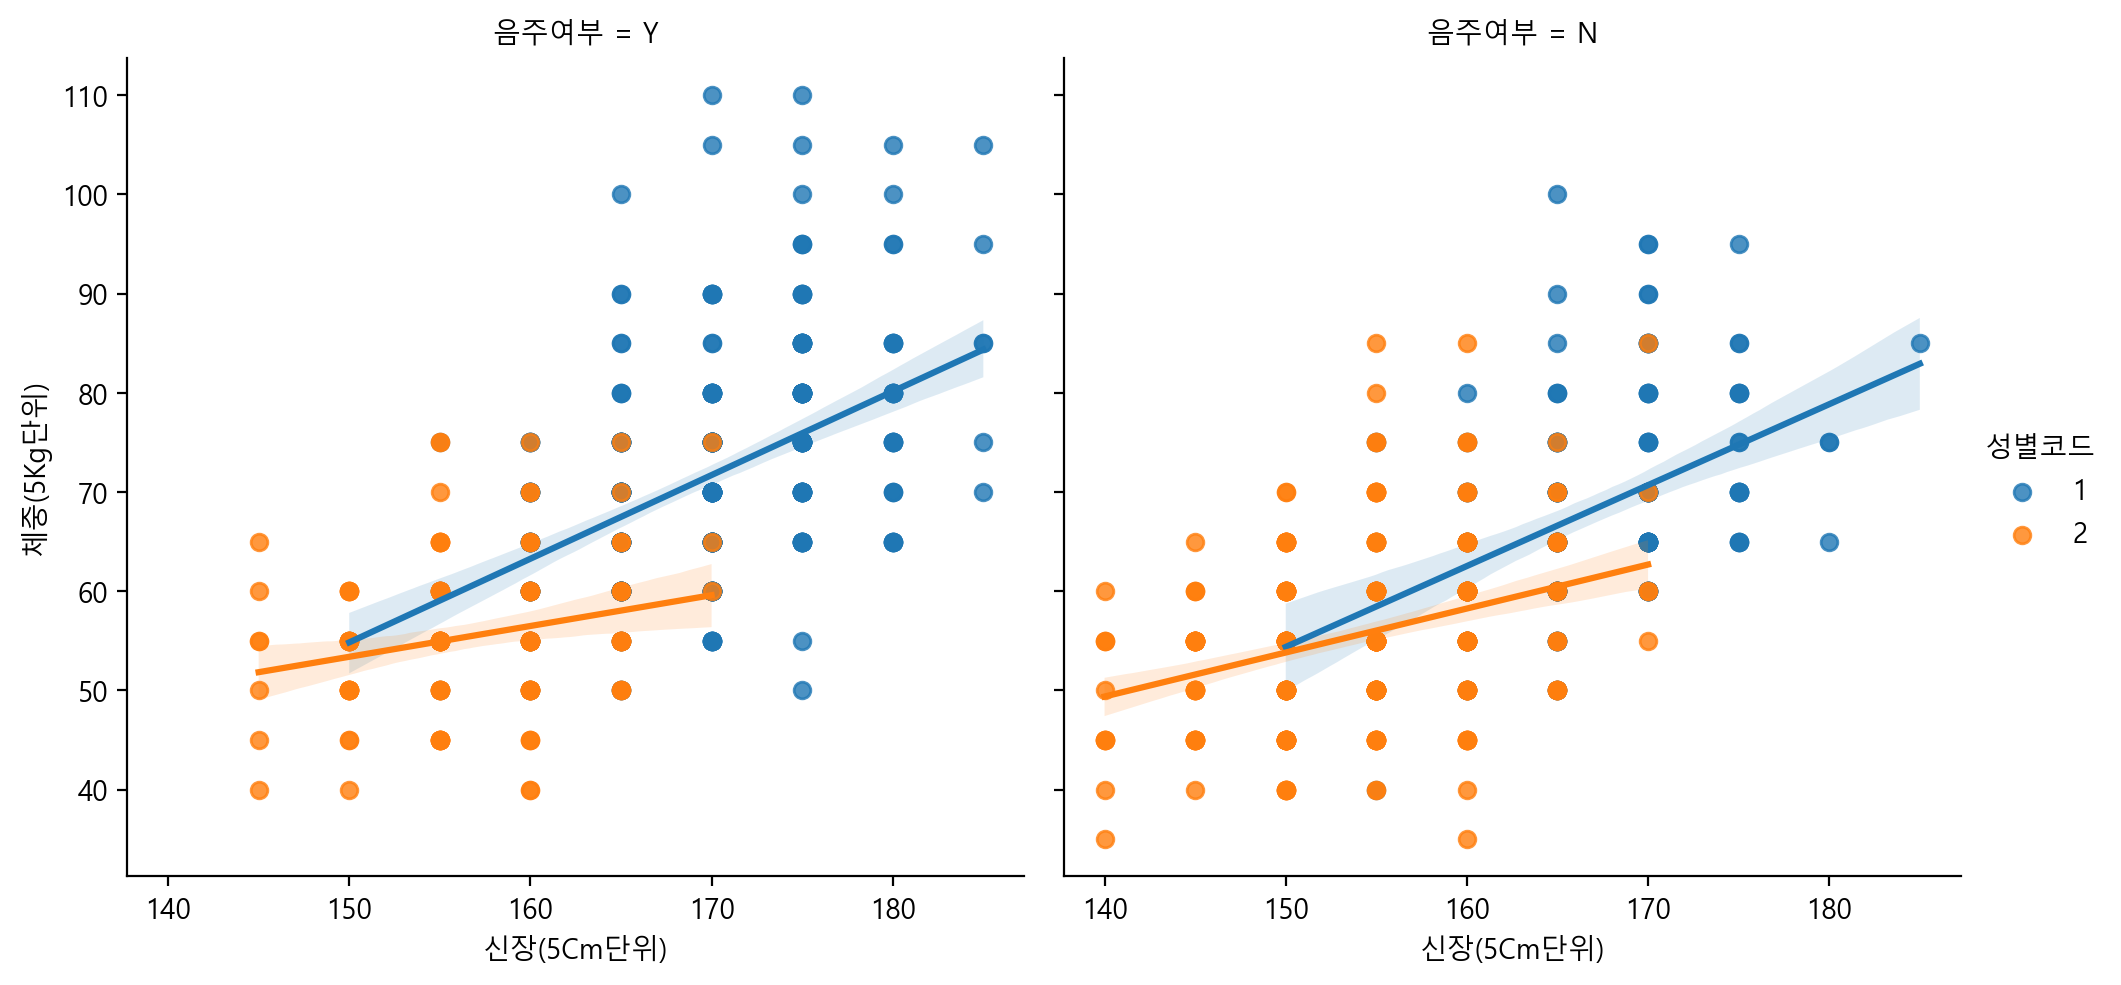

In [158]:
sns.lmplot(data=df_sample, x="신장(5Cm단위)", y="체중(5Kg단위)", hue="성별코드", col="음주여부")

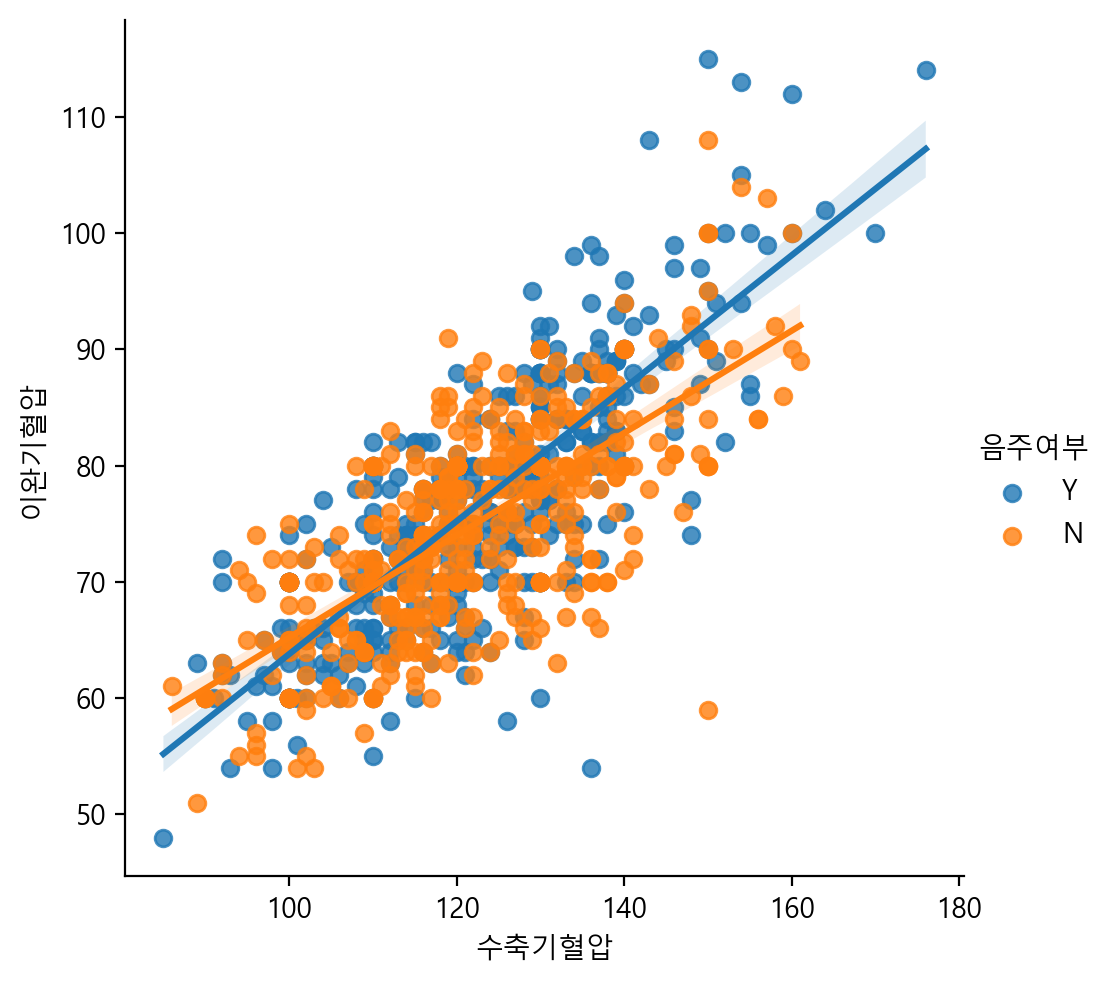

In [159]:
sns.lmplot(data=df_sample, x="수축기혈압", y="이완기혈압", hue="음주여부")

#### AST와 ALT
* 간세포에 들어있는 효소로, 간 손상으로 간세포가 파괴되면 안에 있던 AST와 ALT가 빠져나와 혈액 속에 돌아다니게 됨
* 간 손상 -> AST와 ALT 수치 높아짐
* 정상수치: AST (5 ~ 35), ALT (5 ~ 40) 단위(IU/L)

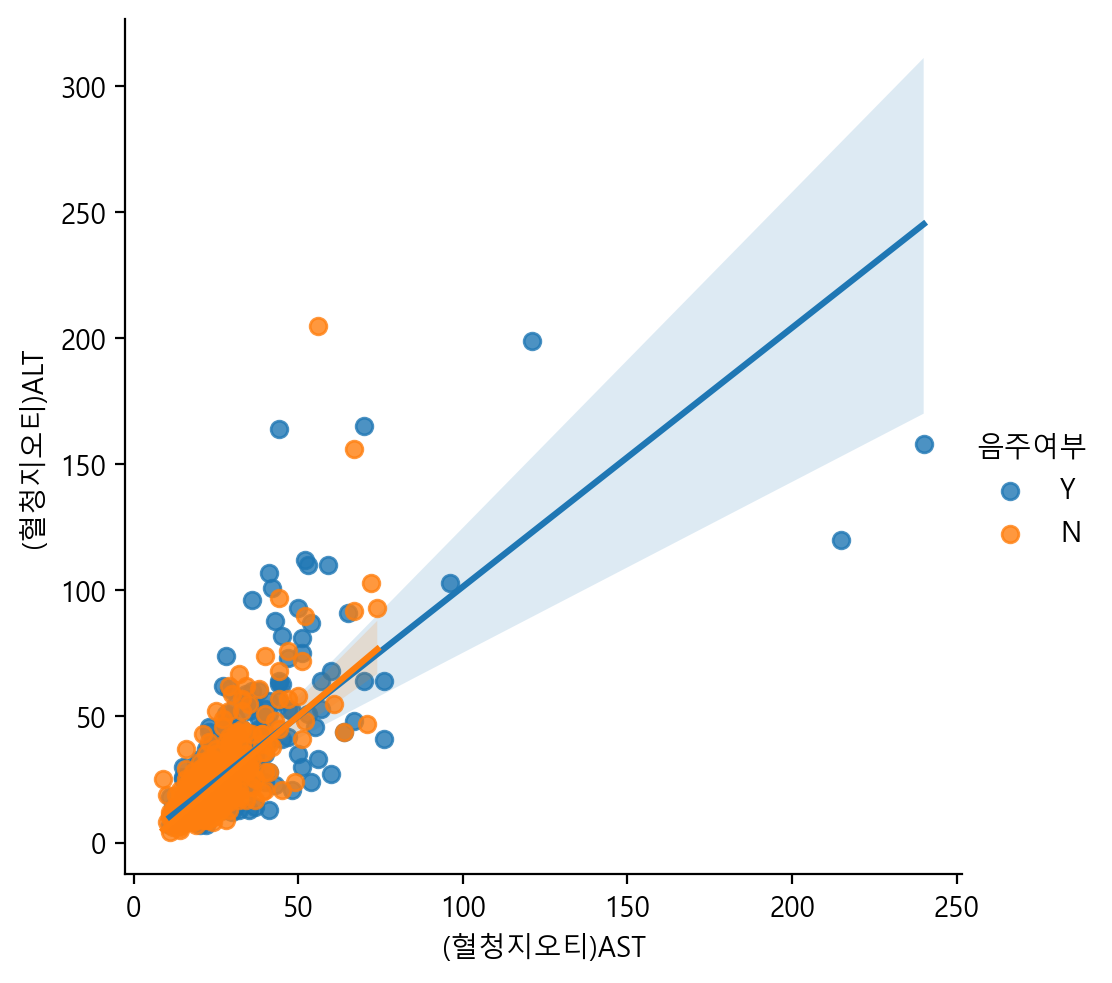

In [161]:
# robust=True: 이상치 간추리기
sns.lmplot(data=df_sample, x="(혈청지오티)AST", y="(혈청지오티)ALT", hue="음주여부", robust=True)

## 15.3 이상치 다루기
* 이상치가 있으면 데이터가 자세히 보이지 않거나, 회귀선이 달라짐
* 시각화를 통해 찾은 이상치를 제거하거나 이상치만 따로 모아 확인

In [163]:
# "(혈청지오티)AST"와 "(혈청지오티)ALT"가 400 이하인 값만 데이터프레임 형태로 추출하여 변수에 담음

df_ASLT = df_sample[(df_sample["(혈청지오티)AST"] < 400) & (df_sample["(혈청지오티)ALT"] < 400)]
df_ASLT

기준년도  가입자일련번호  성별코드  연령대코드(5세단위)  시도코드  신장(5Cm단위)  체중(5Kg단위)   허리둘레  \
276826  2017   276827     1           12    41        160         55   77.0   
849425  2017   849426     1            9    31        170         75   89.9   
504499  2017   504500     1            8    42        170         75   86.3   
601054  2017   601055     1           14    31        170         70   84.0   
980221  2017   980222     1           17    41        160         60   86.0   
...      ...      ...   ...          ...   ...        ...        ...    ...   
890013  2017   890014     2            8    41        155         80   98.0   
875389  2017   875390     1           11    41        170         60   81.0   
358458  2017   358459     1            9    11        170         90  101.0   
808228  2017   808229     1           11    28        160         65   85.0   
317698  2017   317699     1            9    41        165         85  100.0   

        시력(좌)  시력(우)  ...  감마지티피  흡연상태  음주여부  구강검진수검여부  치아우식증유무  결손치유무  \
276826    0.9    0.9  ...   38.0   3.0     Y         N      NaN    NaN   
849425    1.0    1.0  ...   28.0   3.0     Y         Y      NaN    NaN   
504499    1.5    1.5  ...  121.0   3.0     Y         Y      NaN    NaN   
601054    0.8    0.9  ...   31.0   3.0     N         N      NaN    NaN   
980221    0.7    0.5  ...   28.0   1.0     N         N      NaN    NaN   
...       ...    ...  ...    ...   ...   ...       ...      ...    ...   
890013    0.2    0.2  ...   39.0   1.0     N         Y      NaN    NaN   
875389    1.0    0.9  ...   59.0   3.0     Y         N      NaN    NaN   
358458    1.2    1.2  ...   41.0   2.0     Y         N      NaN    NaN   
808228    0.6    0.9  ...   37.0   2.0     N         N      NaN    NaN   
317698    1.2    1.0  ...   40.0   3.0     Y         N      NaN    NaN   

        치아마모증유무  제3대구치(사랑니)이상   치석     데이터공개일자  
276826      NaN           NaN  NaN  2018-11-26  
849425      NaN           NaN    Y  2018-11-26  
504499      NaN           NaN    Y  2018-11-26  
601054      NaN           NaN  NaN  2018-11-26  
980221      NaN           NaN  NaN  2018-11-26  
...         ...           ...  ...         ...  
890013      NaN           NaN    Y  2018-11-26  
875389      NaN           NaN  NaN  2018-11-26  
358458      NaN           NaN  NaN  2018-11-26  
808228      NaN           NaN  NaN  2018-11-26  
317698      NaN           NaN  NaN  2018-11-26  

[999 rows x 34 columns]

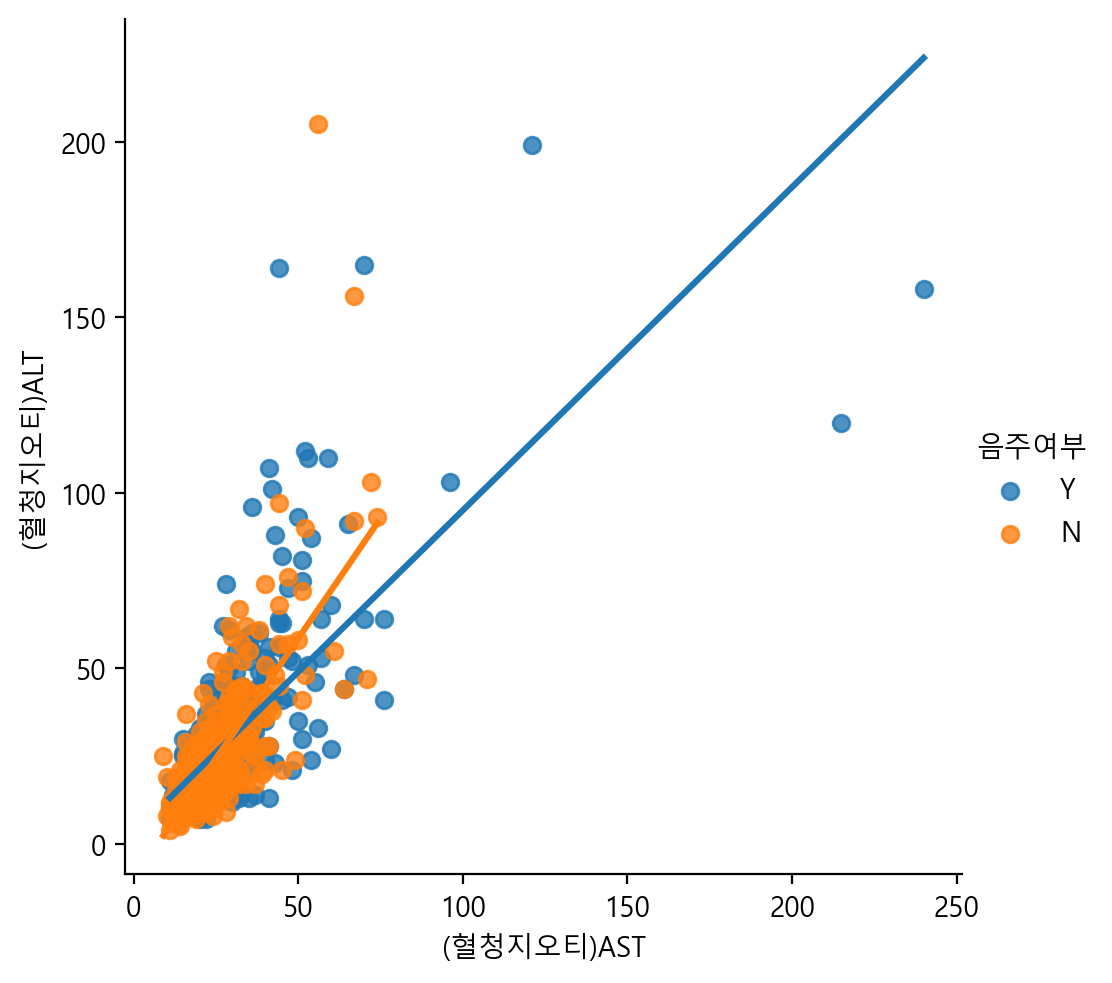

In [164]:
# ci=None: 신뢰구간 표현 x
sns.lmplot(data=df_ASLT, x="(혈청지오티)AST", y="(혈청지오티)ALT", hue="음주여부", ci=None)

In [165]:
df_ASLT_high = df[(df["(혈청지오티)AST"] > 400) | (df_sample["(혈청지오티)ALT"] > 400)]
df_ASLT_high

기준년도  가입자일련번호  성별코드  연령대코드(5세단위)  시도코드  신장(5Cm단위)  체중(5Kg단위)   허리둘레  \
4754    2017     4755     1            9    41        170         55   74.0   
26464   2017    26465     1            7    41        175         70   82.0   
28542   2017    28543     1           10    46        170         55   77.3   
33980   2017    33981     1           17    41        160         55   74.0   
38794   2017    38795     1           16    26        160         55   85.0   
...      ...      ...   ...          ...   ...        ...        ...    ...   
981676  2017   981677     1            6    42        180         70   84.0   
982305  2017   982306     2           16    28        155         50   79.3   
990867  2017   990868     2           11    41        145         45   75.0   
991226  2017   991227     1            6    42        170         80   81.0   
995323  2017   995324     1            7    11        185        105  101.4   

        시력(좌)  시력(우)  ...  감마지티피  흡연상태  음주여부  구강검진수검여부  치아우식증유무  결손치유무  \
4754      1.0    0.7  ...  125.0   3.0     Y         N      NaN    NaN   
26464     1.2    1.2  ...  169.0   1.0     N         Y      NaN    NaN   
28542     1.2    1.2  ...  233.0   3.0     Y         Y      NaN    NaN   
33980     0.9    0.5  ...   10.0   1.0     N         N      NaN    NaN   
38794     0.3    0.5  ...  334.0   2.0     Y         N      NaN    NaN   
...       ...    ...  ...    ...   ...   ...       ...      ...    ...   
981676    1.2    0.9  ...   45.0   3.0     Y         N      NaN    NaN   
982305    0.4    0.7  ...   71.0   1.0     N         N      NaN    NaN   
990867    0.9    1.2  ...  279.0   1.0     N         N      NaN    NaN   
991226    0.7    0.8  ...   49.0   3.0     Y         N      NaN    NaN   
995323    0.7    0.7  ...  174.0   3.0     Y         N      NaN    NaN   

        치아마모증유무  제3대구치(사랑니)이상   치석     데이터공개일자  
4754        NaN           NaN  NaN  2018-11-26  
26464       NaN           NaN    Y  2018-11-26  
28542       NaN           NaN    Y  2018-11-26  
33980       NaN           NaN  NaN  2018-11-26  
38794       NaN           NaN  NaN  2018-11-26  
...         ...           ...  ...         ...  
981676      NaN           NaN  NaN  2018-11-26  
982305      NaN           NaN  NaN  2018-11-26  
990867      NaN           NaN  NaN  2018-11-26  
991226      NaN           NaN  NaN  2018-11-26  
995323      NaN           NaN  NaN  2018-11-26  

[222 rows x 34 columns]

<Figure size 800x700 with 0 Axes>

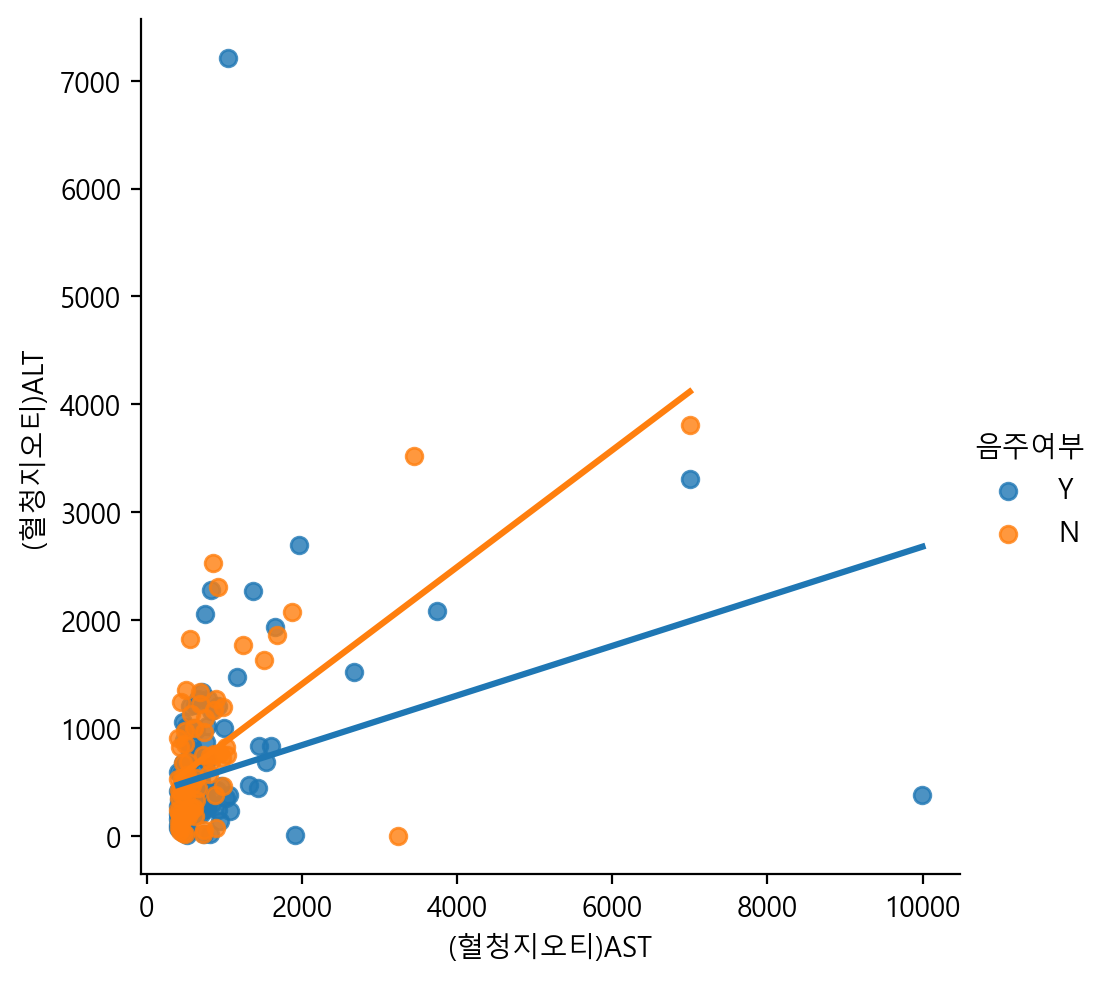

In [166]:
plt.figure(figsize=(8, 7))
sns.lmplot(data=df_ASLT_high, x="(혈청지오티)AST", y="(혈청지오티)ALT", hue="음주여부", ci=None)

In [167]:
df_ASLT_high_8000 = df_ASLT_high[df_ASLT_high["(혈청지오티)AST"] > 8000]
df_ASLT_high_8000.iloc[:, 10:27]

청력(좌)  청력(우)  수축기혈압  이완기혈압  식전혈당(공복혈당)  총콜레스테롤  트리글리세라이드  HDL콜레스테롤  \
541757    1.0    1.0   96.0   74.0        93.0   161.0      67.0      78.0   

        LDL콜레스테롤   혈색소  요단백  혈청크레아티닌  (혈청지오티)AST  (혈청지오티)ALT  감마지티피  흡연상태 음주여부  
541757      69.0  15.4  1.0      1.2      9999.0       380.0  419.0   3.0    Y

## 15.4 distplot 

In [169]:
# 수치형 데이터 컬럼을 찾기위해 컬럼 알아보기
df.columns

Index(['기준년도', '가입자일련번호', '성별코드', '연령대코드(5세단위)', '시도코드', '신장(5Cm단위)',
       '체중(5Kg단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압',
       '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태',
       '음주여부', '구강검진수검여부', '치아우식증유무', '결손치유무', '치아마모증유무', '제3대구치(사랑니)이상', '치석',
       '데이터공개일자'],
      dtype='object')

In [170]:
# "총콜레스테롤"에 따른 distplot 그리기
df_chol = df.loc[df["총콜레스테롤"].notnull(), "총콜레스테롤"]
df_chol.head()

0    193.0
1    228.0
2    136.0
3    201.0
4    199.0
Name: 총콜레스테롤, dtype: float64

In [171]:
df_chol.describe()

count    999957.000000
mean        195.548251
std          38.718205
min          30.000000
25%         169.000000
50%         193.000000
75%         219.000000
max        2344.000000
Name: 총콜레스테롤, dtype: float64

C:\Users\wongahee\AppData\Local\Temp\ipykernel_227156\3132649022.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_chol, bins=10)


<Axes: xlabel='총콜레스테롤', ylabel='Density'>

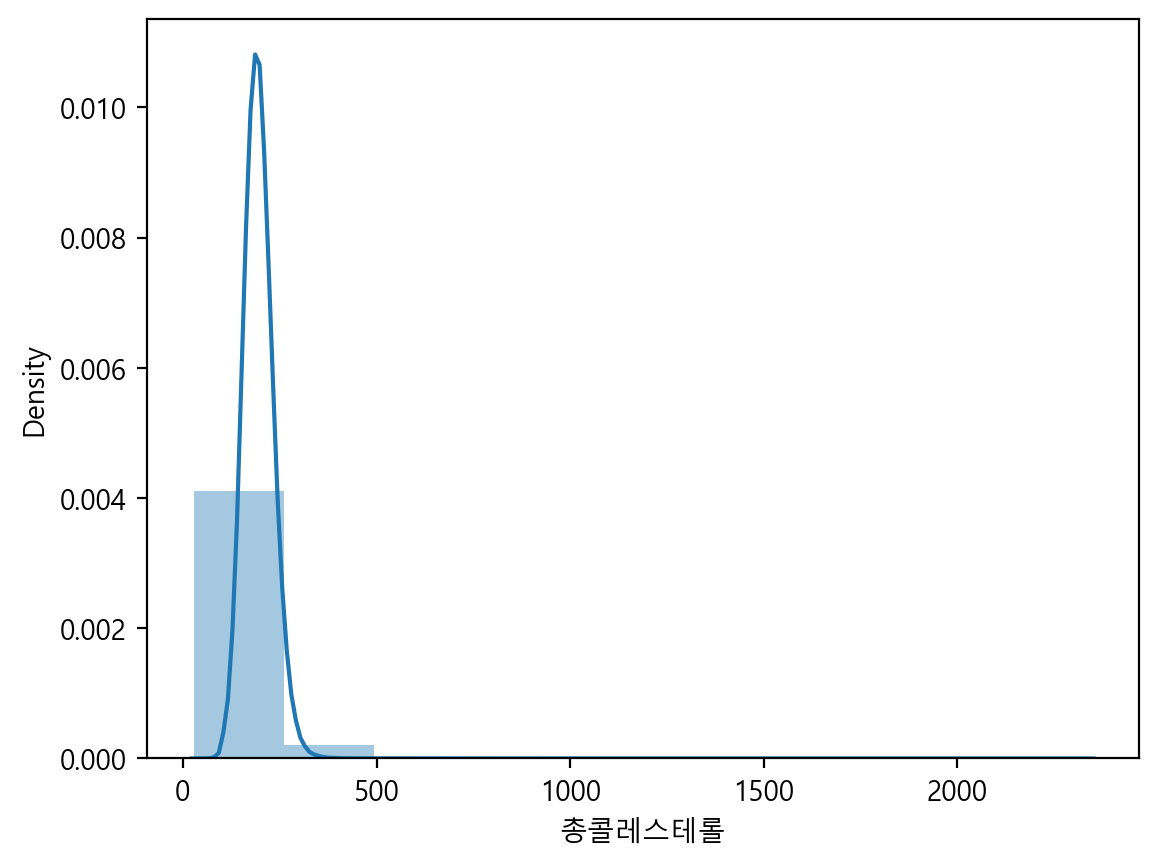

In [172]:
# bin: 막대기 수
sns.distplot(df_chol, bins=10)

C:\Users\wongahee\AppData\Local\Temp\ipykernel_227156\483799845.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.loc[df["총콜레스테롤"].notnull() & (df["음주여부"] == "Y"), "총콜레스테롤"])


<Axes: xlabel='총콜레스테롤', ylabel='Density'>

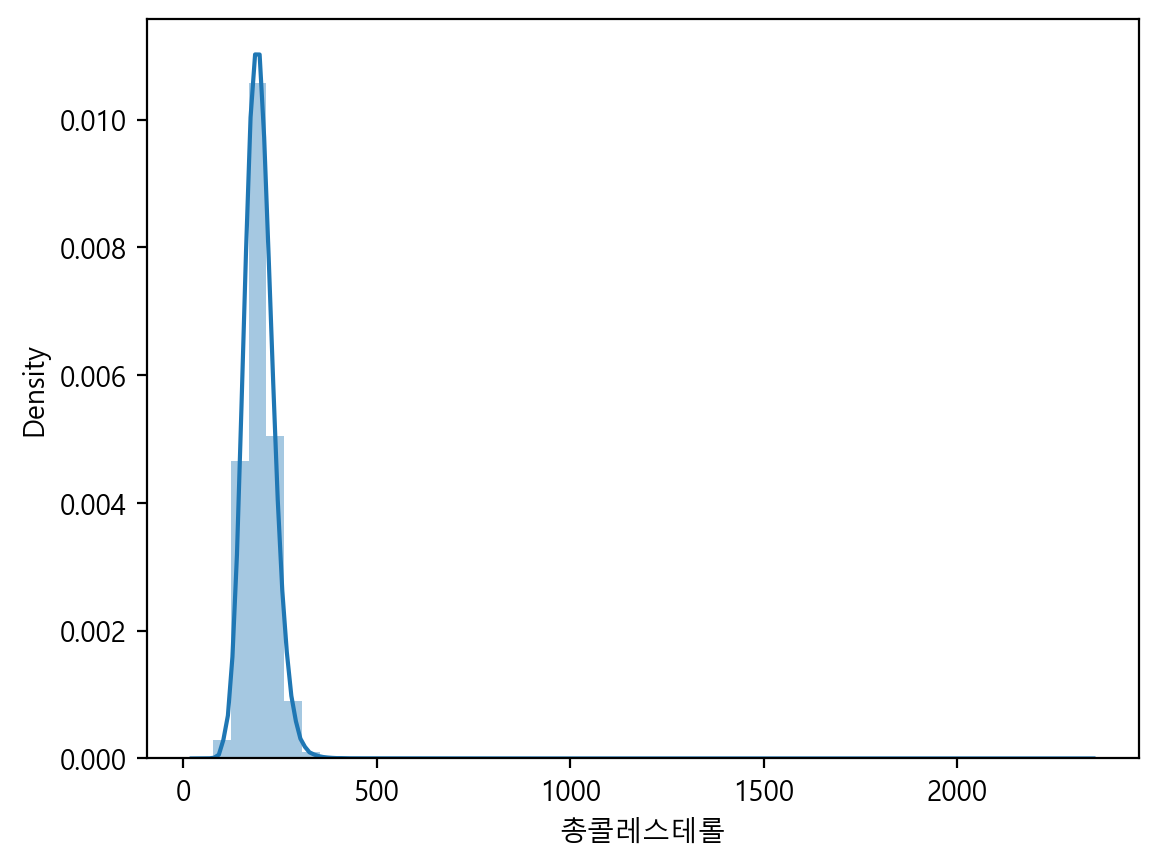

In [173]:
# "음주여부"가 Y/1인 값의 "총콜레스테롤"
sns.distplot(df.loc[df["총콜레스테롤"].notnull() & (df["음주여부"] == "Y"), "총콜레스테롤"])

C:\Users\wongahee\AppData\Local\Temp\ipykernel_227156\1790217581.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.loc[df["총콜레스테롤"].notnull() & (df["음주여부"] == "N"), "총콜레스테롤"])


<Axes: xlabel='총콜레스테롤', ylabel='Density'>

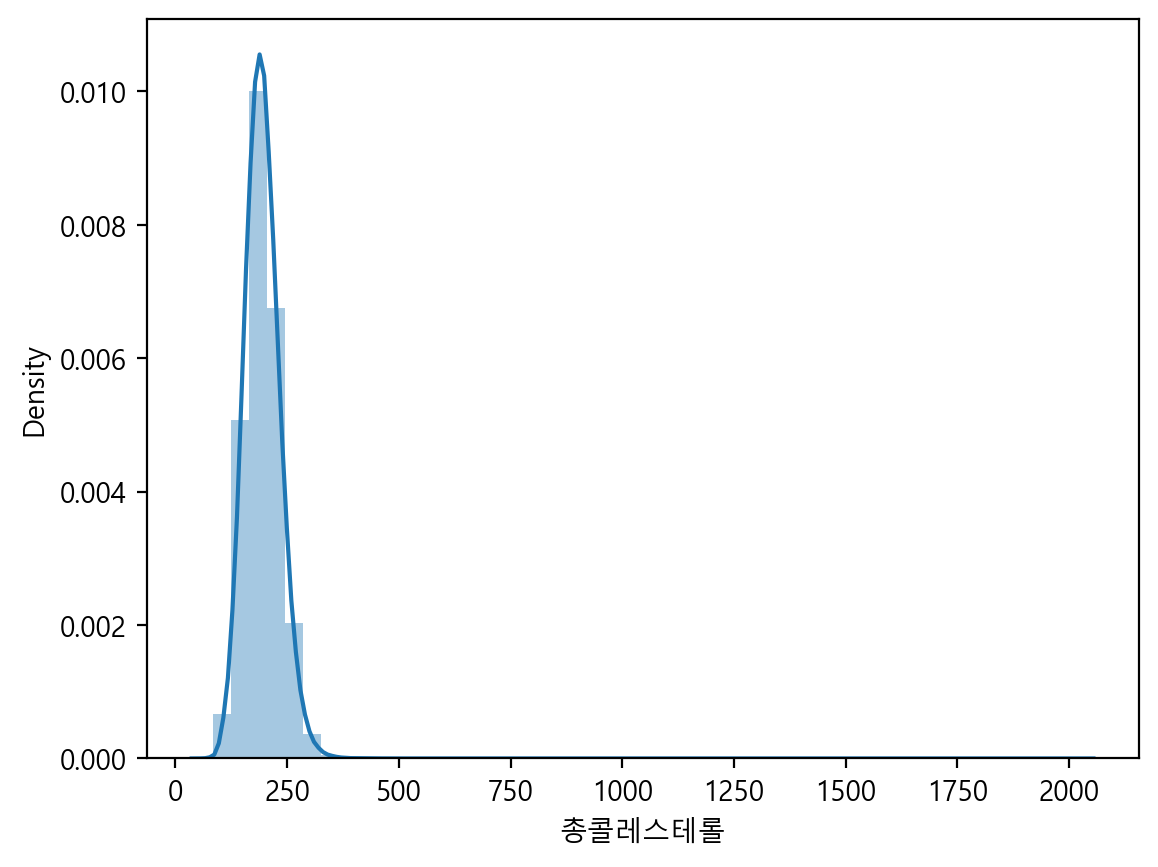

In [174]:
# "음주여부"가 N/1인 값의 "총콜레스테롤"
sns.distplot(df.loc[df["총콜레스테롤"].notnull() & (df["음주여부"] == "N"), "총콜레스테롤"])

<Axes: xlabel='총콜레스테롤', ylabel='Density'>

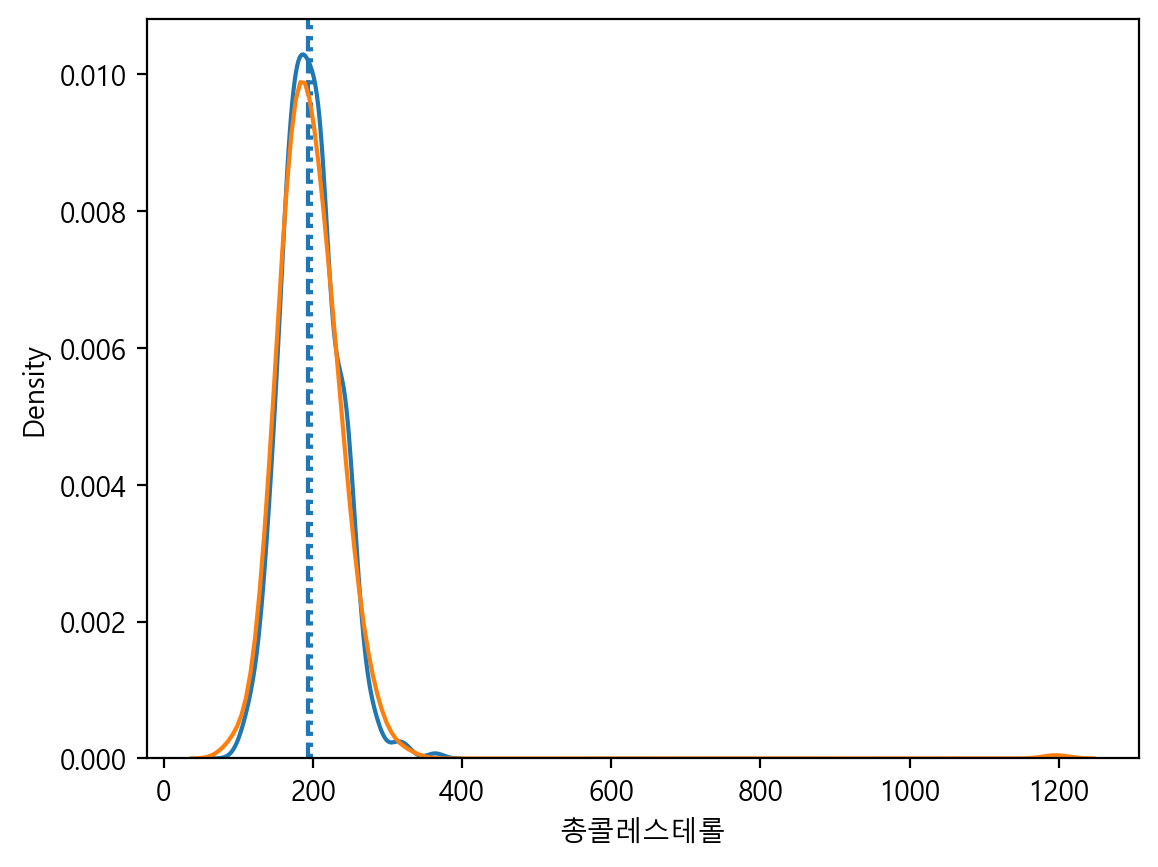

In [175]:
# kdeplot을 사용하여 위 두 그래프를 같이 표현
# axvline: 구할 값 선으로 표현. (linestyle: 선 모양)
# label 추가, df -> df_sample로 변경

plt.axvline(df_sample["총콜레스테롤"].mean(), linestyle=":")
plt.axvline(df_sample["총콜레스테롤"].median(), linestyle="--")
sns.kdeplot(df_sample.loc[df_sample["총콜레스테롤"].notnull() & (df["음주여부"] == "Y"), "총콜레스테롤"], label="음주중")
sns.kdeplot(df_sample.loc[df_sample["총콜레스테롤"].notnull() & (df["음주여부"] == "N"), "총콜레스테롤"], label="음주 안함")

<Axes: xlabel='감마지티피', ylabel='Density'>

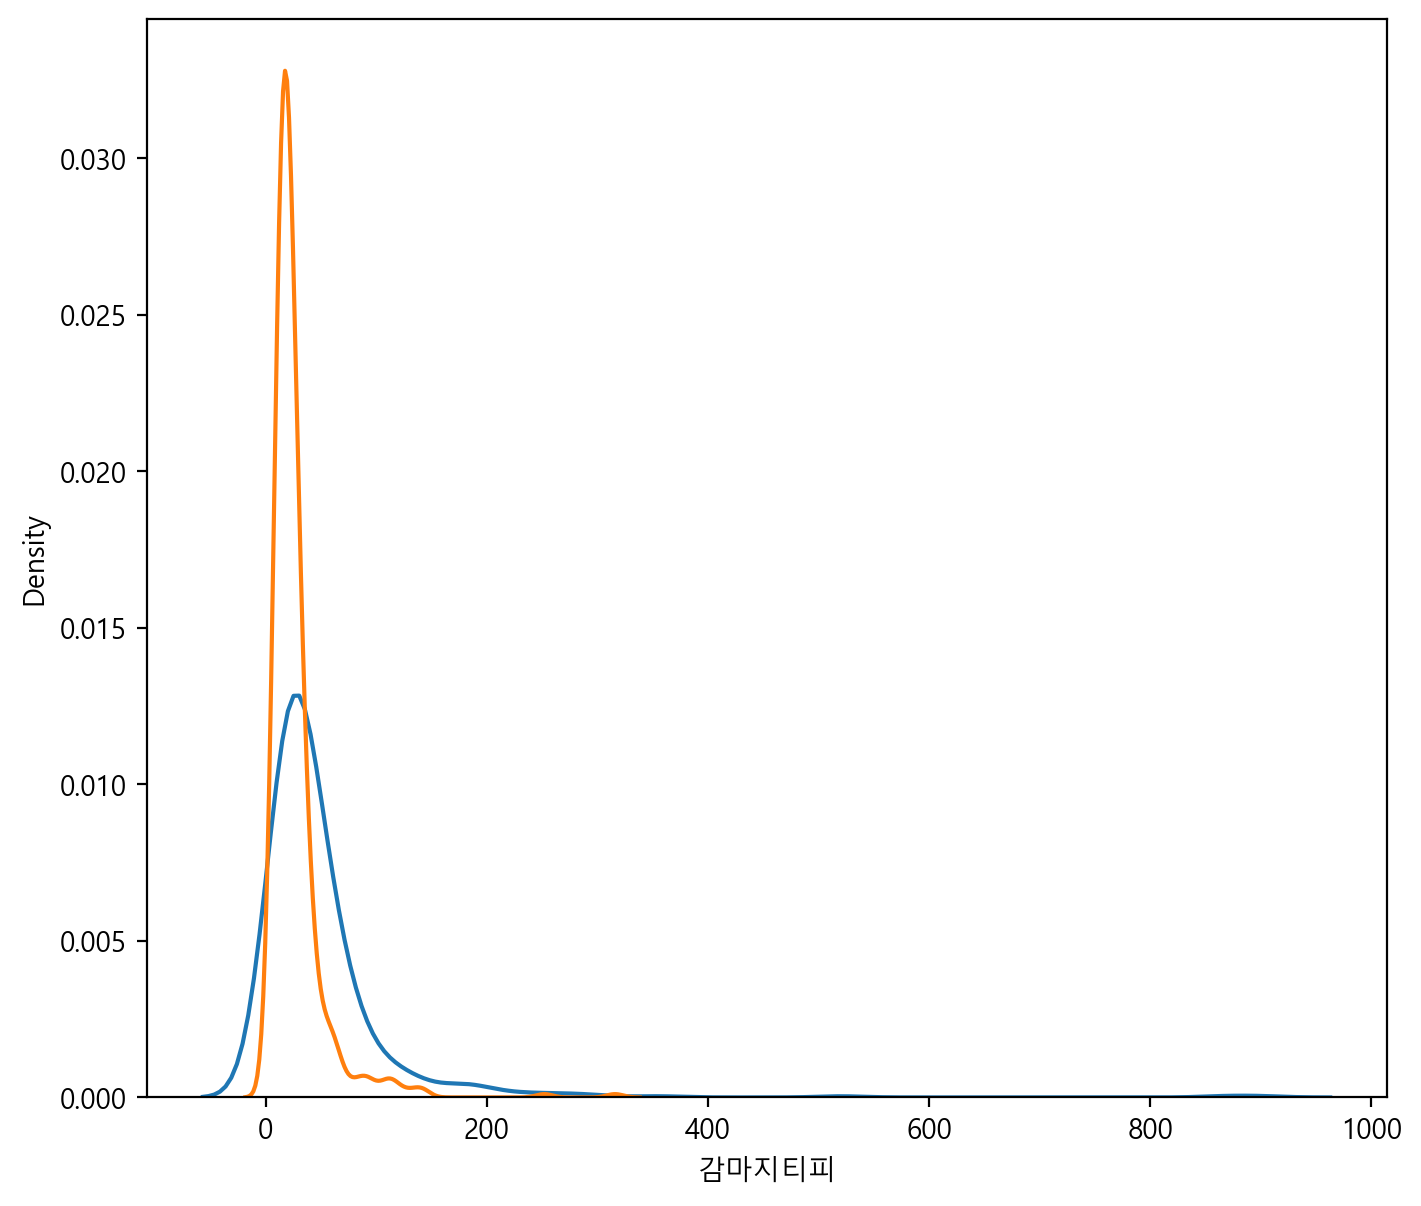

In [176]:
s_1 = df_sample.loc[df_sample["음주여부"] == "Y", "감마지티피"]
s_0 = df_sample.loc[df_sample["음주여부"] == "N", "감마지티피"]

plt.figure(figsize=(8,7))
sns.kdeplot(s_1, label="음주중")
sns.kdeplot(s_0, label="음주 안 함")

# 16. 상관분석
* 두 변수 간에 어떤 `선형적` 또는 `비선형적` 관계를 갖고 있는 지를 분석하는 방법이다.
* 두 변수 간의 관계의 강도를 나타냄
* r 범위에 따른 관계
     <br>-1.0 ~ -0.7 사이 : 강한 음적 선형관계
     <br>-0.7 ~ -0.3 사이 : 뚜렷한 음적 선형관계
     <br>-0.3 ~ -0.1 사이 : 약한 음적 선형관계
     <br>-0.1 ~ +0.1 사이 : 무시될 수 있는 선형관계
     <br>+0.1 ~ +0.3 사이 : 약한 양적 선형관계
     <br>+0.3 ~ +0.7 사이 : 뚜렷한 양적 선형관계
     <br>+0.7 ~ +1.0 사이 : 강한 양적 선형관계  

In [178]:
df.columns

Index(['기준년도', '가입자일련번호', '성별코드', '연령대코드(5세단위)', '시도코드', '신장(5Cm단위)',
       '체중(5Kg단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압',
       '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태',
       '음주여부', '구강검진수검여부', '치아우식증유무', '결손치유무', '치아마모증유무', '제3대구치(사랑니)이상', '치석',
       '데이터공개일자'],
      dtype='object')

In [179]:
# 상관계수에 사용할 컬럼 담기
columns = ['연령대코드(5세단위)', '체중(5Kg단위)', '신장(5Cm단위)', '허리둘레',
           '시력(좌)', '시력(우)', '청력(좌)', '청력(우)',
           '수축기혈압', '이완기혈압', '식전혈당(공복혈당)',
           '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤', '혈색소', '요단백',
           '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태', '음주여부']
columns

['연령대코드(5세단위)',
 '체중(5Kg단위)',
 '신장(5Cm단위)',
 '허리둘레',
 '시력(좌)',
 '시력(우)',
 '청력(좌)',
 '청력(우)',
 '수축기혈압',
 '이완기혈압',
 '식전혈당(공복혈당)',
 '총콜레스테롤',
 '트리글리세라이드',
 'HDL콜레스테롤',
 'LDL콜레스테롤',
 '혈색소',
 '요단백',
 '혈청크레아티닌',
 '(혈청지오티)AST',
 '(혈청지오티)ALT',
 '감마지티피',
 '흡연상태',
 '음주여부']

## 16.1 상관계수 구하기

In [181]:
# df에 "음주여부" 컬럼은 "Y/N"인 object 형태로 되어있어서 숫자값으로 형변환이 필요함
df_sample.loc[df_sample["음주여부"]=="Y","음주여부"] = 1
df_sample.loc[df_sample["음주여부"]=="N","음주여부"] = 0

df_sample["음주여부"] = df_sample["음주여부"].astype("int")
df_sample["음주여부"]

276826    1
849425    1
504499    1
601054    0
980221    0
         ..
890013    0
875389    1
358458    1
808228    0
317698    1
Name: 음주여부, Length: 1000, dtype: int32

In [182]:
# 샘플 데이터의 설정 컬럼만 가져와서 상관계수 구하기
# 자기 자신의 상관계수는 1

df_small = df_sample[columns]
df_corr = df_small.corr()
df_corr 

연령대코드(5세단위)  체중(5Kg단위)  신장(5Cm단위)      허리둘레     시력(좌)     시력(우)  \
연령대코드(5세단위)     1.000000  -0.200336  -0.380239  0.159797 -0.217613 -0.308829   
체중(5Kg단위)      -0.200336   1.000000   0.665067  0.785950  0.122194  0.168929   
신장(5Cm단위)      -0.380239   0.665067   1.000000  0.312230  0.202426  0.236260   
허리둘레            0.159797   0.785950   0.312230  1.000000  0.017355  0.030809   
시력(좌)          -0.217613   0.122194   0.202426  0.017355  1.000000  0.346265   
시력(우)          -0.308829   0.168929   0.236260  0.030809  0.346265  1.000000   
청력(좌)           0.233960  -0.043727  -0.064044  0.050644 -0.039499 -0.072118   
청력(우)           0.264549  -0.047717  -0.074738  0.073086 -0.081000 -0.102880   
수축기혈압           0.222408   0.288983   0.063929  0.349219 -0.012888 -0.036395   
이완기혈압           0.091006   0.324783   0.157810  0.329256  0.027854  0.001282   
식전혈당(공복혈당)      0.215097   0.164926   0.005997  0.235417 -0.041152 -0.043653   
총콜레스테롤         -0.008847   0.050713  -0.004133  0.036389 -0.052320  0.016831   
트리글리세라이드        0.037474   0.260689   0.135087  0.267643  0.032493  0.070753   
HDL콜레스테롤       -0.095972  -0.330577  -0.207537 -0.311478 -0.045579 -0.068572   
LDL콜레스테롤        0.008560   0.043839   0.008146  0.017287 -0.052768  0.003336   
혈색소            -0.178977   0.540191   0.541155  0.377673  0.142582  0.190303   
요단백             0.058702   0.012154  -0.007699  0.045948 -0.024741 -0.024977   
혈청크레아티닌         0.044958   0.170468   0.212811  0.131421  0.022175  0.080797   
(혈청지오티)AST      0.129357   0.193976   0.055783  0.253549  0.011212  0.003236   
(혈청지오티)ALT     -0.009871   0.401756   0.159199  0.407063  0.080793  0.123455   
감마지티피          -0.015357   0.246924   0.185091  0.234831  0.111903  0.035304   
흡연상태           -0.121132   0.392874   0.512294  0.246296  0.141441  0.089486   
음주여부           -0.275285   0.290207   0.410946  0.134891  0.081130  0.158678   

                청력(좌)     청력(우)     수축기혈압     이완기혈압  ...  HDL콜레스테롤  LDL콜레스테롤  \
연령대코드(5세단위)  0.233960  0.264549  0.222408  0.091006  ... -0.095972  0.008560   
체중(5Kg단위)   -0.043727 -0.047717  0.288983  0.324783  ... -0.330577  0.043839   
신장(5Cm단위)   -0.064044 -0.074738  0.063929  0.157810  ... -0.207537  0.008146   
허리둘레         0.050644  0.073086  0.349219  0.329256  ... -0.311478  0.017287   
시력(좌)       -0.039499 -0.081000 -0.012888  0.027854  ... -0.045579 -0.052768   
시력(우)       -0.072118 -0.102880 -0.036395  0.001282  ... -0.068572  0.003336   
청력(좌)        1.000000  0.565295  0.039115 -0.015526  ... -0.047898  0.006018   
청력(우)        0.565295  1.000000  0.056661 -0.005658  ... -0.069527 -0.032362   
수축기혈압        0.039115  0.056661  1.000000  0.751731  ... -0.093036 -0.007070   
이완기혈압       -0.015526 -0.005658  0.751731  1.000000  ... -0.091701  0.038887   
식전혈당(공복혈당)   0.012104  0.069277  0.218697  0.160601  ... -0.132477  0.043905   
총콜레스테롤       0.008247 -0.047907  0.039290  0.084102  ...  0.025190  0.861641   
트리글리세라이드     0.018695  0.034650  0.233447  0.225436  ... -0.312560  0.064503   
HDL콜레스테롤    -0.047898 -0.069527 -0.093036 -0.091701  ...  1.000000 -0.162307   
LDL콜레스테롤     0.006018 -0.032362 -0.007070  0.038887  ... -0.162307  1.000000   
혈색소         -0.000433 -0.050208  0.169241  0.255690  ... -0.252492  0.068631   
요단백          0.041231  0.081749  0.043110  0.035826  ... -0.058606  0.092367   
혈청크레아티닌      0.016792  0.017758  0.034018  0.081965  ... -0.141626 -0.013668   
(혈청지오티)AST   0.020671 -0.004681  0.133472  0.131482  ... -0.060252 -0.011918   
(혈청지오티)ALT   0.044048 -0.019893  0.163762  0.191155  ... -0.169802  0.022981   
감마지티피       -0.025004 -0.024936  0.191333  0.200150  ... -0.067822  0.007599   
흡연상태         0.007413 -0.042159  0.094145  0.144974  ... -0.213555  0.025842   
음주여부        -0.053293 -0.072404  0.042372  0.108679  ... -0.016938 -0.023031   

                  혈색소       요단백   혈청크레아티닌  (혈청지오티)AST  (혈청지오티)ALT     감마지티피  \
연령대코드(5세단위) -0.178977  0.058702  0.044958    0.129357   -0.009871 -0.015357   
체중(5Kg단위)    

In [183]:
# 특정 컬럼값의 상관계수 확인하기
# 키에 대한 상관계수 정렬하여 출력
df_corr["신장(5Cm단위)"].sort_values()

연령대코드(5세단위)   -0.380239
HDL콜레스테롤      -0.207537
청력(우)         -0.074738
청력(좌)         -0.064044
요단백           -0.007699
총콜레스테롤        -0.004133
식전혈당(공복혈당)     0.005997
LDL콜레스테롤       0.008146
(혈청지오티)AST     0.055783
수축기혈압          0.063929
트리글리세라이드       0.135087
이완기혈압          0.157810
(혈청지오티)ALT     0.159199
감마지티피          0.185091
시력(좌)          0.202426
혈청크레아티닌        0.212811
시력(우)          0.236260
허리둘레           0.312230
음주여부           0.410946
흡연상태           0.512294
혈색소            0.541155
체중(5Kg단위)      0.665067
신장(5Cm단위)      1.000000
Name: 신장(5Cm단위), dtype: float64

In [184]:
# 상관계수 수치에 따라 데이터 출력하기
df_corr.loc[df_corr["신장(5Cm단위)"] > 0.1, "신장(5Cm단위)"]

체중(5Kg단위)     0.665067
신장(5Cm단위)     1.000000
허리둘레          0.312230
시력(좌)         0.202426
시력(우)         0.236260
이완기혈압         0.157810
트리글리세라이드      0.135087
혈색소           0.541155
혈청크레아티닌       0.212811
(혈청지오티)ALT    0.159199
감마지티피         0.185091
흡연상태          0.512294
음주여부          0.410946
Name: 신장(5Cm단위), dtype: float64

In [185]:
df_corr["음주여부"].sort_values()

연령대코드(5세단위)   -0.275285
청력(우)         -0.072404
청력(좌)         -0.053293
LDL콜레스테롤      -0.023031
요단백           -0.018333
HDL콜레스테롤      -0.016938
총콜레스테롤         0.002317
식전혈당(공복혈당)     0.022550
수축기혈압          0.042372
혈청크레아티닌        0.069982
시력(좌)          0.081130
이완기혈압          0.108679
(혈청지오티)AST     0.125927
트리글리세라이드       0.134188
허리둘레           0.134891
(혈청지오티)ALT     0.138756
시력(우)          0.158678
감마지티피          0.206864
체중(5Kg단위)      0.290207
혈색소            0.312005
흡연상태           0.344286
신장(5Cm단위)      0.410946
음주여부           1.000000
Name: 음주여부, dtype: float64

In [186]:
df_corr.loc[df_corr["음주여부"] > 0.25, "음주여부"]

체중(5Kg단위)    0.290207
신장(5Cm단위)    0.410946
혈색소          0.312005
흡연상태         0.344286
음주여부         1.000000
Name: 음주여부, dtype: float64

In [187]:
# 내림차순 정렬
df_corr["혈색소"].sort_values(ascending=False).head(7)

혈색소           1.000000
신장(5Cm단위)     0.541155
체중(5Kg단위)     0.540191
흡연상태          0.434467
허리둘레          0.377673
(혈청지오티)ALT    0.331891
음주여부          0.312005
Name: 혈색소, dtype: float64

In [188]:
df_corr["감마지티피"].sort_values(ascending=False).head(7)

감마지티피         1.000000
(혈청지오티)AST    0.531529
(혈청지오티)ALT    0.424481
트리글리세라이드      0.271554
체중(5Kg단위)     0.246924
혈색소           0.245109
허리둘레          0.234831
Name: 감마지티피, dtype: float64

## 16.2 heatmap
* https://seaborn.pydata.org/examples/many_pairwise_correlations.html

<Axes: >

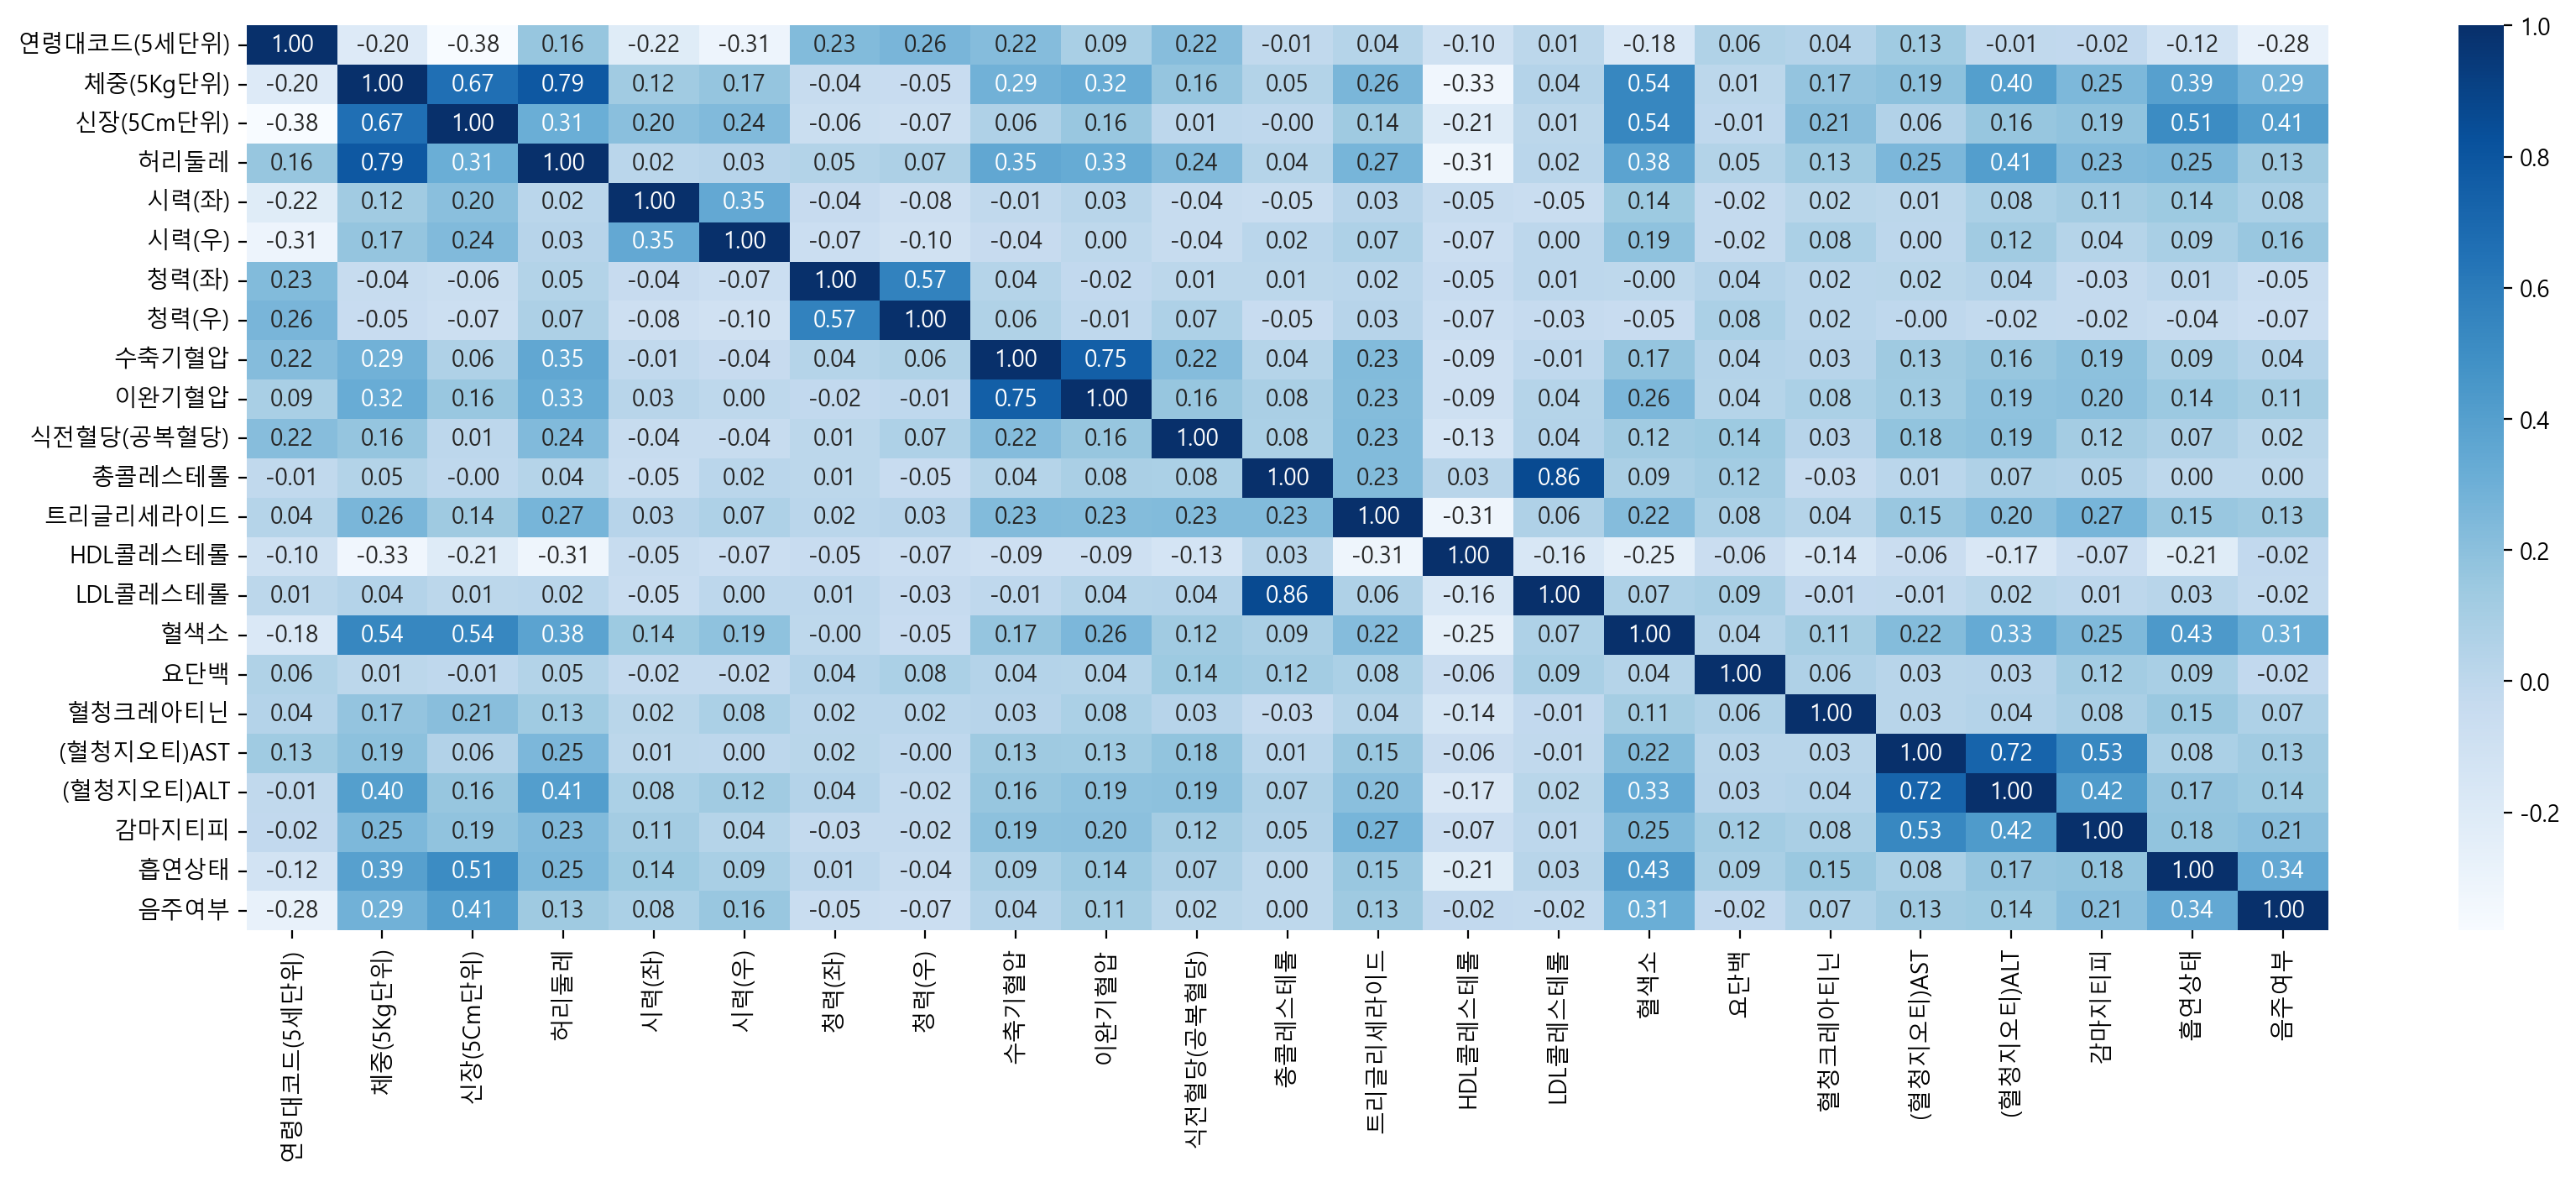

In [190]:
# annot=True : 히트맵 상관관계 숫자 표시
# fmt : 소숫점 설정
# cmap : 히트맵 색상 설정

plt.figure(figsize=(20, 7))
sns.heatmap(df_corr, annot=True, fmt=".2f", cmap="Blues")

<Axes: >

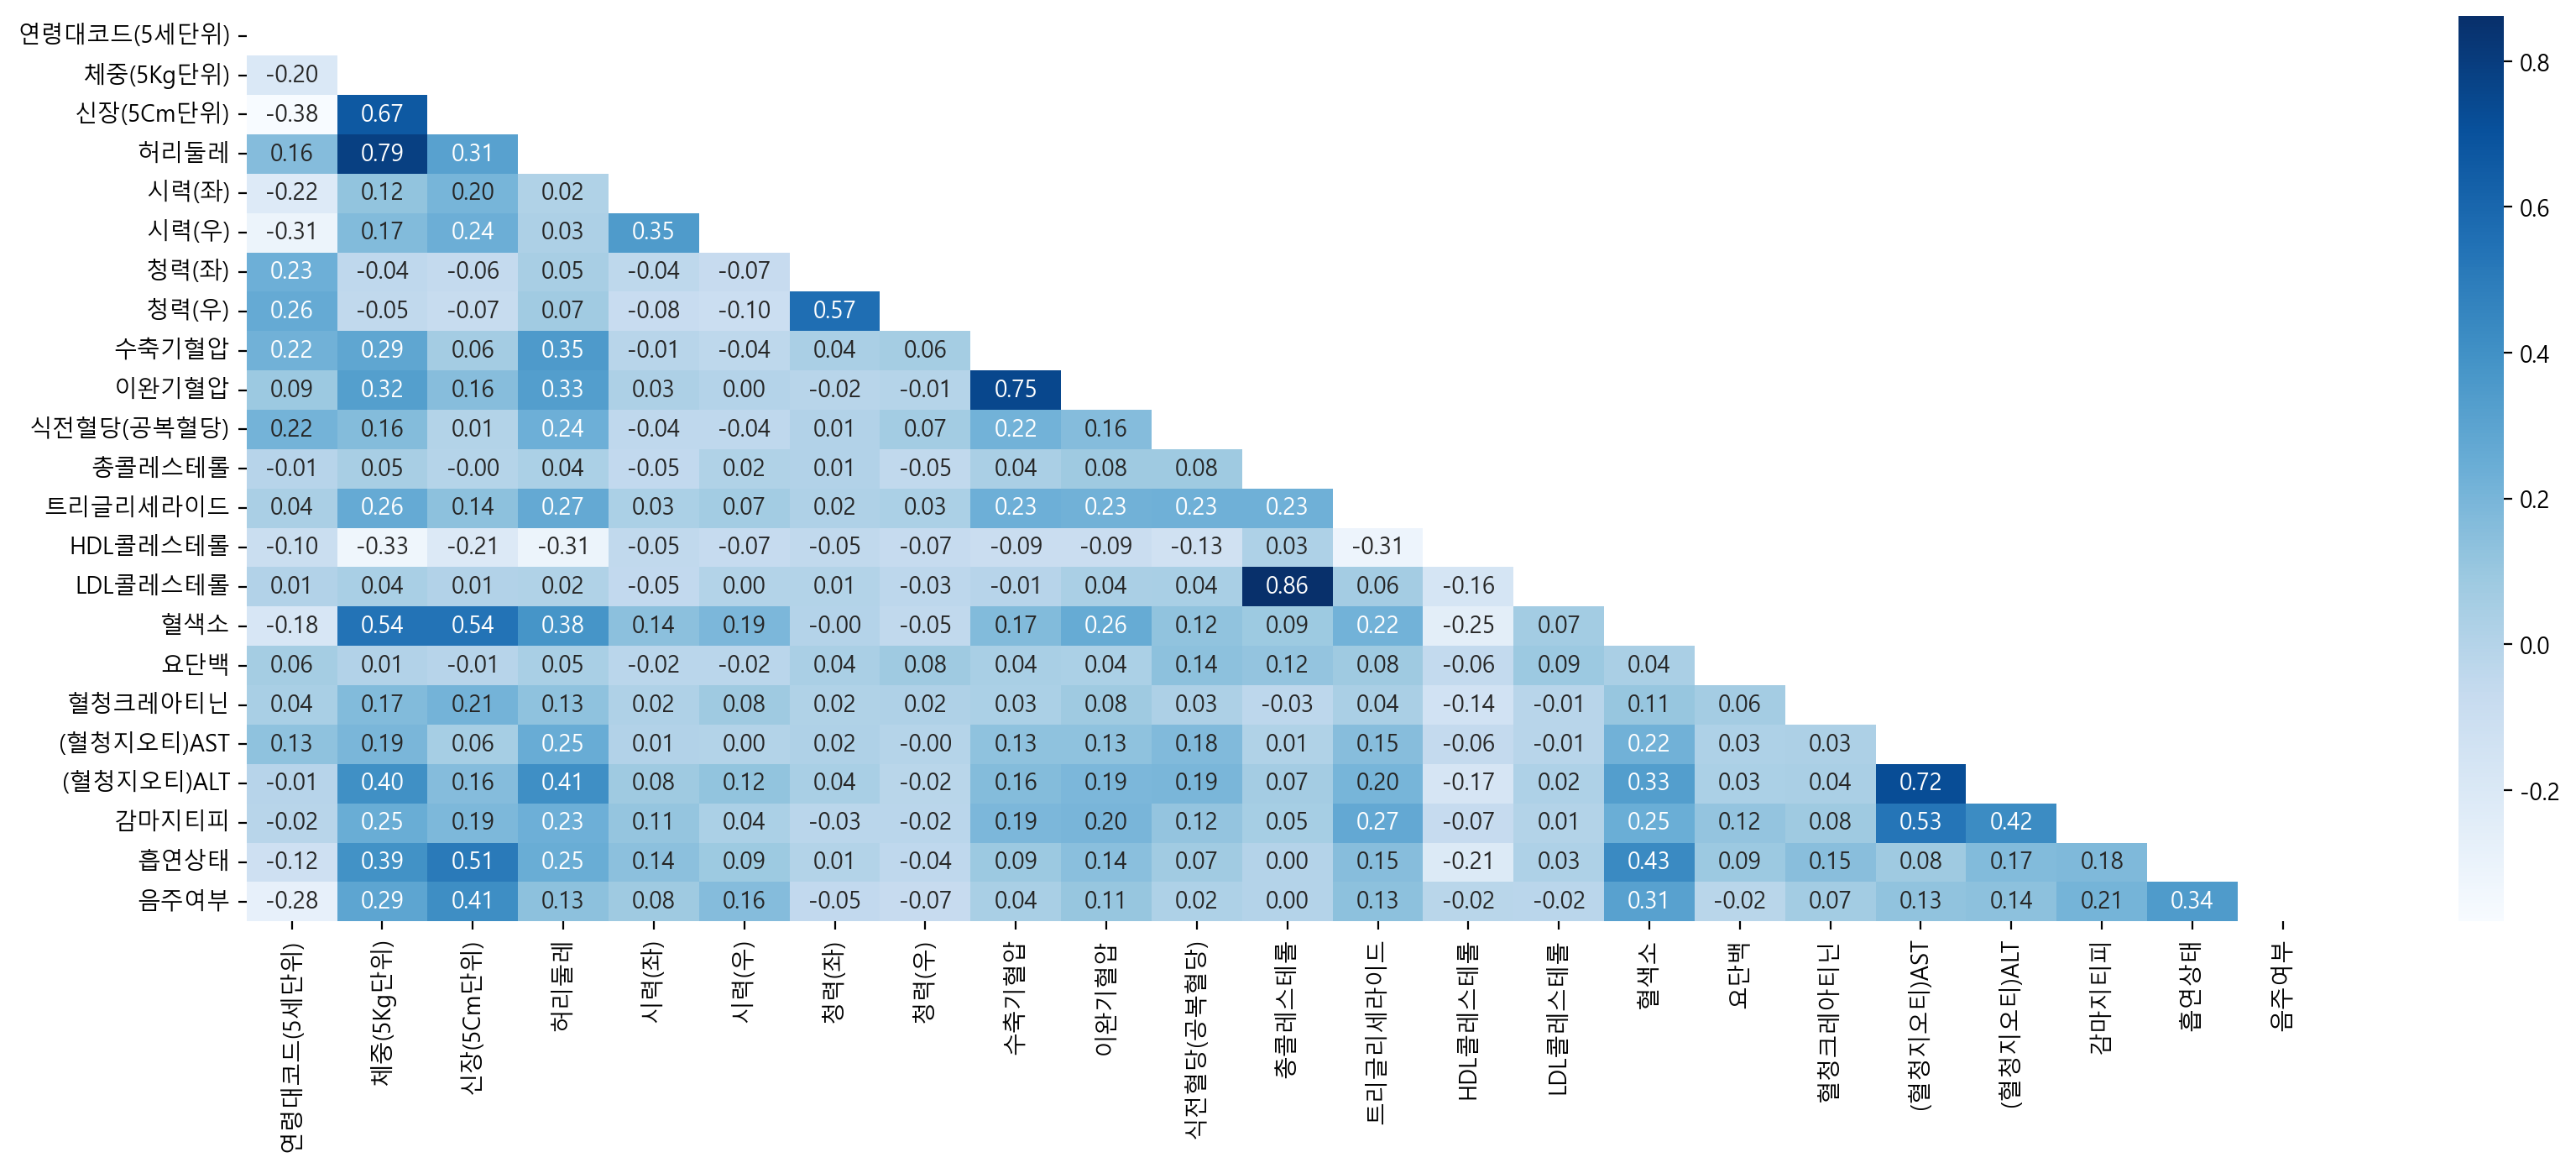

In [205]:
# 히트맵은 1 line 기준 대칭 모양을 띄고있음.
# 대각선 아래쪽만 표현하는 속성 : mask
mask = np.triu(np.ones_like(df_corr, dtype=bool))

plt.figure(figsize=(20, 7))
sns.heatmap(df_corr, annot=True, fmt=".2f", cmap="Blues", mask=mask)